In [108]:
%matplotlib notebook

from IPython.display import display

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read in the data

In [2]:
loan_data_filename = '/Users/ankurmanikandan/Documents/Ankur/Mission Lane/Credit Risk Modelling/Dataset/loan_data_2007_2014.csv'
loan_data = pd.read_csv(loan_data_filename)

/Users/ankurmanikandan/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
pd.options.display.max_columns = None

In [4]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [5]:
loan_data.head()

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade sub_grade  \
0   36 months     10.65       162.87     B        B2   
1   60 months     15.27        59.83     C        C4   
2   36 months     15.96        84.33     C        C5   
3   36 months     13.49       339.31     C        C1   
4   60 months     12.69        67.79     B        B5   

                  emp_title emp_length home_ownership  annual_inc  \
0                       NaN  10+ years           RENT     24000.0   
1                     Ryder   < 1 year           RENT     30000.0   
2                       NaN  10+ years           RENT     12252.0   
3       AIR RESOURCES BOARD  10+ years           RENT     49200.0   
4  University Medical Group     1 year           RENT     80000.0   

  verification_status issue_d  loan_status pymnt_plan  \
0            Verified  Dec-11   Fully Paid          n   
1     Source Verified  Dec-11  Charged Off          n   
2        Not Verified  Dec-11   Fully Paid          n   
3     Source Verified  Dec-11   Fully Paid          n   
4     Source Verified  Dec-11      Current          n   

                                                 url  \
0  https://www.lendingclub.com/browse/loanDetail....   
1  https://www.lendingclub.com/browse/loanDetail....   
2  https://www.lendingclub.com/browse/loanDetail....   
3  https://www.lendingclub.com/browse/loanDetail....   
4  https://www.lendingclub.com/browse/loanDetail....   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   
3              personel    917xx         CA  20.00          0.0   
4              Personal    972xx         OR  17.94          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85             1.0                     NaN   
1           Apr-99             5.0                     NaN   
2           Nov-01             2.0                     NaN   
3           Feb-96             1.0                    35.0   
4           Jan-96             0.0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0      13648        83.7   
1                     NaN       3.0      0.0       1687         9.4   
2                     NaN       2.0      0.0       2956        98.5   
3                     NaN      10.0      0.0       5598        21.0   
4                     NaN      15.0      0.0      27783        53.9   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0        9.0                   f        0.0            0.0   5861.071414   
1        4.0                   f        0.0            0.0   1008.710000   
2       10.0                   f        0.0            0.0   3003.653644   
3       37.0                   f        0.0            0.0  12226.302210   
4       38.0                   f      766.9          766.9   3242.170000   

   total_

In [6]:
# We have a number of columns that have only NaN values. Let us drop those columns
loan_data.dropna(axis=1, how='all', inplace=True)
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 58 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

# Validate the data types of the columns

In [7]:
# Employment length is of type object. Let's investigate.
loan_data.emp_length.value_counts(dropna=False)

10+ years    150049
2 years       41373
3 years       36596
< 1 year      36265
5 years       30774
1 year        29622
4 years       28023
7 years       26180
6 years       26112
8 years       22395
NaN           21008
9 years       17888
Name: emp_length, dtype: int64

In [8]:
# We need to extract the numbers from the strings. Additionally, we need to find a way to deal with the 
# NaN numbers. We can make a safe assumption that the employment length is missing because the 
# applicant has zero years of work experience.
loan_data['emp_length_int'] = loan_data.emp_length.str.extract(r'(\d+)').iloc[:, 0]
loan_data.emp_length_int

0         10
1          1
2         10
3         10
4          1
          ..
466280     4
466281    10
466282     7
466283     3
466284    10
Name: emp_length_int, Length: 466285, dtype: object

In [9]:
loan_data.emp_length_int.fillna(0, inplace=True)
loan_data.emp_length_int = loan_data.emp_length_int.astype(int)
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 59 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [10]:
loan_data.head()

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade sub_grade  \
0   36 months     10.65       162.87     B        B2   
1   60 months     15.27        59.83     C        C4   
2   36 months     15.96        84.33     C        C5   
3   36 months     13.49       339.31     C        C1   
4   60 months     12.69        67.79     B        B5   

                  emp_title emp_length home_ownership  annual_inc  \
0                       NaN  10+ years           RENT     24000.0   
1                     Ryder   < 1 year           RENT     30000.0   
2                       NaN  10+ years           RENT     12252.0   
3       AIR RESOURCES BOARD  10+ years           RENT     49200.0   
4  University Medical Group     1 year           RENT     80000.0   

  verification_status issue_d  loan_status pymnt_plan  \
0            Verified  Dec-11   Fully Paid          n   
1     Source Verified  Dec-11  Charged Off          n   
2        Not Verified  Dec-11   Fully Paid          n   
3     Source Verified  Dec-11   Fully Paid          n   
4     Source Verified  Dec-11      Current          n   

                                                 url  \
0  https://www.lendingclub.com/browse/loanDetail....   
1  https://www.lendingclub.com/browse/loanDetail....   
2  https://www.lendingclub.com/browse/loanDetail....   
3  https://www.lendingclub.com/browse/loanDetail....   
4  https://www.lendingclub.com/browse/loanDetail....   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   
3              personel    917xx         CA  20.00          0.0   
4              Personal    972xx         OR  17.94          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85             1.0                     NaN   
1           Apr-99             5.0                     NaN   
2           Nov-01             2.0                     NaN   
3           Feb-96             1.0                    35.0   
4           Jan-96             0.0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0      13648        83.7   
1                     NaN       3.0      0.0       1687         9.4   
2                     NaN       2.0      0.0       2956        98.5   
3                     NaN      10.0      0.0       5598        21.0   
4                     NaN      15.0      0.0      27783        53.9   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0        9.0                   f        0.0            0.0   5861.071414   
1        4.0                   f        0.0            0.0   1008.710000   
2       10.0                   f        0.0            0.0   3003.653644   
3       37.0                   f        0.0            0.0  12226.302210   
4       38.0                   f      766.9          766.9   3242.170000   

   total_

In [11]:
# Let us now investigate the 'earliest_cr_line' column. This seems to be of type object instead of datetime.
loan_data.earliest_cr_line

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object

In [12]:
loan_data['mnths_since_earliest_cr_line'] = (pd.to_datetime('2017-12-01') 
                                             - pd.to_datetime(
                                                 loan_data.earliest_cr_line, format='%b-%y'))/np.timedelta64(1, 'M')
loan_data.mnths_since_earliest_cr_line.describe()

count    466256.000000
mean        239.495730
std          93.976747
min        -612.020781
25%         183.001704
50%         225.055956
75%         285.048974
max         586.985359
Name: mnths_since_earliest_cr_line, dtype: float64

In [13]:
# We can see above that the month values are negative. But this can't be possible. So we need to see why.
loan_data[['mnths_since_earliest_cr_line', 'earliest_cr_line']][loan_data.mnths_since_earliest_cr_line < 0]

mnths_since_earliest_cr_line earliest_cr_line
1580                     -537.013080           Sep-62
1770                     -609.030986           Sep-68
2799                     -561.030001           Sep-64
3282                     -597.006099           Sep-67
3359                     -566.056798           Feb-65
...                              ...              ...
464003                   -601.014395           Jan-68
464260                   -582.977063           Jul-66
465100                   -597.991745           Oct-67
465500                   -597.006099           Sep-67
465655                   -457.011438           Jan-56

[1169 rows x 2 columns]

In [14]:
# Since the earlies time in pandas is 1970, any year before that is being treated incorrectly.
# So in this case what we can do, is to assign the maximum month value to all the values that are negative.
loan_data.loc[loan_data.mnths_since_earliest_cr_line < 0, 'mnths_since_earliest_cr_line'] = \
    loan_data.mnths_since_earliest_cr_line.max()
loan_data.mnths_since_earliest_cr_line.describe()

count    466256.000000
mean        242.398646
std          86.461715
min          73.003552
25%         184.020206
50%         225.975893
75%         285.048974
max         586.985359
Name: mnths_since_earliest_cr_line, dtype: float64

In [15]:
# Next let us work on 'term'
loan_data.term.value_counts()

 36 months    337953
 60 months    128332
Name: term, dtype: int64

In [16]:
loan_data['term_months'] = loan_data.term.str.extract(r'(\d+)').iloc[:, 0].astype(int)
print(loan_data.term_months)
print(loan_data.term_months.value_counts(dropna=False))

0         36
1         60
2         36
3         36
4         60
          ..
466280    60
466281    60
466282    60
466283    36
466284    36
Name: term_months, Length: 466285, dtype: int64
36    337953
60    128332
Name: term_months, dtype: int64


In [17]:
# Let us see if there are any other columns that requires investigating
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 61 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    466285 non-null  int64  
 1   id                            466285 non-null  int64  
 2   member_id                     466285 non-null  int64  
 3   loan_amnt                     466285 non-null  int64  
 4   funded_amnt                   466285 non-null  int64  
 5   funded_amnt_inv               466285 non-null  float64
 6   term                          466285 non-null  object 
 7   int_rate                      466285 non-null  float64
 8   installment                   466285 non-null  float64
 9   grade                         466285 non-null  object 
 10  sub_grade                     466285 non-null  object 
 11  emp_title                     438697 non-null  object 
 12  emp_length                    445277 non-nul

In [18]:
# 'issue_d' is a date column, but the column type is 'object'
loan_data.issue_d

0         Dec-11
1         Dec-11
2         Dec-11
3         Dec-11
4         Dec-11
           ...  
466280    Jan-14
466281    Jan-14
466282    Jan-14
466283    Jan-14
466284    Jan-14
Name: issue_d, Length: 466285, dtype: object

In [19]:
loan_data['mths_since_issue_d'] = (pd.to_datetime('2017-12-01') \
                                   - pd.to_datetime(loan_data.issue_d, format='%b-%y'))/np.timedelta64(1, 'M')
loan_data['mths_since_issue_d']

0         72.017906
1         72.017906
2         72.017906
3         72.017906
4         72.017906
            ...    
466280    46.982484
466281    46.982484
466282    46.982484
466283    46.982484
466284    46.982484
Name: mths_since_issue_d, Length: 466285, dtype: float64

In [20]:
loan_data.mths_since_issue_d.describe()

count    466285.000000
mean         51.265176
std          14.338664
min          36.008953
25%          41.035750
50%          46.982484
75%          57.036079
max         126.031335
Name: mths_since_issue_d, dtype: float64

In [21]:
# Let's take a final pass through the data
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 62 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    466285 non-null  int64  
 1   id                            466285 non-null  int64  
 2   member_id                     466285 non-null  int64  
 3   loan_amnt                     466285 non-null  int64  
 4   funded_amnt                   466285 non-null  int64  
 5   funded_amnt_inv               466285 non-null  float64
 6   term                          466285 non-null  object 
 7   int_rate                      466285 non-null  float64
 8   installment                   466285 non-null  float64
 9   grade                         466285 non-null  object 
 10  sub_grade                     466285 non-null  object 
 11  emp_title                     438697 non-null  object 
 12  emp_length                    445277 non-nul

In [22]:
loan_data.acc_now_delinq.describe()

count    466256.000000
mean          0.004002
std           0.068637
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           5.000000
Name: acc_now_delinq, dtype: float64

In [23]:
loan_data.acc_now_delinq.value_counts(dropna=False)

0.0    464524
1.0      1623
2.0        92
NaN        29
3.0        11
4.0         4
5.0         2
Name: acc_now_delinq, dtype: int64

In [24]:
loan_data.head(20)

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0            0  1077501    1296599       5000         5000           4975.0   
1            1  1077430    1314167       2500         2500           2500.0   
2            2  1077175    1313524       2400         2400           2400.0   
3            3  1076863    1277178      10000        10000          10000.0   
4            4  1075358    1311748       3000         3000           3000.0   
5            5  1075269    1311441       5000         5000           5000.0   
6            6  1069639    1304742       7000         7000           7000.0   
7            7  1072053    1288686       3000         3000           3000.0   
8            8  1071795    1306957       5600         5600           5600.0   
9            9  1071570    1306721       5375         5375           5350.0   
10          10  1070078    1305201       6500         6500           6500.0   
11          11  1069908    1305008      12000        12000          12000.0   
12          12  1064687    1298717       9000         9000           9000.0   
13          13  1069866    1304956       3000         3000           3000.0   
14          14  1069057    1303503      10000        10000          10000.0   
15          15  1069759    1304871       1000         1000           1000.0   
16          16  1065775    1299699      10000        10000          10000.0   
17          17  1069971    1304884       3600         3600           3600.0   
18          18  1062474    1294539       6000         6000           6000.0   
19          19  1069742    1304855       9200         9200           9200.0   

          term  int_rate  installment grade sub_grade  \
0    36 months     10.65       162.87     B        B2   
1    60 months     15.27        59.83     C        C4   
2    36 months     15.96        84.33     C        C5   
3    36 months     13.49       339.31     C        C1   
4    60 months     12.69        67.79     B        B5   
5    36 months      7.90       156.46     A        A4   
6    60 months     15.96       170.08     C        C5   
7    36 months     18.64       109.43     E        E1   
8    60 months     21.28       152.39     F        F2   
9    60 months     12.69       121.45     B        B5   
10   60 months     14.65       153.45     C        C3   
11   36 months     12.69       402.54     B        B5   
12   36 months     13.49       305.38     C        C1   
13   36 months      9.91        96.68     B        B1   
14   36 months     10.65       325.74     B        B2   
15   36 months     16.29        35.31     D        D1   
16   36 months     15.27       347.98     C        C4   
17   36 months      6.03       109.57     A        A1   
18   36 months     11.71       198.46     B        B3   
19   36 months      6.03       280.01     A        A1   

                              emp_title emp_length home_ownership  annual_inc  \
0                                   NaN  10+ years           RENT    24000.00   
1                                 Ryder   < 1 year           RENT    30000.00   
2                                   NaN  10+ years           RENT    12252.00   
3                   AIR RESOURCES BOARD  10+ years           RENT    49200.00   
4              University Medical Group     1 year           RENT    80000.00   
5                  Veolia Transportaton    3 years           RENT    36000.00   
6             Southern Star Photography    8 years           RENT    47004.00   
7                       MKC Accounting     9 years           RENT    48000.00   
8                                   NaN    4 years            OWN    40000.00   
9                             Starbucks   < 1 year           RENT    15000.00   
10                Southwest Rural metro    5 years            OWN    72000.00   
11                                 UCLA  10+ years            OWN    75000.00   
12  Va. Dept of Conservation/Recreation   < 1 year           RENT    30000.00   
13          

In [25]:
loan_data.groupby('grade').apply(lambda x: x.count())

Unnamed: 0      id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
grade                                                                           
A           74867   74867      74867      74867        74867            74867   
B          136929  136929     136929     136929       136929           136929   
C          125293  125293     125293     125293       125293           125293   
D           76888   76888      76888      76888        76888            76888   
E           35757   35757      35757      35757        35757            35757   
F           13229   13229      13229      13229        13229            13229   
G            3322    3322       3322       3322         3322             3322   

         term  int_rate  installment   grade  sub_grade  emp_title  \
grade                                                                
A       74867     74867        74867   74867      74867      70465   
B      136929    136929       136929  136929     136929     128785   
C      125293    125293       125293  125293     125293     117922   
D       76888     76888        76888   76888      76888      72211   
E       35757     35757        35757   35757      35757      33690   
F       13229     13229        13229   13229      13229      12483   
G        3322      3322         3322    3322       3322       3141   

       emp_length  home_ownership  annual_inc  verification_status  issue_d  \
grade                                                                         
A           71784           74867       74863                74867    74867   
B          130800          136929      136929               136929   136929   
C          119469          125293      125293               125293   125293   
D           73199           76888       76888                76888    76888   
E           34138           35757       35757                35757    35757   
F           12678           13229       13229                13229    13229   
G            3209            3322        3322                 3322     3322   

       loan_status  pymnt_plan     url   desc  purpose   title  zip_code  \
grade                                                                      
A            74867       74867   74867  24383    74867   74866     74867   
B           136929      136929  136929  42094   136929  136922    136929   
C           125293      125293  125293  30152   125293  125288    125293   
D            76888       76888   76888  17022    76888   76884     76888   
E            35757       35757   35757   7858    35757   35755     35757   
F            13229       13229   13229   3479    13229   13228     13229   
G             3322        3322    3322    995     3322    3322      3322   

       addr_state     dti  delinq_2yrs  earliest_cr_line  inq_last_6mths  \
grade                                                                      
A           74867   74867        74856             74856           74856   
B          136929  136929       136919            136919          136919   
C          125293  125293       125287            125287          125287   
D           76888   76888        76887             76887           76887   
E           35757   35757        35756             35756           35756   
F           13229   13229        13229             13229           13229   
G            3322    3322         3322              3322            3322   

       mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
grade                                                                      
A                       23741                    4256     74856    74856   
B                       62412                   18164    136919   136919   
C                       62089                   20045    125287   125287   
D                       39828                   12164     76887    76887   
E                       18923                    5591     35756    35756   
F                        7078   

In [26]:
loan_data.member_id.value_counts()

26216447    1
38760771    1
16582924    1
19726605    1
14288263    1
           ..
28270268    1
9389759     1
833217      1
39232691    1
10341534    1
Name: member_id, Length: 466285, dtype: int64

In [27]:
loan_data.emp_title.value_counts(dropna=False)

NaN                              27588
Teacher                           5399
Manager                           4438
Registered Nurse                  2316
RN                                2204
                                 ...  
Assistant State Auditor              1
NCI Information Systems Inc.         1
ERIE COUNTY HEALTH DEPT              1
Business Solutions Specialist        1
Hospital Account Manager             1
Name: emp_title, Length: 205476, dtype: int64

In [28]:
loan_data.pymnt_plan.value_counts(dropna=False)

n    466276
y         9
Name: pymnt_plan, dtype: int64

In [29]:
loan_data[['pymnt_plan', 'loan_status']].groupby(['pymnt_plan', 'loan_status']).count()

Empty DataFrame
Columns: []
Index: [(n, Charged Off), (n, Current), (n, Default), (n, Does not meet the credit policy. Status:Charged Off), (n, Does not meet the credit policy. Status:Fully Paid), (n, Fully Paid), (n, In Grace Period), (n, Late (16-30 days)), (n, Late (31-120 days)), (y, Current), (y, Fully Paid), (y, Late (16-30 days)), (y, Late (31-120 days))]

# Let's define the output variable - Loan Status

In [30]:
loan_data.loan_status.value_counts(dropna=False)

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [31]:
loan_status_default_list = ['Charged Off', 'Late (31-120 days)', 
                            'Default', 
                            'Does not meet the credit policy. Status:Charged Off']
loan_data['loan_status_int'] = np.where(loan_data.loan_status.isin(loan_status_default_list), 1, 0)
loan_data.loan_status_int.value_counts(dropna=False)

0    415317
1     50968
Name: loan_status_int, dtype: int64

In [32]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 63 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    466285 non-null  int64  
 1   id                            466285 non-null  int64  
 2   member_id                     466285 non-null  int64  
 3   loan_amnt                     466285 non-null  int64  
 4   funded_amnt                   466285 non-null  int64  
 5   funded_amnt_inv               466285 non-null  float64
 6   term                          466285 non-null  object 
 7   int_rate                      466285 non-null  float64
 8   installment                   466285 non-null  float64
 9   grade                         466285 non-null  object 
 10  sub_grade                     466285 non-null  object 
 11  emp_title                     438697 non-null  object 
 12  emp_length                    445277 non-nul

In [33]:
loan_data.home_ownership.value_counts(dropna=False)

MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          182
NONE            50
ANY              1
Name: home_ownership, dtype: int64

In [34]:
# annual income
loan_data[loan_data.annual_inc.isna()]

Unnamed: 0     id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
42449       42449  79967      79912       5000         5000           3025.0   
42450       42450  79924      79906       7000         7000           3450.0   
42480       42480  79893      79878       6700         6700           6700.0   
42533       42533  71623      70735       6500         6500              0.0   

             term  int_rate  installment grade sub_grade emp_title emp_length  \
42449   36 months      7.43       155.38     A        A2       NaN   < 1 year   
42450   36 months      7.75       218.55     A        A3       NaN   < 1 year   
42480   36 months      7.75       209.18     A        A3       NaN   < 1 year   
42533   36 months      8.38       204.84     A        A5       NaN   < 1 year   

      home_ownership  annual_inc verification_status issue_d  \
42449           NONE         NaN        Not Verified  Aug-07   
42450           NONE         NaN        Not Verified  Aug-07   
42480           NONE         NaN        Not Verified  Jul-07   
42533           NONE         NaN        Not Verified  Jun-07   

                                             loan_status pymnt_plan  \
42449  Does not meet the credit policy. Status:Fully ...          n   
42450  Does not meet the credit policy. Status:Fully ...          n   
42480  Does not meet the credit policy. Status:Fully ...          n   
42533  Does not meet the credit policy. Status:Fully ...          n   

                                                     url  \
42449  https://www.lendingclub.com/browse/loanDetail....   
42450  https://www.lendingclub.com/browse/loanDetail....   
42480  https://www.lendingclub.com/browse/loanDetail....   
42533  https://www.lendingclub.com/browse/loanDetail....   

                                                    desc purpose  \
42449  I will be relocating to Boston next month and ...   other   
42450  I am borrowing $7,000 for tuition and other ex...   other   
42480  I am moving to Florida and would like to borro...   other   
42533  Hi,   I'm buying  a used car. Anybody on faceb...   other   

                                      title zip_code addr_state  dti  \
42449                       Moving expenses    100xx         NY  1.0   
42450                             Education    100xx         NY  1.0   
42480  Moving expenses and security deposit    100xx         NY  1.0   
42533                          Buying a car    100xx         NY  4.0   

       delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
42449          NaN              NaN             NaN                     NaN   
42450          NaN              NaN             NaN                     NaN   
42480          NaN              NaN             NaN                     NaN   
42533          NaN              NaN             NaN                     NaN   

       mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
42449                     NaN       NaN      NaN          0         NaN   
42450                     NaN       NaN      NaN          0         NaN   
42480                     NaN       NaN      NaN          0         NaN   
42533                     NaN       NaN      NaN          0         NaN   

       total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
42449        NaN                   f        0.0            0.0      5593.46   
42450        NaN                   f        0.0            0.0      7867.53   
42480        NaN                   f        0.0            0.0      7530.42   
42533        NaN                   f        0.0            0.0      7373.83   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
42449          3384.01           5000.0         593.46                 0.0   
42450          3877.59           7000.0         867.53                 0.0   
42480          7530.42           6700.0         830.42                 0.0   
42533             0.00           6500.0 

In [35]:
loan_data.loc[loan_data.emp_length_int == 0, 'annual_inc'].describe()

count     21008.000000
mean      49428.978403
std       30929.049883
min        3000.000000
25%       30000.000000
50%       44500.000000
75%       61503.250000
max      900000.000000
Name: annual_inc, dtype: float64

In [36]:
loan_data.annual_inc.fillna(loan_data.loc[loan_data.emp_length_int == 0, 'annual_inc'].median(), inplace=True)
print(loan_data.annual_inc.describe())
print(loan_data[loan_data.annual_inc.isna()])

count    4.662850e+05
mean     7.327713e+04
std      5.496340e+04
min      1.896000e+03
25%      4.500000e+04
50%      6.300000e+04
75%      8.895300e+04
max      7.500000e+06
Name: annual_inc, dtype: float64
Empty DataFrame
Columns: [Unnamed: 0, id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, collections_12_mths_ex_med, mths_since_last_major_derog, policy_code, application_type, acc_now_delinq, tot_col

In [37]:
# verification status
loan_data.verification_status.value_counts(dropna=False)

Verified           168055
Source Verified    149993
Not Verified       148237
Name: verification_status, dtype: int64

In [38]:
loan_data.groupby(['loan_status_int', 'verification_status']).verification_status.count()

loan_status_int  verification_status
0                Not Verified           134291
                 Source Verified        134376
                 Verified               146650
1                Not Verified            13946
                 Source Verified         15617
                 Verified                21405
Name: verification_status, dtype: int64

In [39]:
pd.crosstab(loan_data.verification_status, loan_data.loan_status_int)

loan_status_int           0      1
verification_status               
Not Verified         134291  13946
Source Verified      134376  15617
Verified             146650  21405

<IPython.core.display.Javascript object>


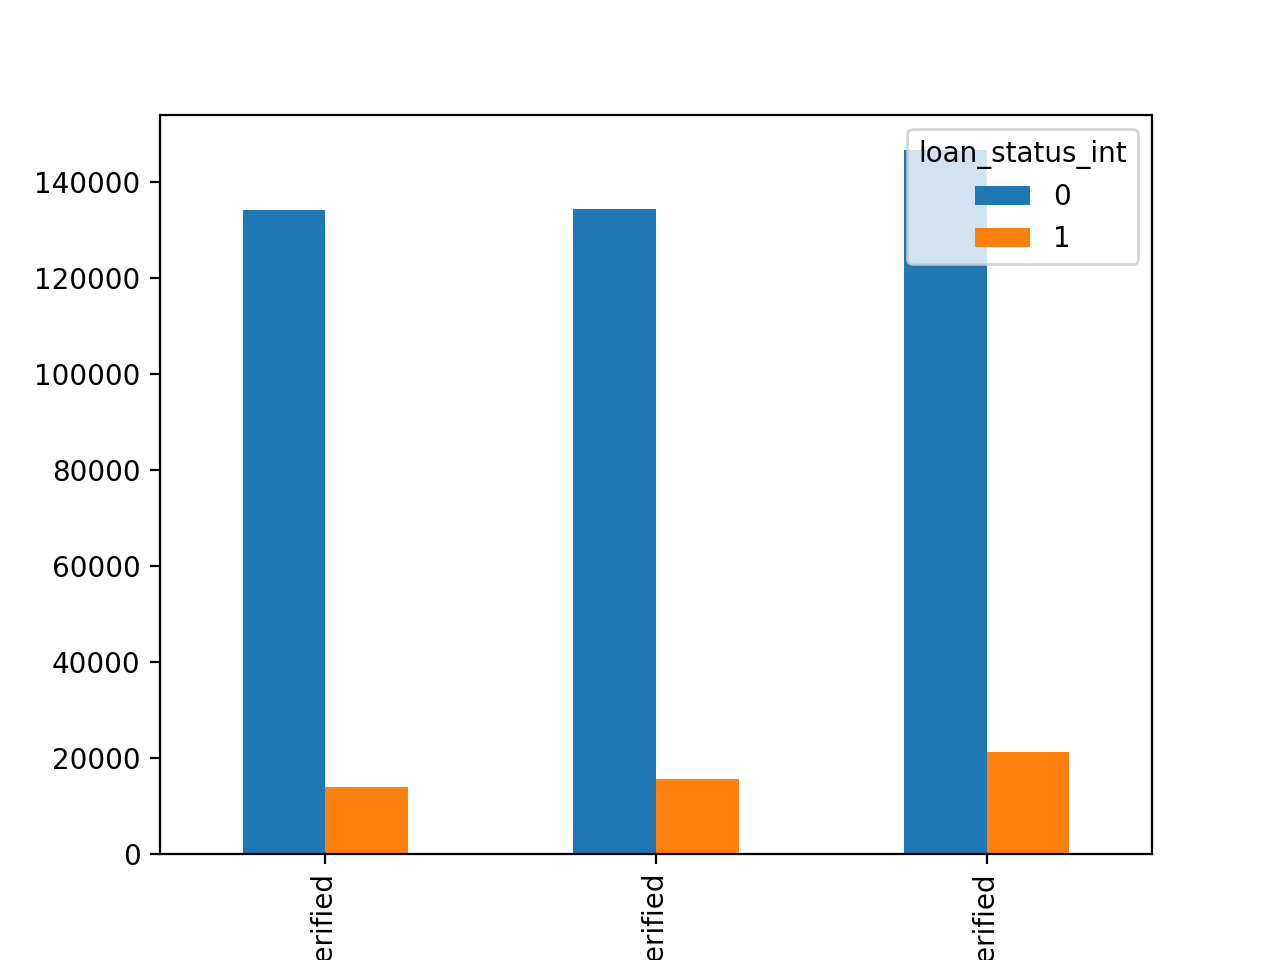

In [40]:
# plot the verification status based on loan status
fig, ax = plt.subplots()
# loan_data.groupby(['loan_status_int', 'verification_status']).verification_status.count().plot.bar(ax=ax)
pd.crosstab(loan_data.verification_status, loan_data.loan_status_int).plot.bar(ax=ax)
plt.show()

In [41]:
# Create a function to plot the categorical variables against the loan status
def plot_cat_loan_status(df, col1):
    
    fig, ax = plt.subplots()
    pd.crosstab(df[col1], df['loan_status_int']).plot.bar(ax=ax)
    plt.show()

<IPython.core.display.Javascript object>


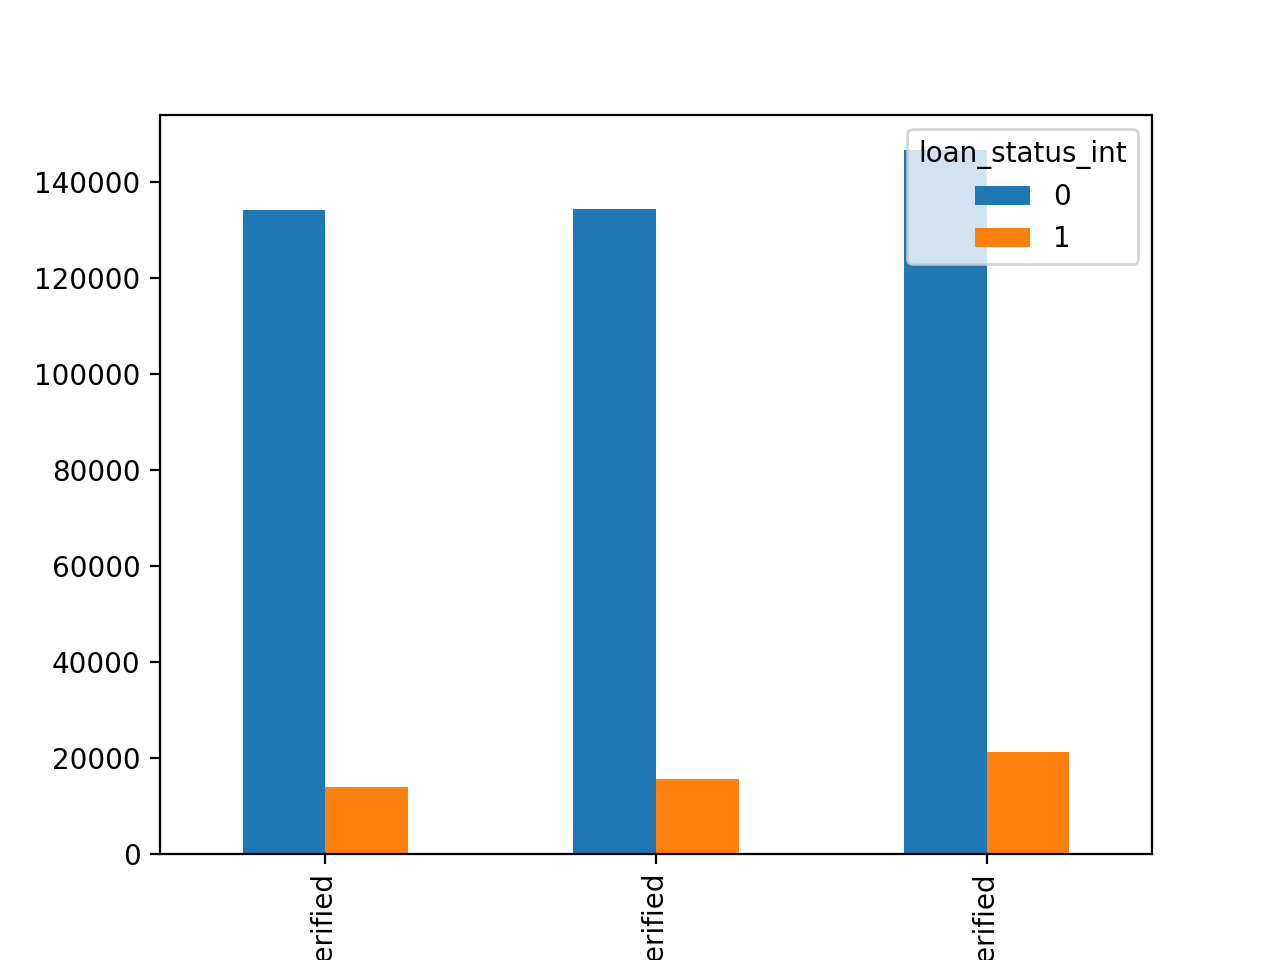

In [42]:
plot_cat_loan_status(loan_data, 'verification_status')

In [43]:
loan_data.pymnt_plan.value_counts(dropna=False)

n    466276
y         9
Name: pymnt_plan, dtype: int64

In [44]:
# Purpose of loan
loan_data.purpose.value_counts(dropna=False)

debt_consolidation    274195
credit_card           104157
home_improvement       26537
other                  23690
major_purchase          9828
small_business          7013
car                     5397
medical                 4602
moving                  2994
vacation                2487
wedding                 2343
house                   2269
educational              422
renewable_energy         351
Name: purpose, dtype: int64

<IPython.core.display.Javascript object>


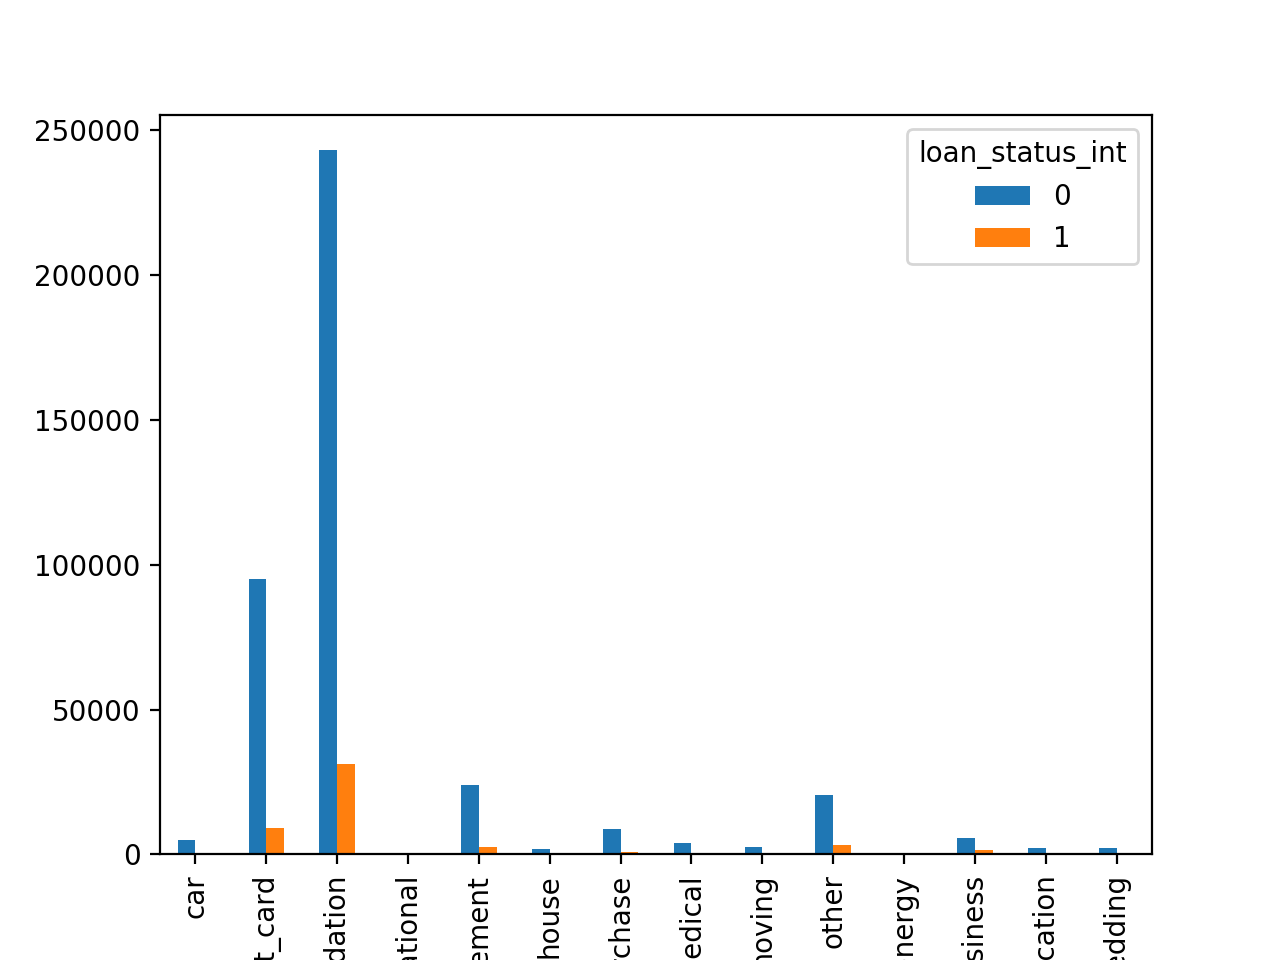

In [45]:
plot_cat_loan_status(loan_data, 'purpose')

In [46]:
# Title
loan_data.title.value_counts(dropna=False)

Debt consolidation         164075
Credit card refinancing     62275
Debt Consolidation          15760
Home improvement            14849
Other                       12713
                            ...  
Payoff my Credit Cards          1
Clean up my bills               1
Defeat that debt                1
Holly Loan                      1
Bills / Vacation                1
Name: title, Length: 63100, dtype: int64

In [47]:
# Earliest credit line
loan_data.earliest_cr_line.value_counts(dropna=False)

Oct-00    3674
Aug-00    3597
Aug-01    3455
Oct-99    3406
Oct-01    3329
          ... 
Feb-60       1
Jan-54       1
Jan-46       1
Jul-61       1
May-62       1
Name: earliest_cr_line, Length: 665, dtype: int64

In [48]:
# Initial list status
loan_data.initial_list_status.value_counts()

f    303005
w    163280
Name: initial_list_status, dtype: int64

<IPython.core.display.Javascript object>


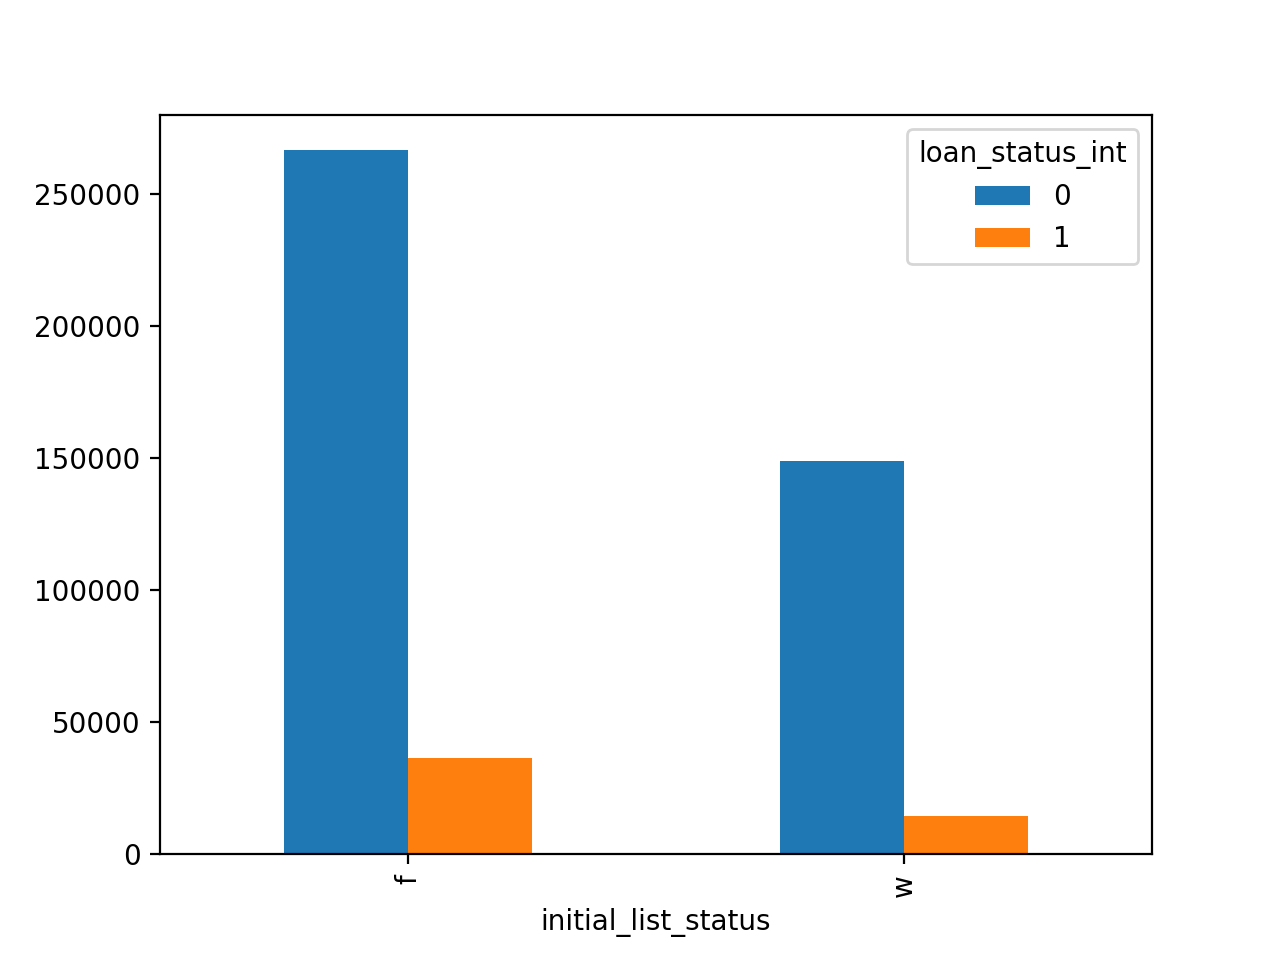

In [49]:
plot_cat_loan_status(loan_data, 'initial_list_status')

In [50]:
# Last payment date
loan_data.last_pymnt_d.value_counts(dropna=False)

Jan-16    179620
Dec-15     62000
Jul-15     11703
Oct-15     11248
Sep-15     10204
           ...  
Jun-08        20
Mar-08        18
Jan-08        11
Feb-08         8
Dec-07         2
Name: last_pymnt_d, Length: 99, dtype: int64

In [51]:
# Let us determine the months since the last payment
loan_data['mnths_since_last_pymnt'] = (pd.to_datetime('2017-12-01') \
                                       - pd.to_datetime(loan_data.last_pymnt_d, format='%b-%y')) \
                                      / np.timedelta64(1, 'M')
loan_data.mnths_since_last_pymnt

0         34.990452
1         56.017577
2         42.021397
3         34.990452
4         22.998419
            ...    
466280    22.998419
466281    36.008953
466282    22.998419
466283    36.008953
466284    22.998419
Name: mnths_since_last_pymnt, Length: 466285, dtype: float64

In [52]:
loan_data[loan_data.mnths_since_last_pymnt.isna()]

Unnamed: 0        id  member_id  loan_amnt  funded_amnt  \
26              26   1069800    1304679      15000        15000   
2731          2731   1032519    1262161       8000         8000   
3625          3625   1016039    1243723       6400         6400   
3998          3998   1009833    1236591      18000        18000   
4220          4220   1006579    1232989       1800         1800   
...            ...       ...        ...        ...          ...   
455499      455499  10628675   12500606       6625         6625   
458391      458391  10606796   12478821       8000         8000   
459366      459366  10575559   12457646       8250         8250   
464853      464853  10180003   12031528      14000        14000   
465510      465510  10079433   11931059      30000        30000   

        funded_amnt_inv        term  int_rate  installment grade sub_grade  \
26               8725.0   36 months     14.27       514.64     C        C2   
2731             3975.0   36 months     14.65       275.96     C        C3   
3625             6400.0   60 months     18.25       163.39     D        D5   
3998            18000.0   60 months     19.03       467.23     E        E2   
4220             1800.0   36 months      8.90        57.16     A        A5   
...                 ...         ...       ...          ...   ...       ...   
455499           6625.0   36 months     24.08       260.20     F        F2   
458391           8000.0   36 months     19.97       297.19     D        D5   
459366           8250.0   36 months     17.57       296.49     D        D2   
464853          14000.0   36 months     18.25       507.90     D        D3   
465510          30000.0   60 months     19.22       781.86     D        D4   

                        emp_title emp_length home_ownership  annual_inc  \
26                    nyc transit    9 years           RENT     60000.0   
2731                Southern Felt  10+ years           RENT     72000.0   
3625    akrons children hospitial    5 years           RENT     33000.0   
3998                    ZIMFA INC    4 years           RENT     36000.0   
4220            Hospira worldwide    9 years           RENT     50400.0   
...                           ...        ...            ...         ...   
455499           Sales consultant  10+ years       MORTGAGE     36012.0   
458391               Receptionist    6 years       MORTGAGE     26250.0   
459366      conductor / engineer     2 years           RENT     50000.0   
464853   Heavy Equipment Operator    2 years           RENT     42000.0   
465510   Heavy Equipment Operator    7 years       MORTGAGE    120000.0   

       verification_status issue_d  loan_status pymnt_plan  \
26            Not Verified  Dec-11  Charged Off          n   
2731       Source Verified  Nov-11  Charged Off          n   
3625       Source Verified  Nov-11  Charged Off          n   
3998              Verified  Nov-11  Charged Off          n   
4220          Not Verified  Nov-11  Charged Off          n   
...                    ...     ...          ...        ...   
455499     Source Verified  Jan-14  Charged Off          n   
458391            Verified  Jan-14  Charged Off          n   
459366        Not Verified  Jan-14  Charged Off          n   
464853        Not Verified  Jan-14  Charged Off          n   
465510     Source Verified  Jan-14  Charged Off          n   

                                                      url  \
26      https://www.lendingclub.com/browse/loanDetail....   
2731    https://www.lendingclub.com/browse/loanDetail....   
3625    https://www.lendingclub.com/browse/loanDetail....   
3998    https://www.lendingclub.com/browse/loanDetail....   
4220    https://www.lendingclub.com/browse/loanDetail....   
...                                                   ...   
455499  https://www.lendingclub.com/browse/loanDetail....   
458391  https://www.lendingclub.com/browse/loanDetail....   
459366  https://www.lendingclub.com/browse/loanDetail....   
464853  ht

In [53]:
loan_data.mnths_since_last_pymnt.describe()

count    465909.000000
mean         31.303727
std          12.811820
min          22.998419
25%          22.998419
50%          24.016920
75%          34.990452
max         120.018892
Name: mnths_since_last_pymnt, dtype: float64

In [54]:
loan_data.loc[loan_data.mnths_since_last_pymnt.isna(), 'loan_status_int'].value_counts()

1    376
Name: loan_status_int, dtype: int64

In [55]:
loan_data.loc[loan_data.loan_status_int == 1, 'last_pymnt_d'].describe()

count      50592
unique        98
top       Jul-15
freq        2426
Name: last_pymnt_d, dtype: object

In [56]:
# So we have determined that if there are missing values then that is a good indicator that the loan has been
# defaulted.
loan_data.mnths_since_last_pymnt.fillna(0, inplace=True)
loan_data.mnths_since_last_pymnt.describe()

count    466285.000000
mean         31.278485
std          12.837442
min           0.000000
25%          22.998419
50%          24.016920
75%          34.990452
max         120.018892
Name: mnths_since_last_pymnt, dtype: float64

In [57]:
# Next payment date
loan_data.next_pymnt_d.value_counts(dropna=False)

NaN       227214
Feb-16    208393
Jan-16     27922
Mar-11       107
Apr-11       101
           ...  
Feb-08         2
Dec-15         2
Mar-15         1
Dec-07         1
May-08         1
Name: next_pymnt_d, Length: 101, dtype: int64

In [58]:
loan_data.loc[loan_data.next_pymnt_d.isna(), 'loan_status_int'].value_counts()

0    184739
1     42475
Name: loan_status_int, dtype: int64

In [59]:
loan_data.loc[loan_data.next_pymnt_d.isna()]

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  \
0                0  1077501    1296599       5000         5000   
1                1  1077430    1314167       2500         2500   
2                2  1077175    1313524       2400         2400   
3                3  1076863    1277178      10000        10000   
5                5  1075269    1311441       5000         5000   
...            ...      ...        ...        ...          ...   
466276      466276  9695736   11547808       8525         8525   
466277      466277  9007579   10799568      18000        18000   
466278      466278  9745590   11597671      10000        10000   
466281      466281  9684700   11536848      22000        22000   
466283      466283  9604874   11457002       2000         2000   

        funded_amnt_inv        term  int_rate  installment grade sub_grade  \
0                4975.0   36 months     10.65       162.87     B        B2   
1                2500.0   60 months     15.27        59.83     C        C4   
2                2400.0   36 months     15.96        84.33     C        C5   
3               10000.0   36 months     13.49       339.31     C        C1   
5                5000.0   36 months      7.90       156.46     A        A4   
...                 ...         ...       ...          ...   ...       ...   
466276           8525.0   60 months     18.25       217.65     D        D3   
466277          17975.0   36 months      7.90       563.23     A        A4   
466278          10000.0   36 months     18.25       362.78     D        D3   
466281          22000.0   60 months     19.97       582.50     D        D5   
466283           2000.0   36 months      7.90        62.59     A        A4   

                                    emp_title emp_length home_ownership  \
0                                         NaN  10+ years           RENT   
1                                       Ryder   < 1 year           RENT   
2                                         NaN  10+ years           RENT   
3                         AIR RESOURCES BOARD  10+ years           RENT   
5                        Veolia Transportaton    3 years           RENT   
...                                       ...        ...            ...   
466276                                MANAGER    5 years       MORTGAGE   
466277                              sales rep    3 years           RENT   
466278                              MecÃ¡nica  10+ years           RENT   
466281  Chief of Interpretation (Park Ranger)  10+ years       MORTGAGE   
466283                   Server Engineer Lead    3 years            OWN   

        annual_inc verification_status issue_d  loan_status pymnt_plan  \
0          24000.0            Verified  Dec-11   Fully Paid          n   
1          30000.0     Source Verified  Dec-11  Charged Off          n   
2          12252.0        Not Verified  Dec-11   Fully Paid          n   
3          49200.0     Source Verified  Dec-11   Fully Paid          n   
5          36000.0     Source Verified  Dec-11   Fully Paid          n   
...            ...                 ...     ...          ...        ...   
466276     37536.0            Verified  Jan-14  Charged Off          n   
466277     90000.0            Verified  Jan-14  Charged Off          n   
466278     42000.0     Source Verified  Jan-14   Fully Paid          n   
466281     78000.0            Verified  Jan-14  Charged Off          n   
466283     83000.0            Verified  Jan-14   Fully Paid          n   

                                                      url  \
0       https://www.lendingclub.com/browse/loanDetail....   
1       https://www.lendingclub.com/browse/loanDetail....   
2       https://www.lendingclub.com/browse/loanDetail....   
3       https://www.lendingclub.com/browse/loanDetail....   
5       https://www.lendingclub.com/browse/loanDetail....   
...                                                   ...   
466276  https://www.lendingclub.com/browse/loanDetail....   


In [60]:
# Credit pull
loan_data.last_credit_pull_d.value_counts(dropna=False)

Jan-16    327699
Dec-15     13992
Nov-15      8384
Sep-15      8051
Oct-15      7957
           ...  
Nov-07         3
Jun-08         1
Jul-07         1
Jul-08         1
May-08         1
Name: last_credit_pull_d, Length: 104, dtype: int64

In [61]:
# Convert the date to the nnumber of months
loan_data['mnths_since_last_credit_pull'] = round((pd.to_datetime('2017-12-01') \
                                                   - pd.to_datetime(loan_data.last_credit_pull_d, format='%b-%y'))\
                                                 / np.timedelta64(1, 'M'))
loan_data.mnths_since_last_credit_pull.describe()

count    466243.000000
mean         27.045588
std           9.636423
min          23.000000
25%          23.000000
50%          23.000000
75%          25.000000
max         127.000000
Name: mnths_since_last_credit_pull, dtype: float64

In [62]:
loan_data[loan_data.mnths_since_last_credit_pull.isna()]

Unnamed: 0        id  member_id  loan_amnt  funded_amnt  \
26094        26094    575712     740467       5000         5000   
39545        39545    186499     186347       1000         1000   
42459        42459     71823      70473       4350         4350   
42482        42482    109824     109784       4200         4200   
65583        65583   8659051   10430873      16800        16800   
67604        67604   7834633    9556776       6800         6800   
67775        67775   8635108   10407213      30000        30000   
68251        68251   8561011   10312412      10000        10000   
70447        70447   8576079   10338146       9125         9125   
70508        70508   8605877   10357958      17825        17825   
70530        70530   8585790   10327893      14000        14000   
71322        71322   8524993   10277117      11200        11200   
71468        71468   8474597   10226745      15000        15000   
80405        80405   7716227    9418293      22000        22000   
80946        80946   7705170    9407295      18000        18000   
246515      246515  35186548   37877939       1500         1500   
256927      256927  34473266   37136605      12000        12000   
257029      257029  34493159   37156521      19750        19750   
261290      261290  33671620   36324906      20725        20725   
262988      262988  33280668   35923934       7550         7550   
268759      268759  32459425   35082688      25000        25000   
284353      284353  30505488   33058656      20000        20000   
285996      285996  30115457   32658657       8000         8000   
291037      291037  29584214   32117389       8000         8000   
292355      292355  29194563   31727782      15000        15000   
295829      295829  28993582   31516778      24000        24000   
296526      296526  28873391   31396565      20225        20225   
298669      298669  28752637   31225757      25000        25000   
299137      299137  28763604   31296768       6000         6000   
300940      300940  28692702   31215829      24000        24000   
305120      305120  27501892   30005056      10000        10000   
353477      353477  18645735   20818299      24000        24000   
359337      359337  19666235   21888996       7200         7200   
372977      372977  18495584   20658225       6500         6500   
374015      374015  18494680   17313545      15000        15000   
374936      374936  18184426   20337126      27275        27275   
404493      404493  12467357   14479465       8750         8750   
411479      411479  13918061   15960389       6500         6500   
429518      429518  12586525   14598692       3000         3000   
432743      432743  12428554   14440665       2000         2000   
444928      444928  11706987   13679159      35000        35000   
460654      460654  10414973   12287094       4000         4000   

        funded_amnt_inv        term  int_rate  installment grade sub_grade  \
26094            5000.0   36 months     11.12       163.98     B        B3   
39545             875.0   36 months      7.12        30.94     A        A1   
42459             825.0   36 months      8.07       136.45     A        A4   
42482            1350.0   36 months     12.49       140.48     D        D3   
65583           16750.0   36 months     11.99       557.93     B        B3   
67604            6800.0   36 months     23.40       264.65     E        E5   
67775           30000.0   60 months     14.30       702.73     C        C1   
68251           10000.0   36 months      7.62       311.62     A        A3   
70447            9125.0   36 months      6.62       280.18     A        A2   
70508           17825.0   36 months     17.76       642.28     D        D1   
70530           14000.0   36 months      9.67       449.58     B        B1   
71322           11200.0   60 months     16.20       273.56     C        C4   
71468           15000.0   36 months      7.62       467.43     A        A3   
80405           22000.0   36 month

In [63]:
# Fill the missing values with 0
loan_data.mnths_since_last_credit_pull.fillna(0, inplace=True)
loan_data.mnths_since_last_credit_pull.describe()

count    466285.000000
mean         27.043152
std           9.639407
min           0.000000
25%          23.000000
50%          23.000000
75%          25.000000
max         127.000000
Name: mnths_since_last_credit_pull, dtype: float64

In [64]:
loan_data.mnths_since_last_credit_pull.value_counts(dropna=False)

23.0     327699
24.0      13992
25.0       8384
27.0       8051
26.0       7957
          ...  
118.0         3
113.0         1
125.0         1
114.0         1
115.0         1
Name: mnths_since_last_credit_pull, Length: 104, dtype: int64

In [65]:
# Application type
loan_data.application_type.value_counts()

INDIVIDUAL    466285
Name: application_type, dtype: int64

In [66]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 65 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    466285 non-null  int64  
 1   id                            466285 non-null  int64  
 2   member_id                     466285 non-null  int64  
 3   loan_amnt                     466285 non-null  int64  
 4   funded_amnt                   466285 non-null  int64  
 5   funded_amnt_inv               466285 non-null  float64
 6   term                          466285 non-null  object 
 7   int_rate                      466285 non-null  float64
 8   installment                   466285 non-null  float64
 9   grade                         466285 non-null  object 
 10  sub_grade                     466285 non-null  object 
 11  emp_title                     438697 non-null  object 
 12  emp_length                    445277 non-nul

In [89]:
# Create a plot function for continuous variables against the loan status
def plot_cont_loan_status(df, col1, title='Plot'):
    
    fig, ax = plt.subplots()
    df.loc[df.loan_status_int == 0, col1].hist(ax=ax, bins=50, alpha=0.3, label='no default')
    df.loc[df.loan_status_int == 1, col1].hist(ax=ax, bins=50, alpha=0.3, label='default')
    plt.title(title)
    plt.legend()
    plt.show()

/Users/ankurmanikandan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


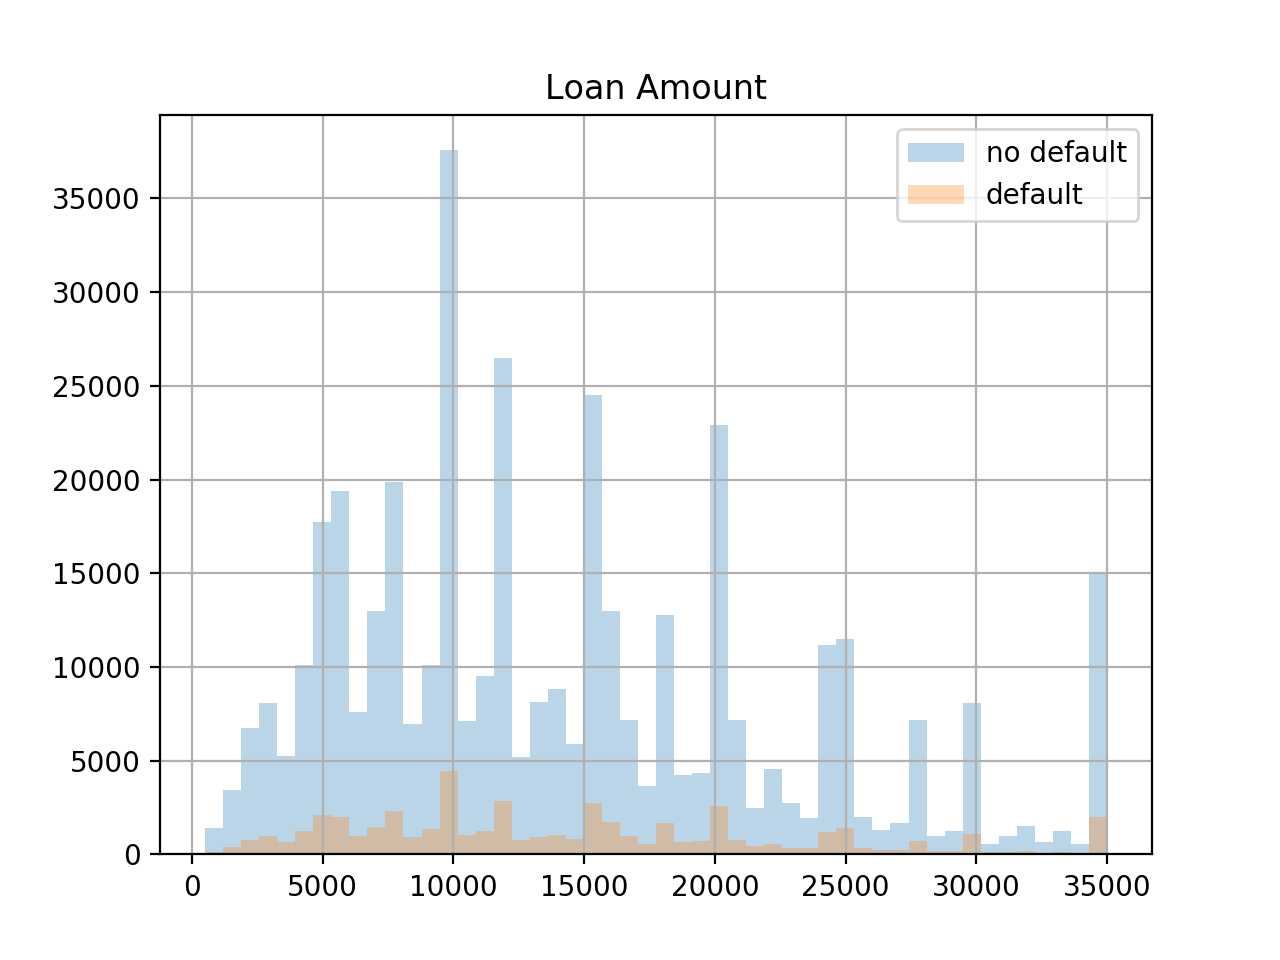

In [90]:
# Plot the loan amount against the loan status
plot_cont_loan_status(loan_data, 'loan_amnt', 'Loan Amount')

In [69]:
non_str_cols = loan_data.select_dtypes(exclude='object').columns.values[3:]
non_str_cols

array(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'emp_length_int',
       'mnths_since_earliest_cr_line', 'term_months',
       'mths_since_issue_d', 'loan_status_int', 'mnths_since_last_pymnt',
       'mnths_since_last_credit_pull'], dtype=object)

<IPython.core.display.Javascript object>


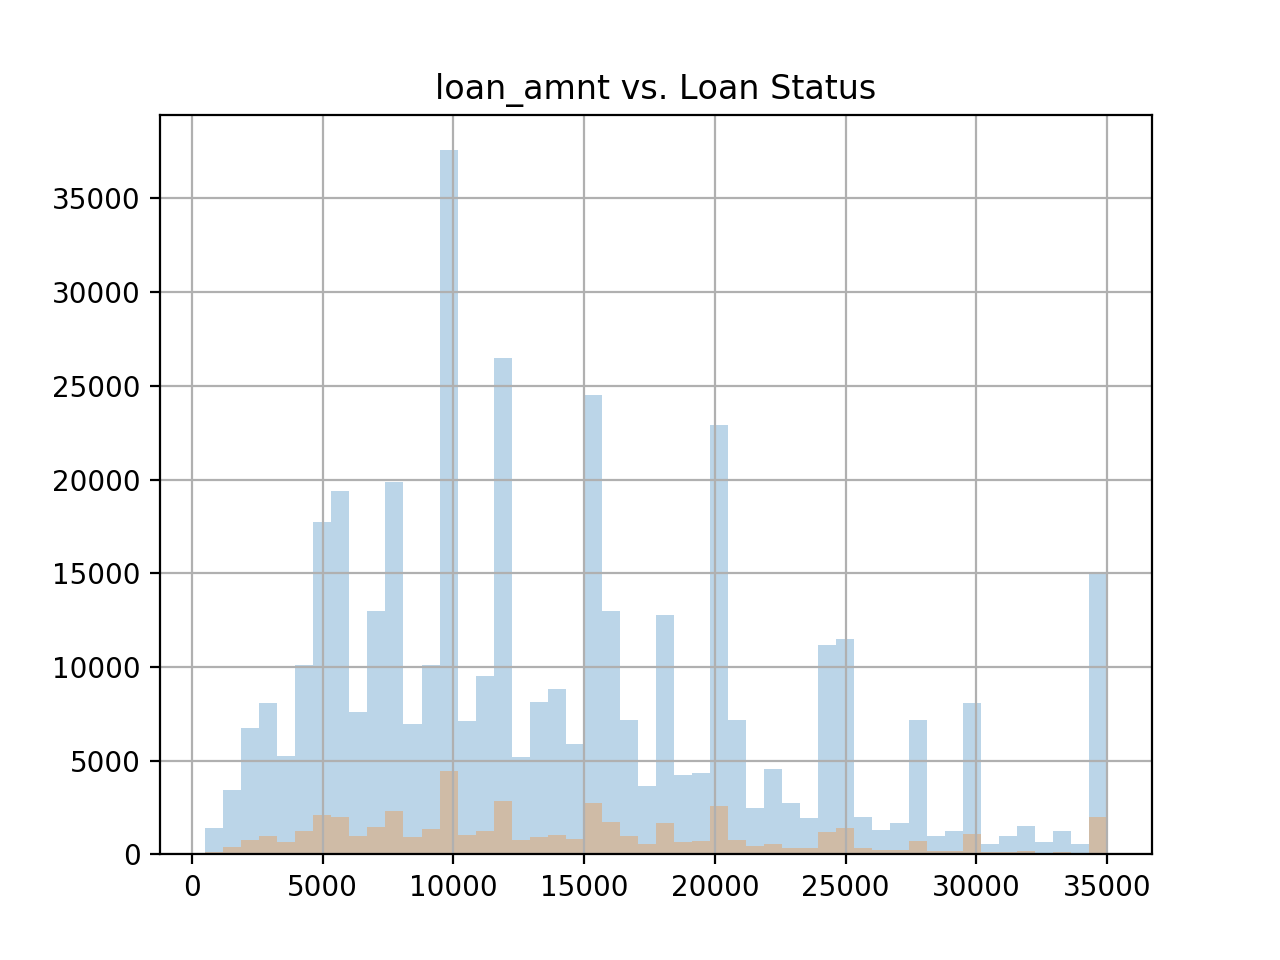

<IPython.core.display.Javascript object>


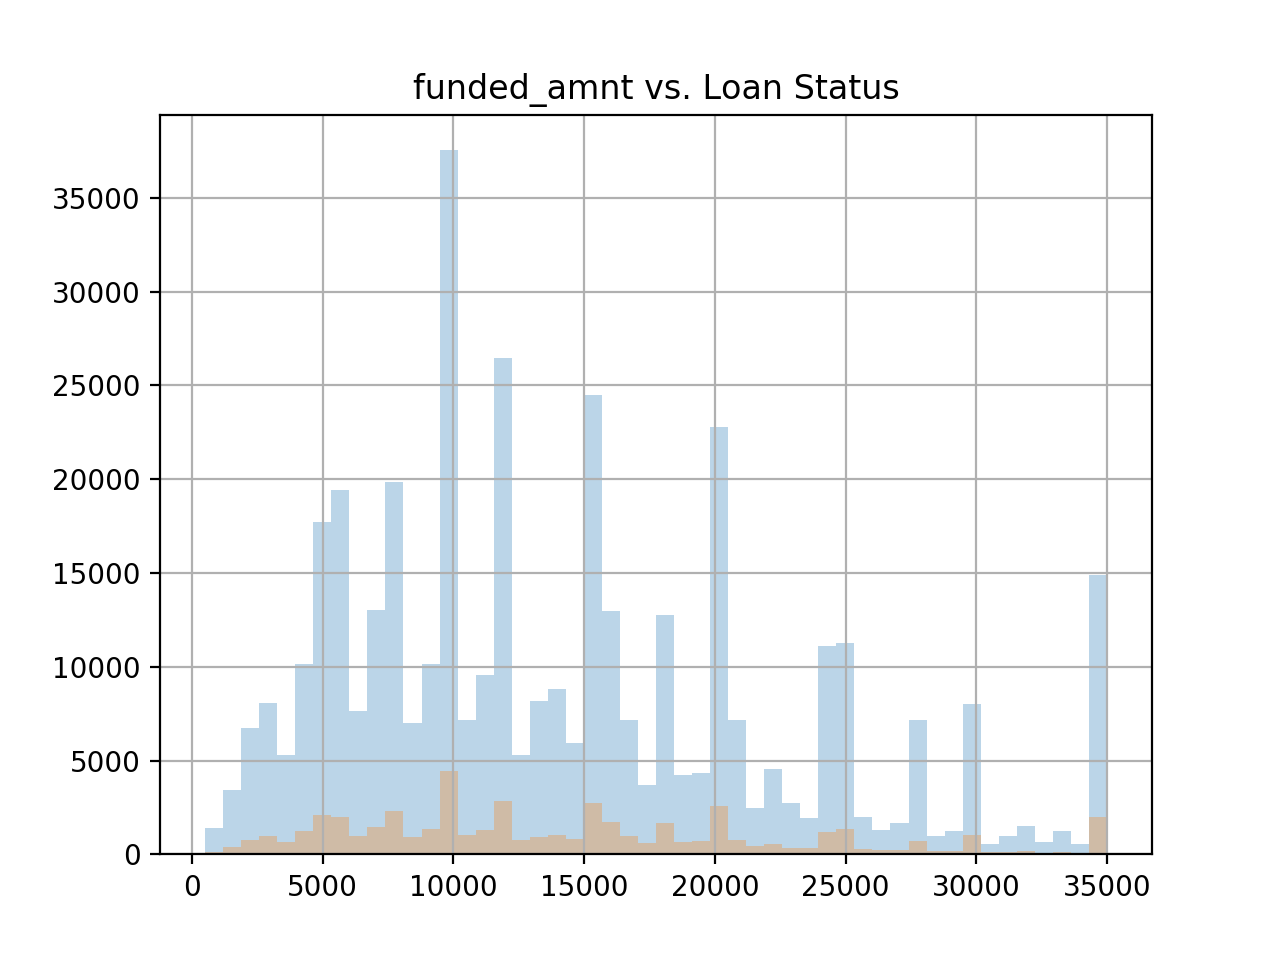

<IPython.core.display.Javascript object>


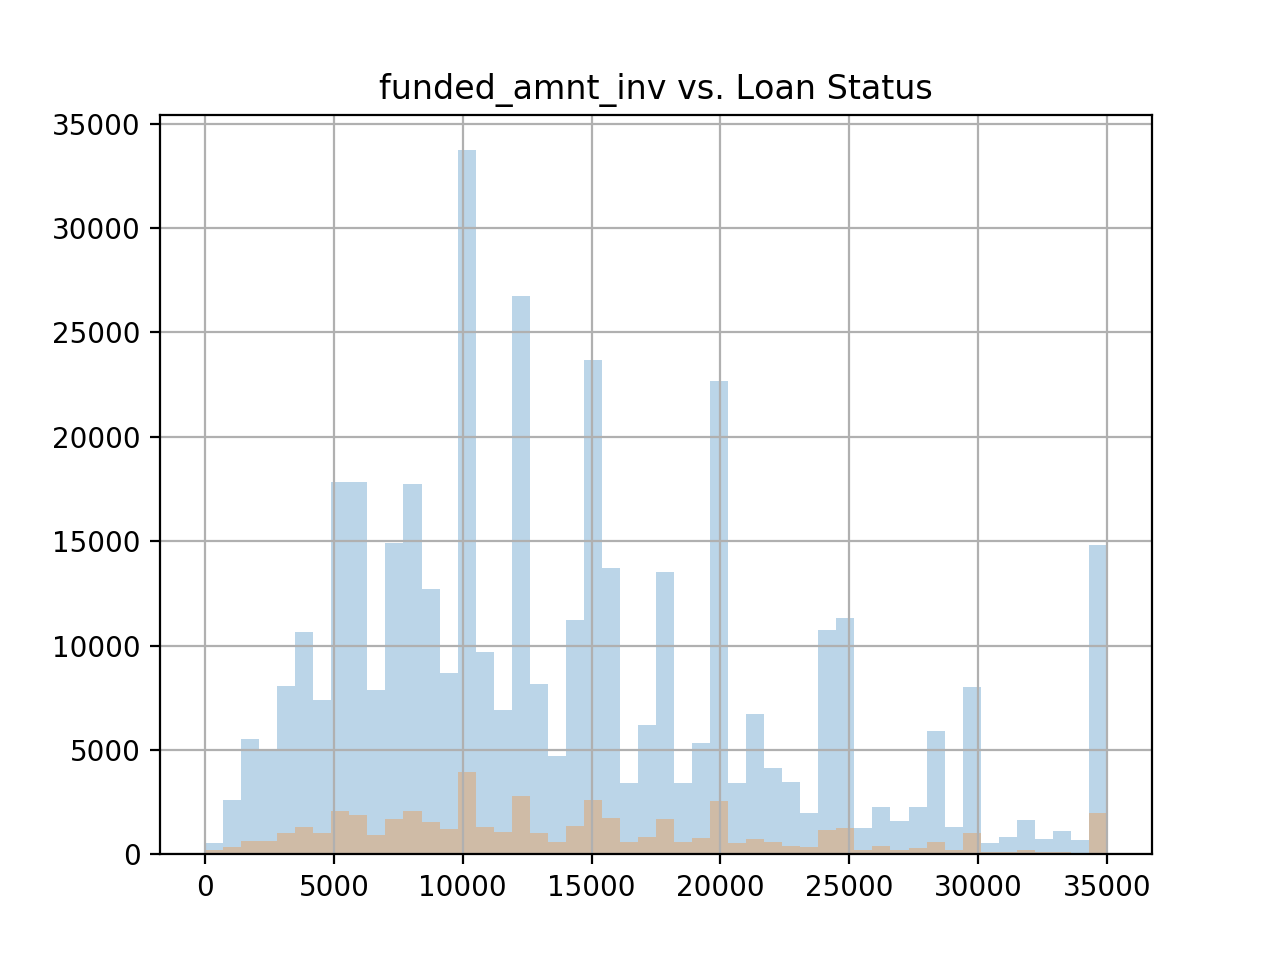

<IPython.core.display.Javascript object>


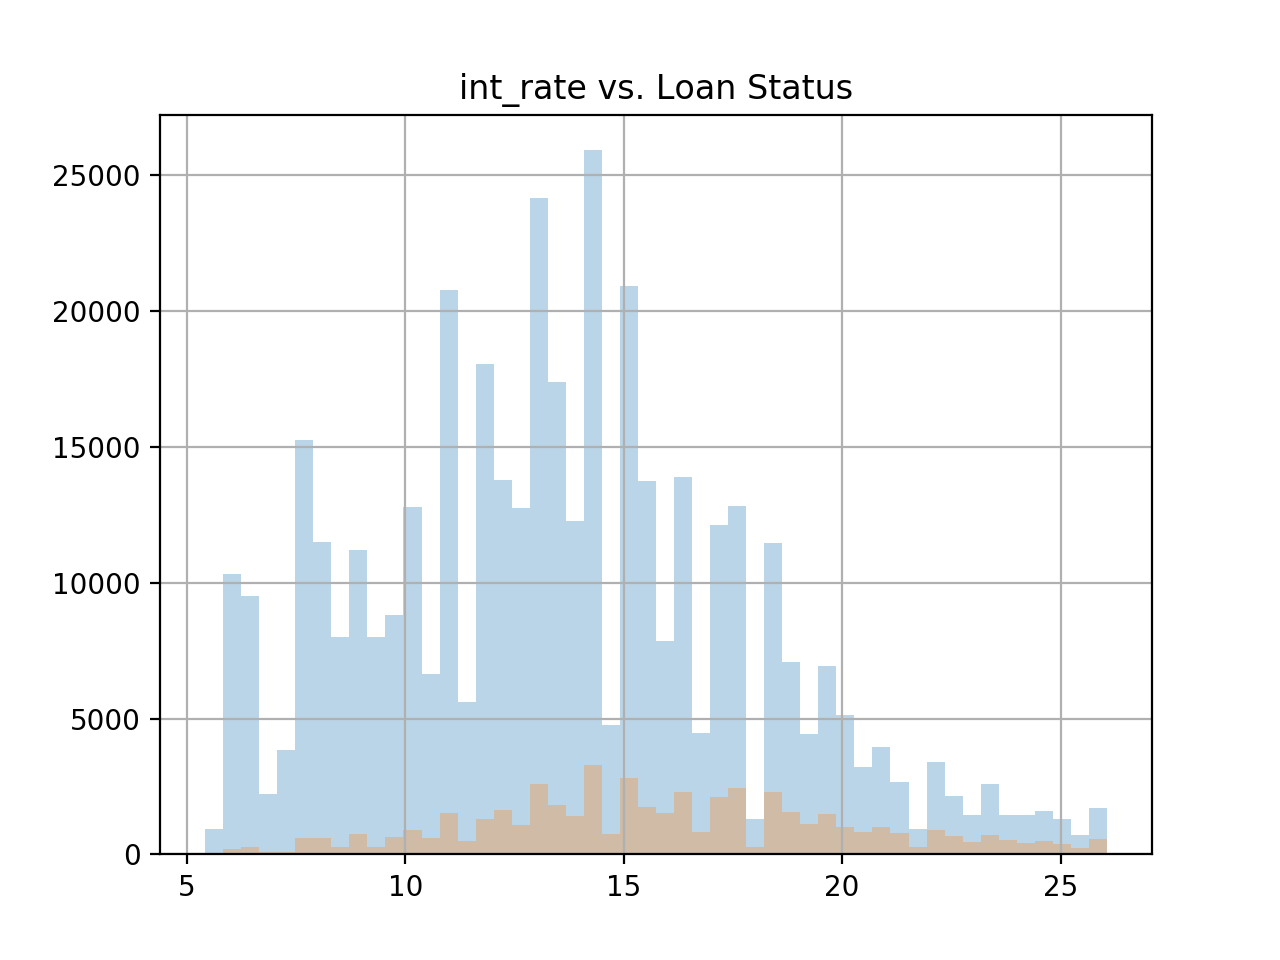

<IPython.core.display.Javascript object>


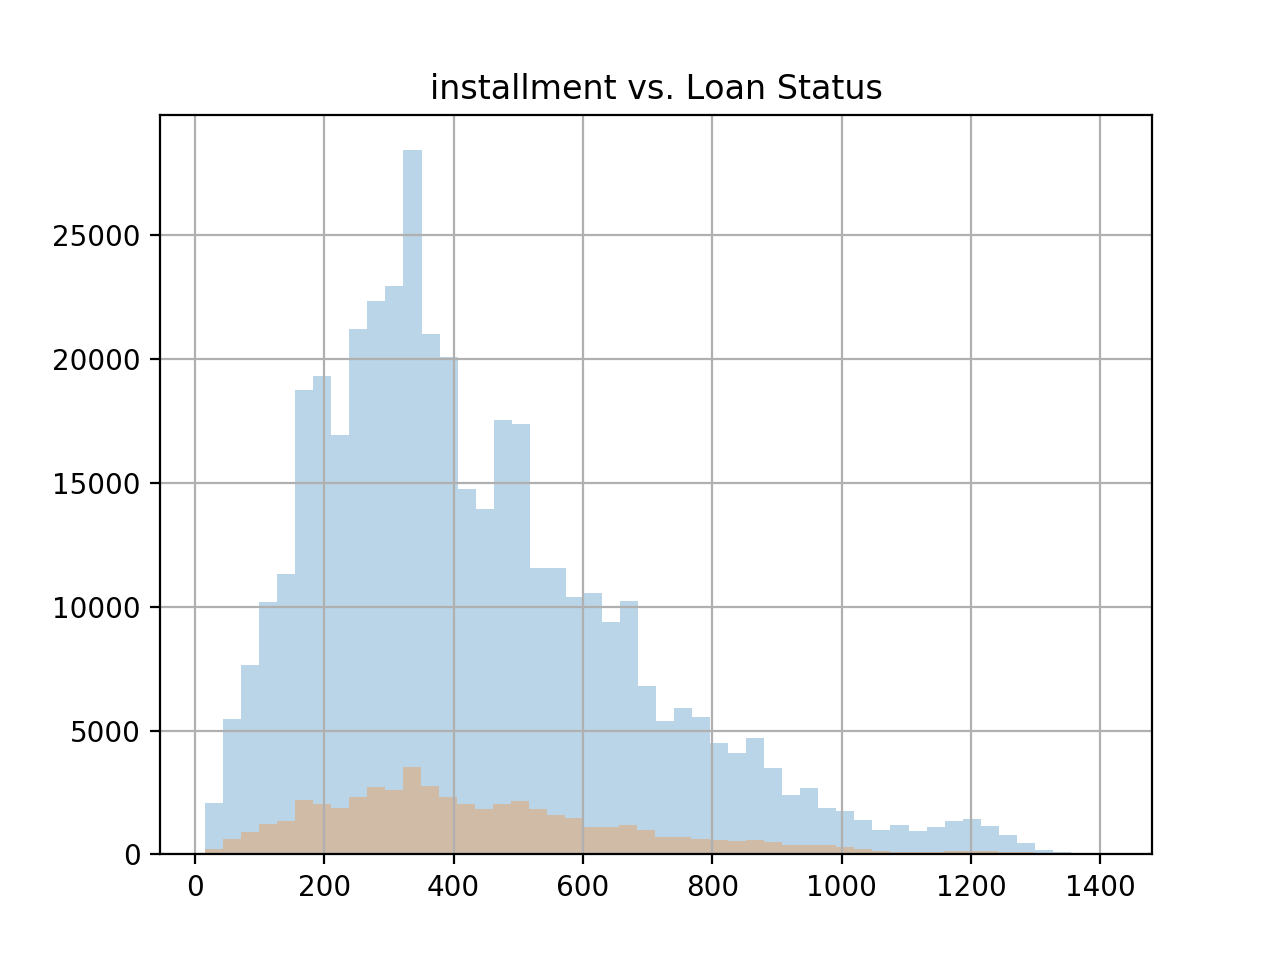

<IPython.core.display.Javascript object>


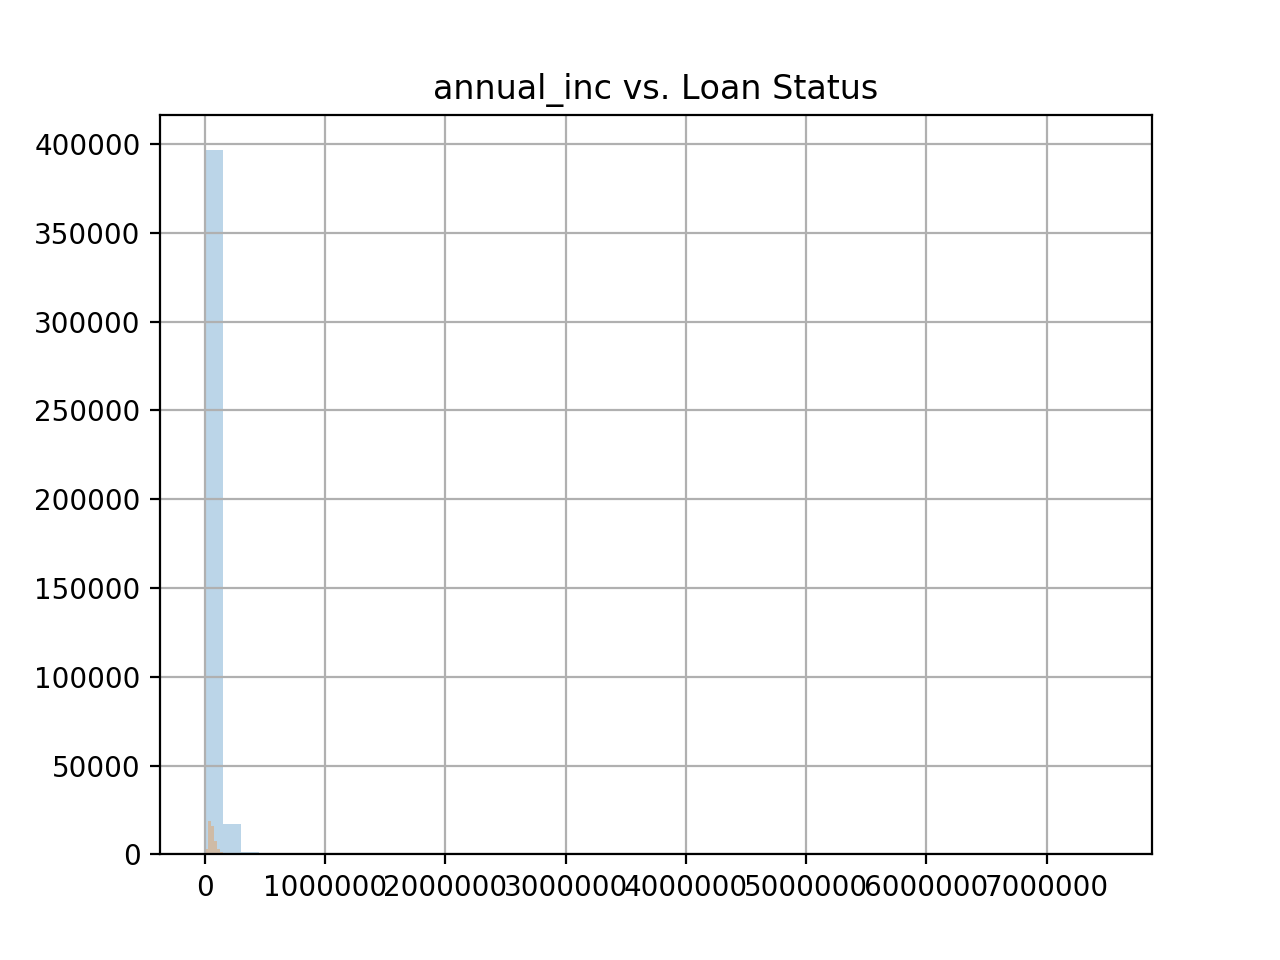

<IPython.core.display.Javascript object>


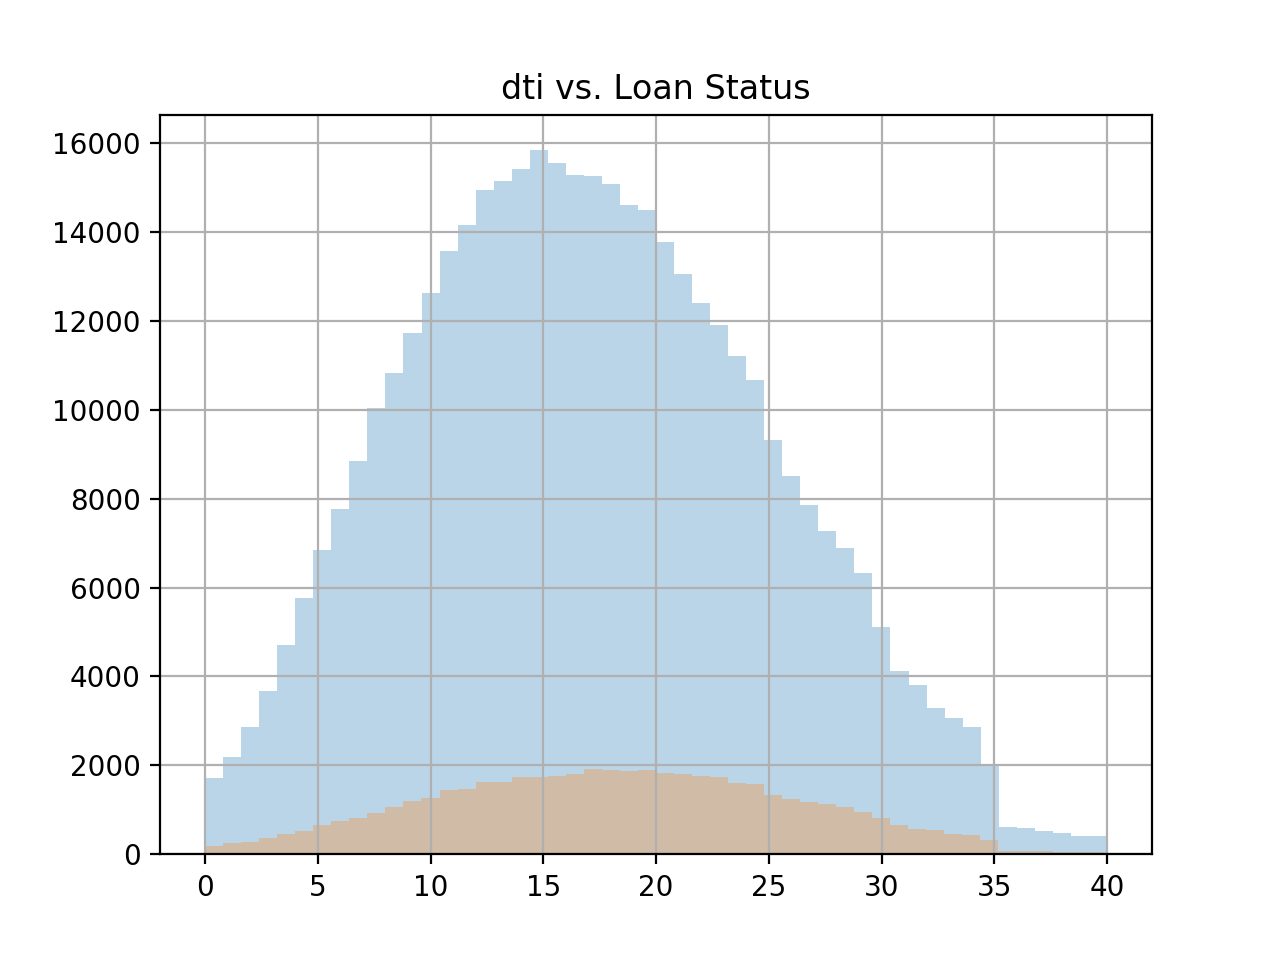

<IPython.core.display.Javascript object>


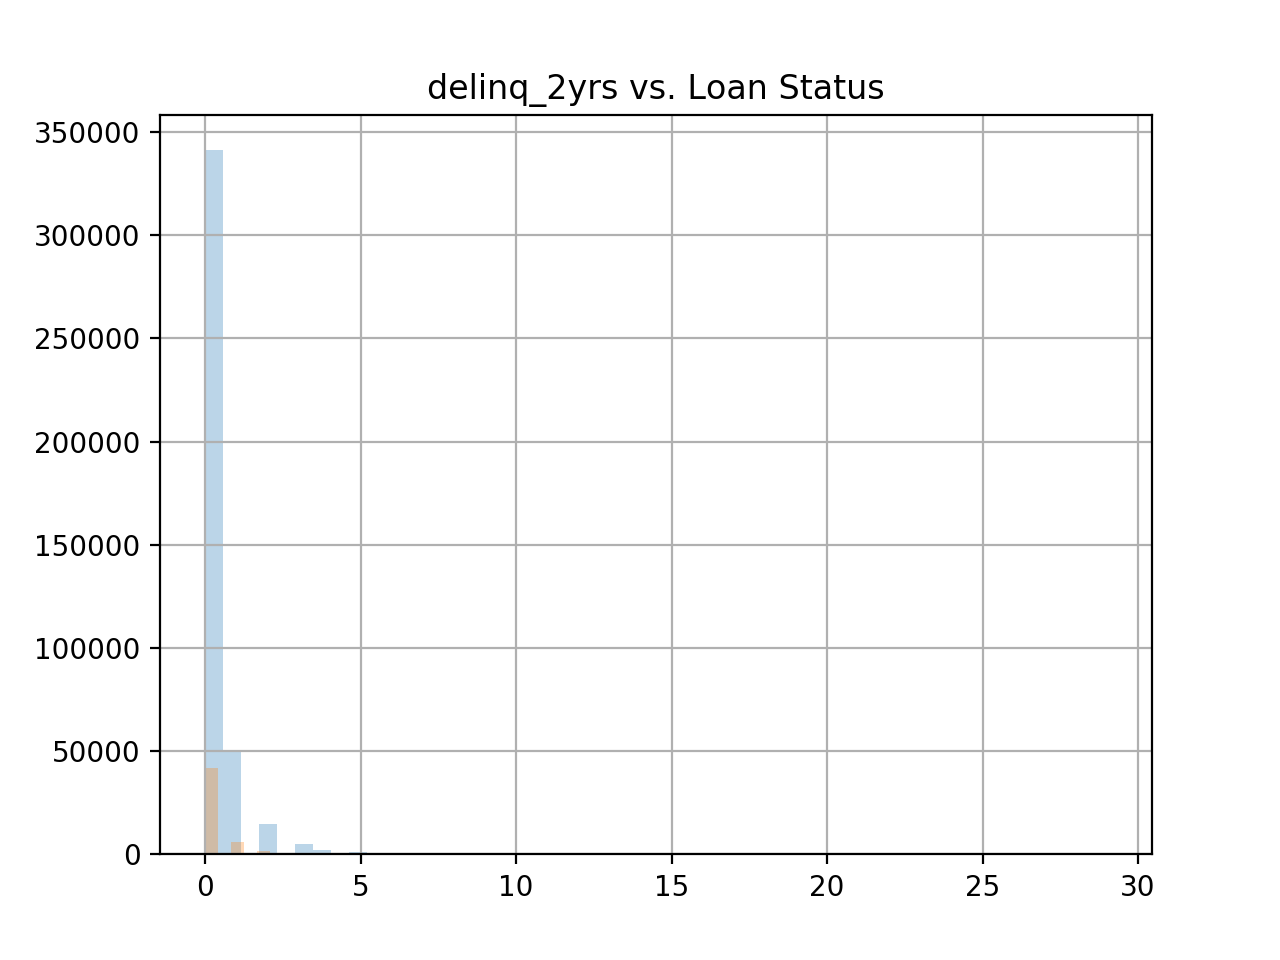

<IPython.core.display.Javascript object>


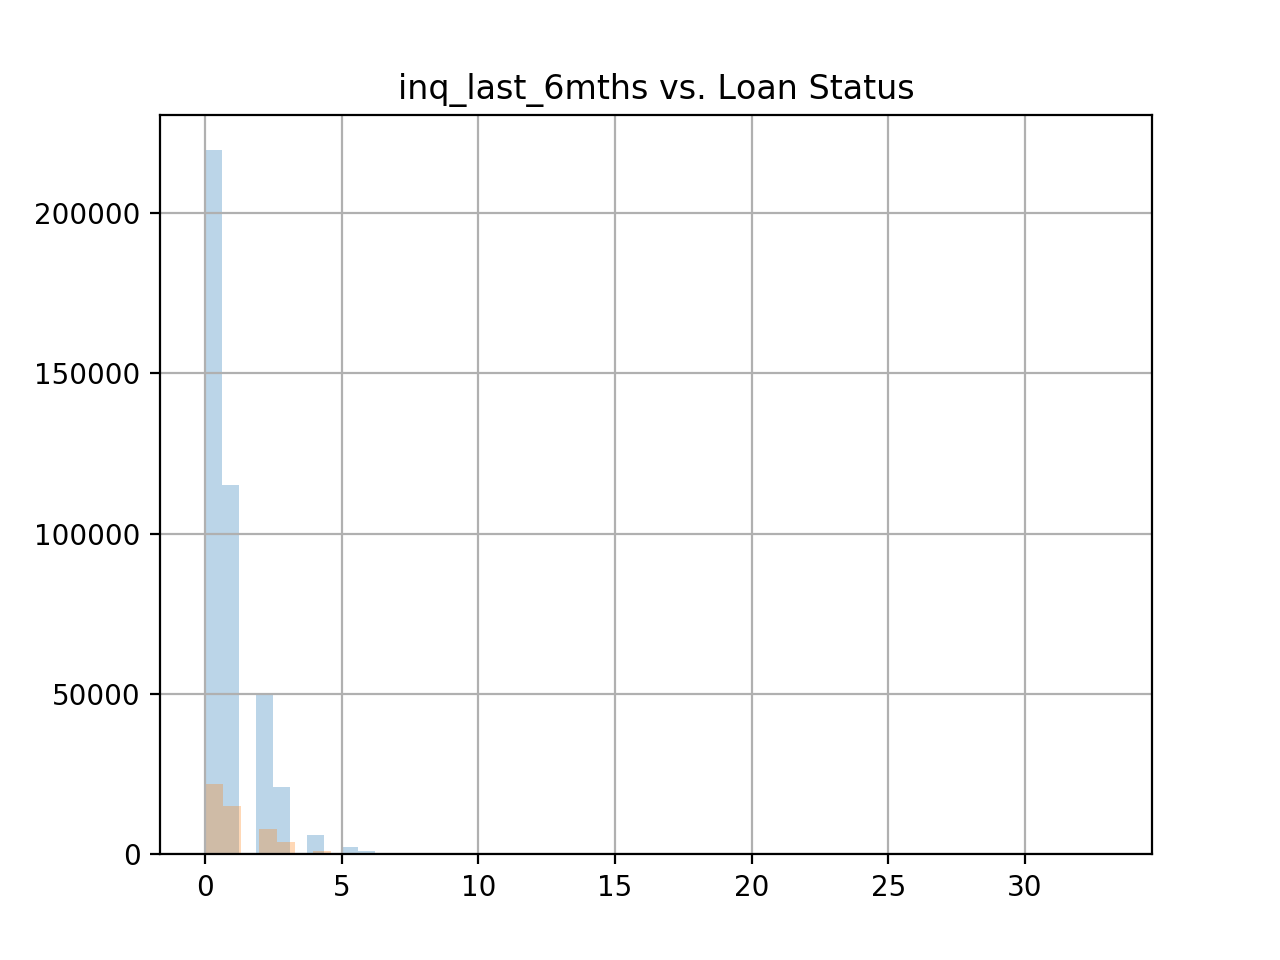

<IPython.core.display.Javascript object>


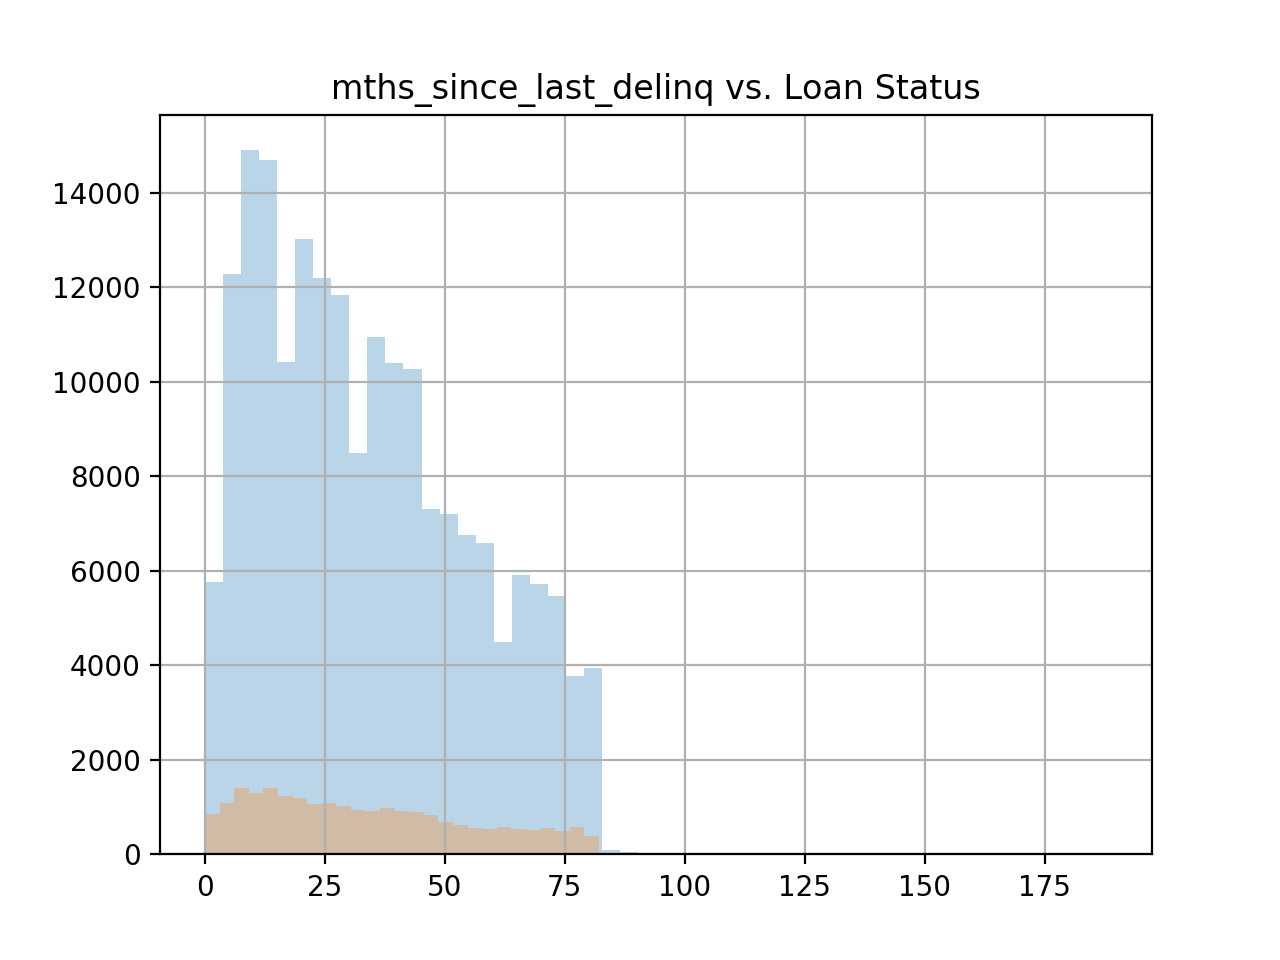

<IPython.core.display.Javascript object>


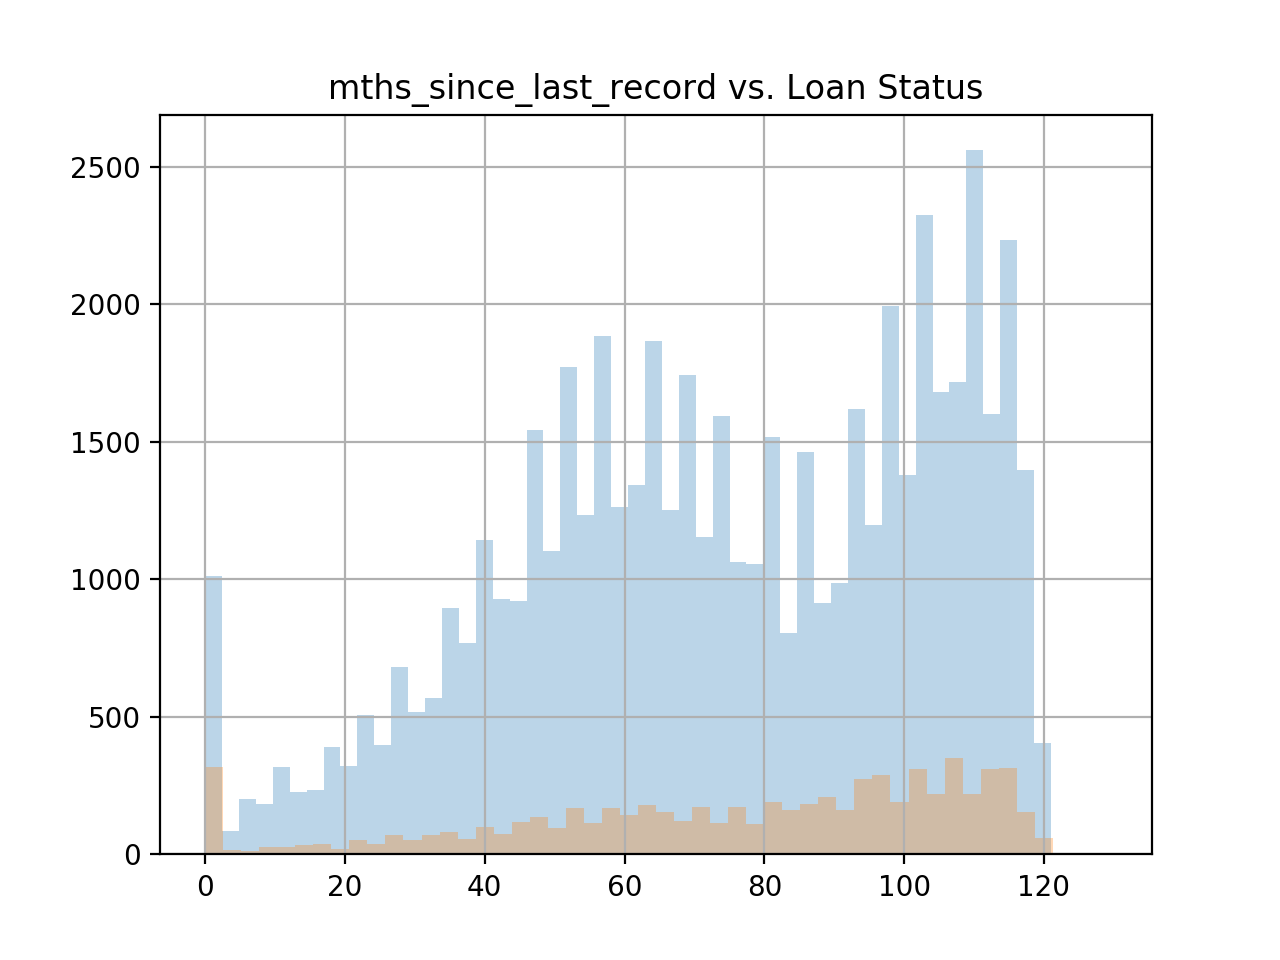

<IPython.core.display.Javascript object>


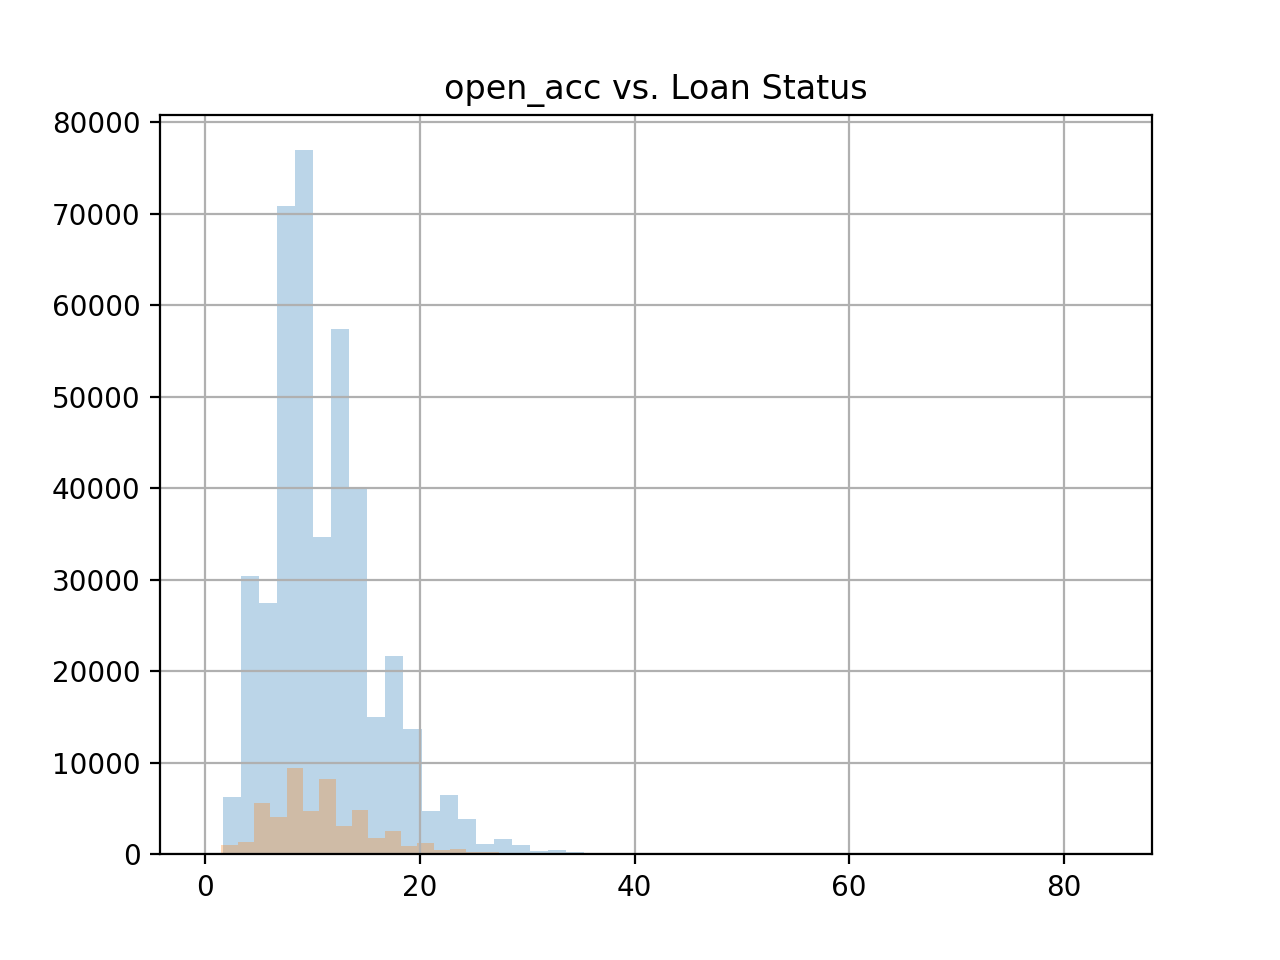

<IPython.core.display.Javascript object>


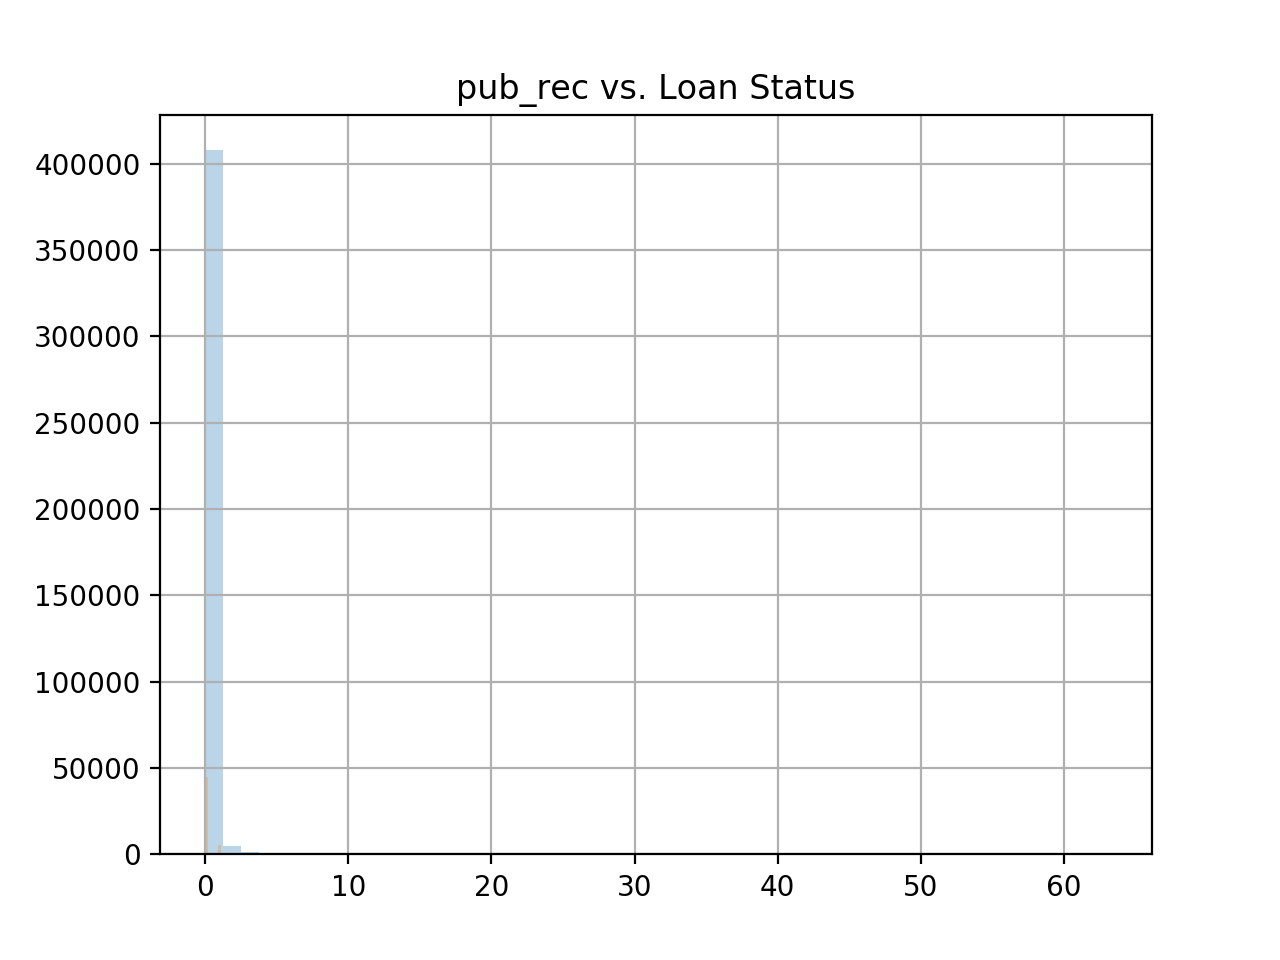

<IPython.core.display.Javascript object>


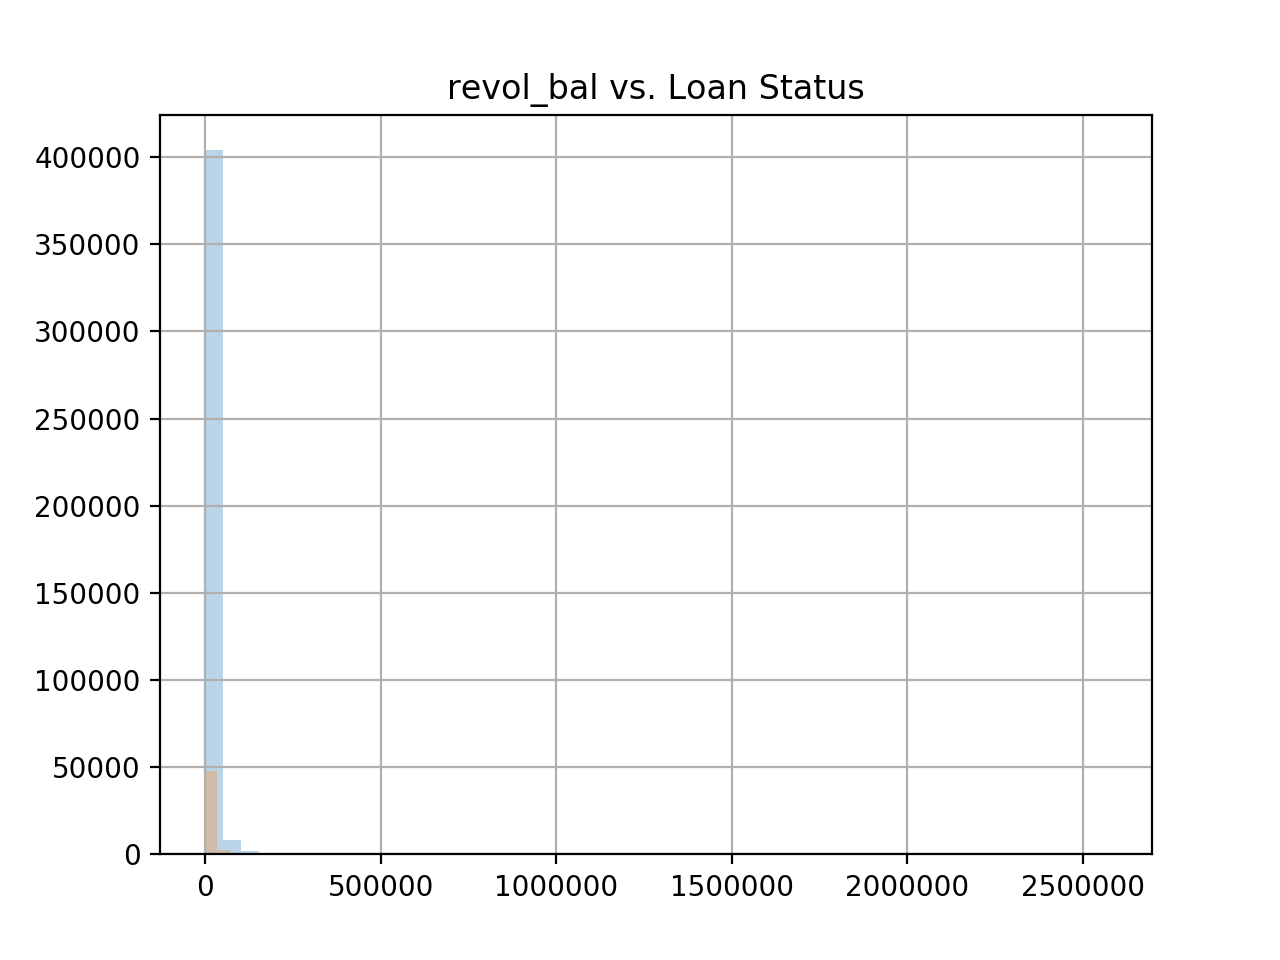

<IPython.core.display.Javascript object>


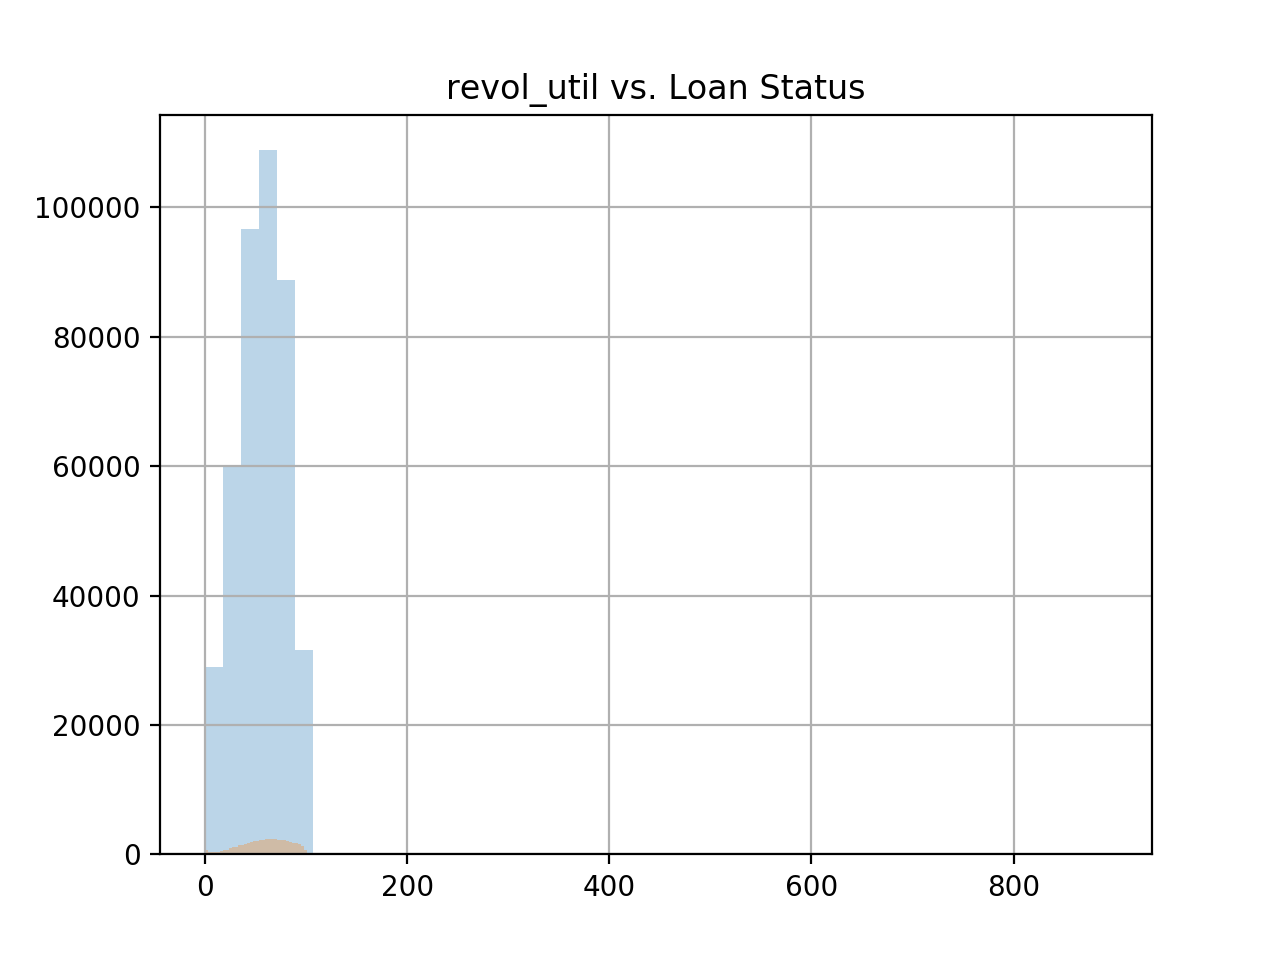

/Users/ankurmanikandan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


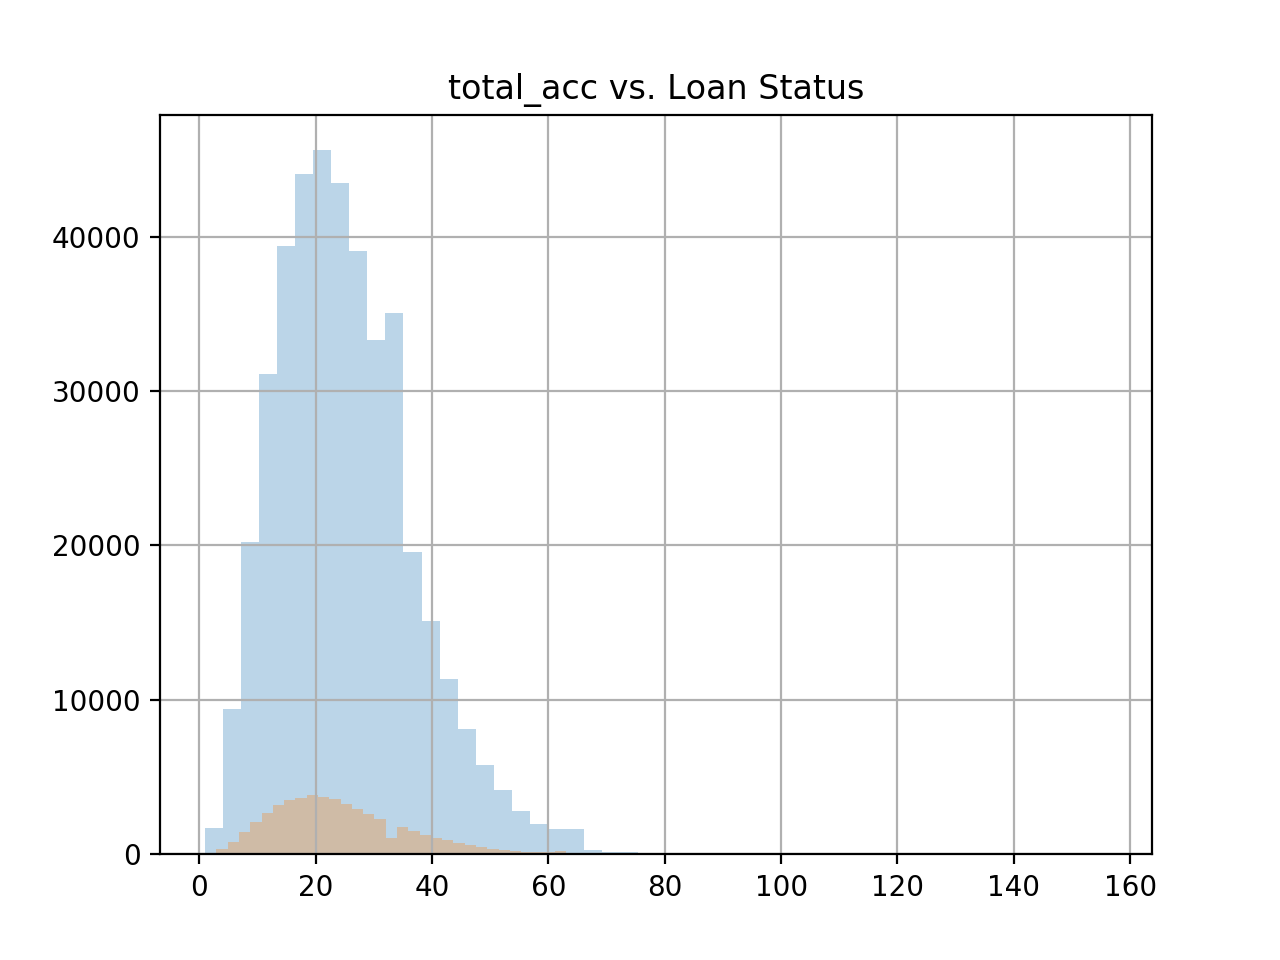

<IPython.core.display.Javascript object>


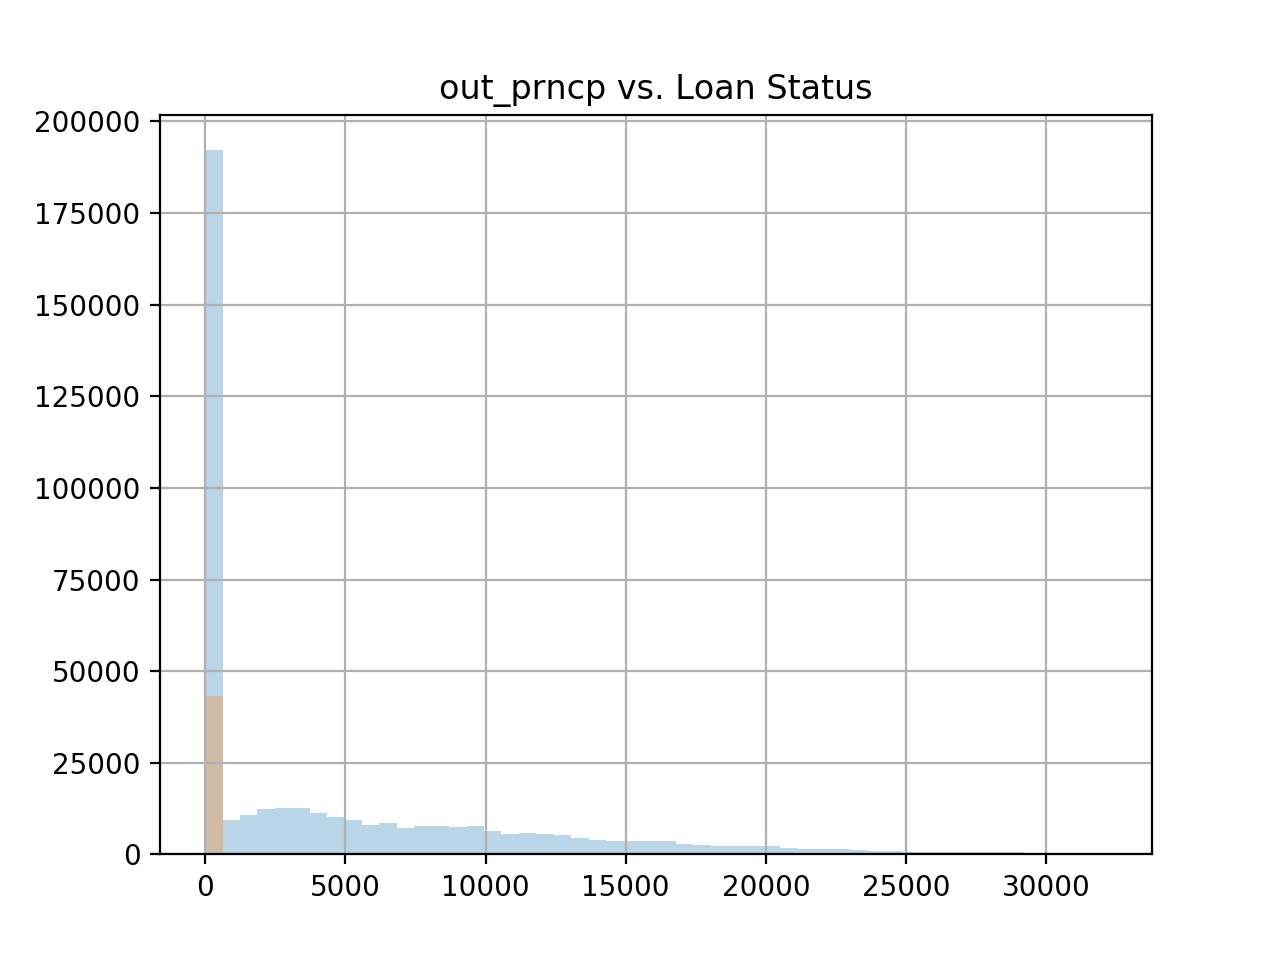

<IPython.core.display.Javascript object>


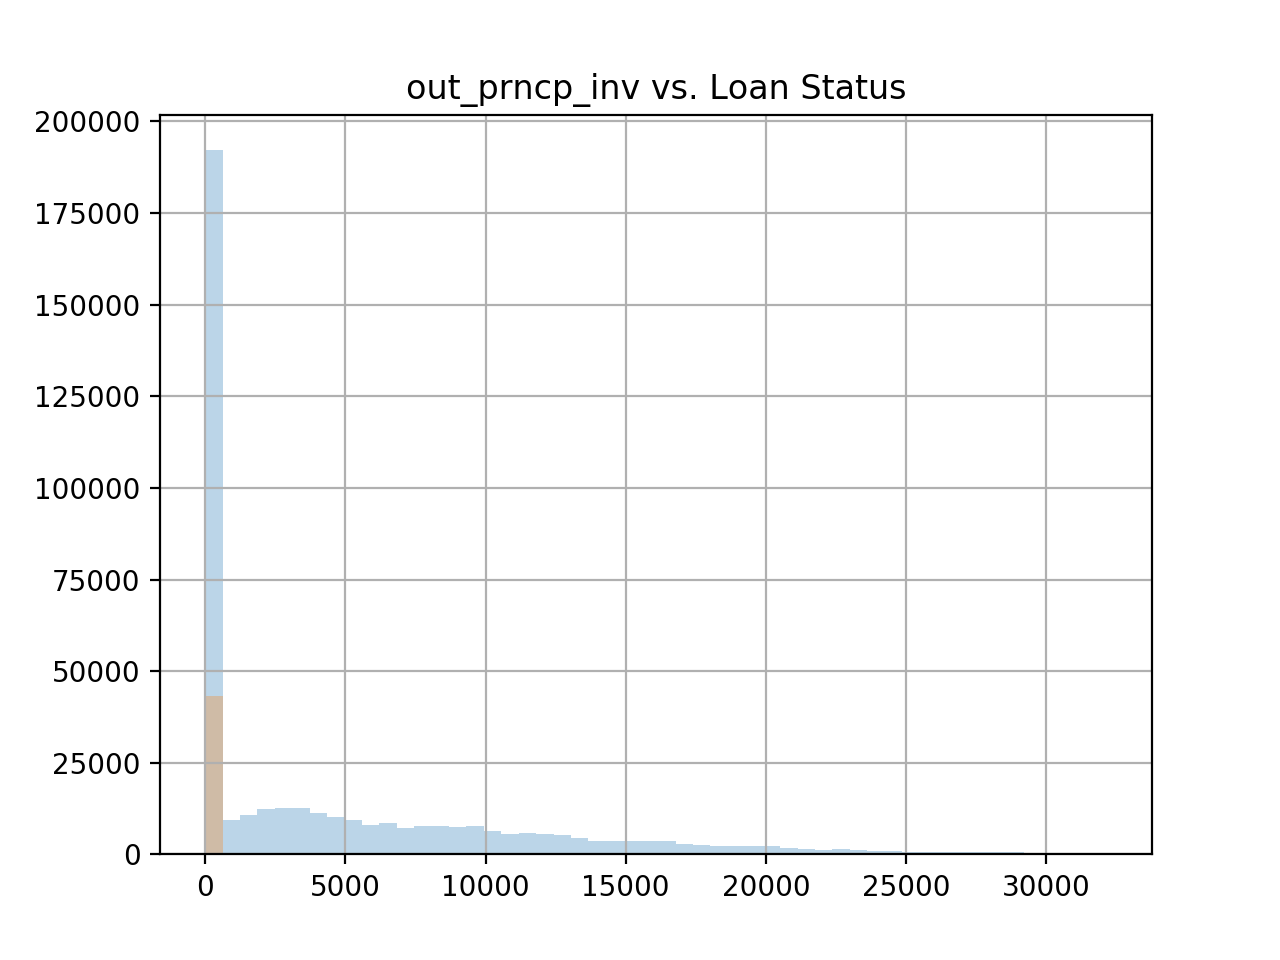

<IPython.core.display.Javascript object>


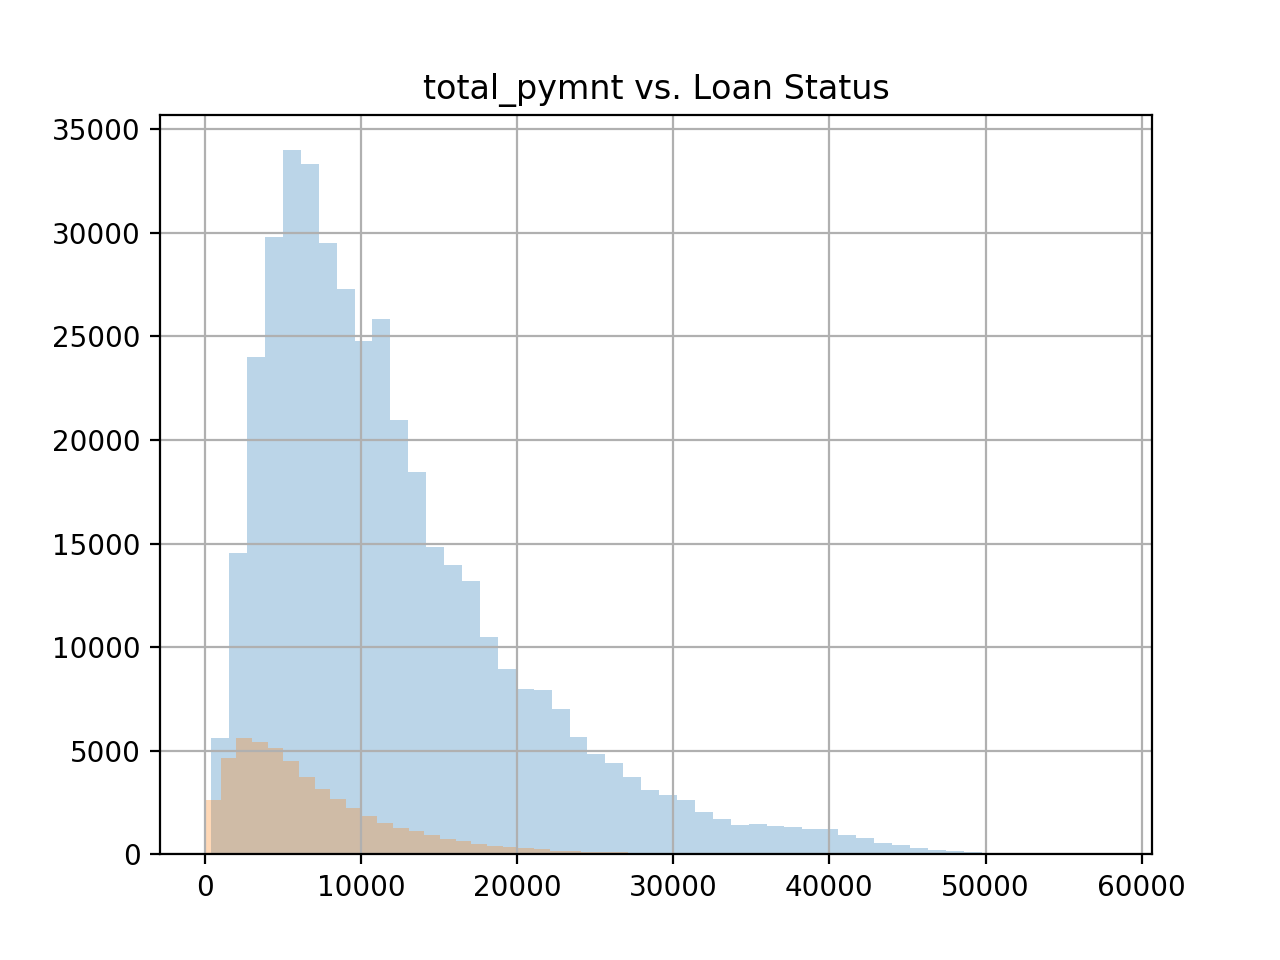

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


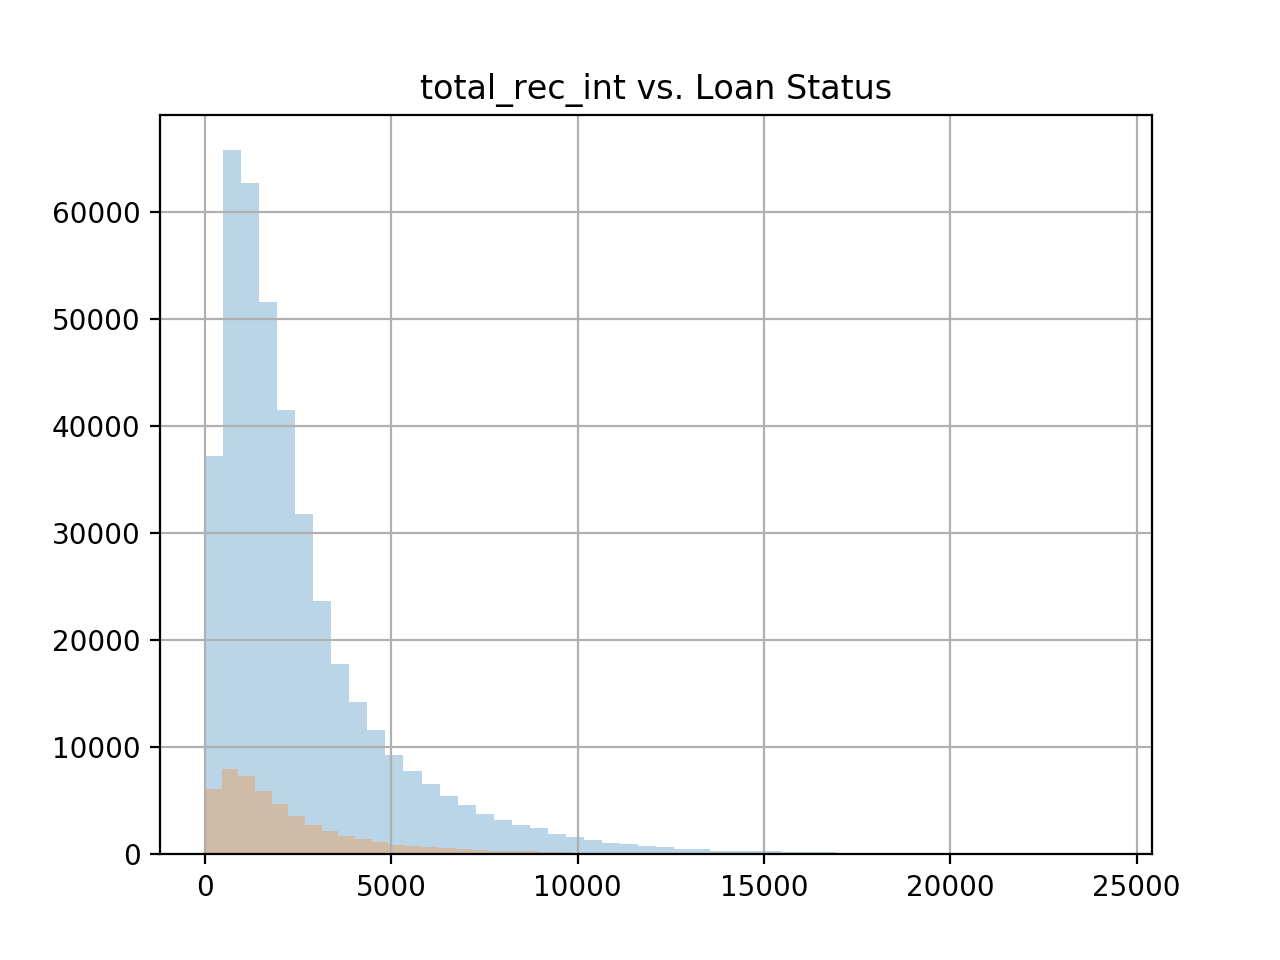

<IPython.core.display.Javascript object>


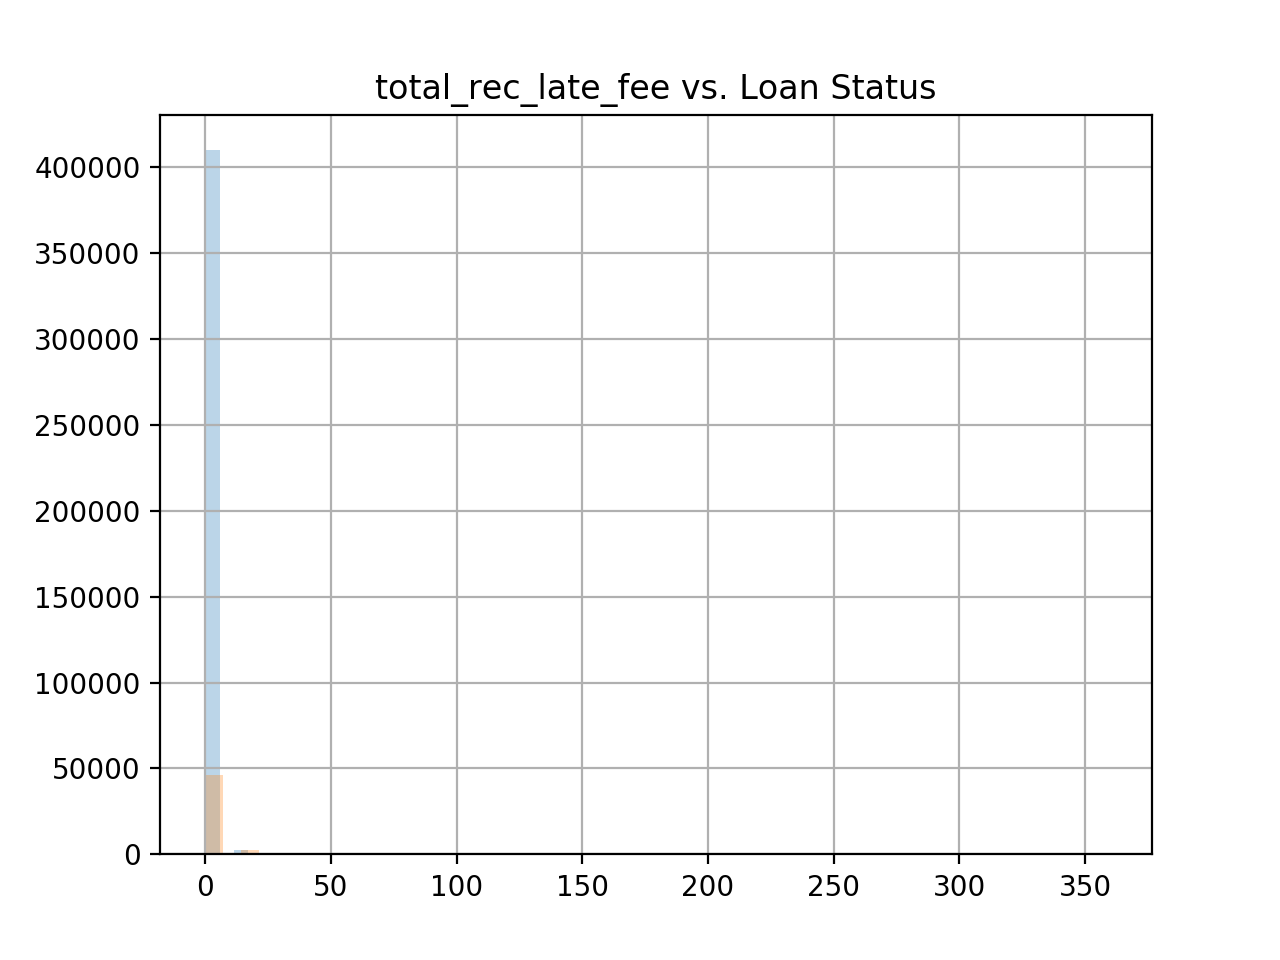

<IPython.core.display.Javascript object>


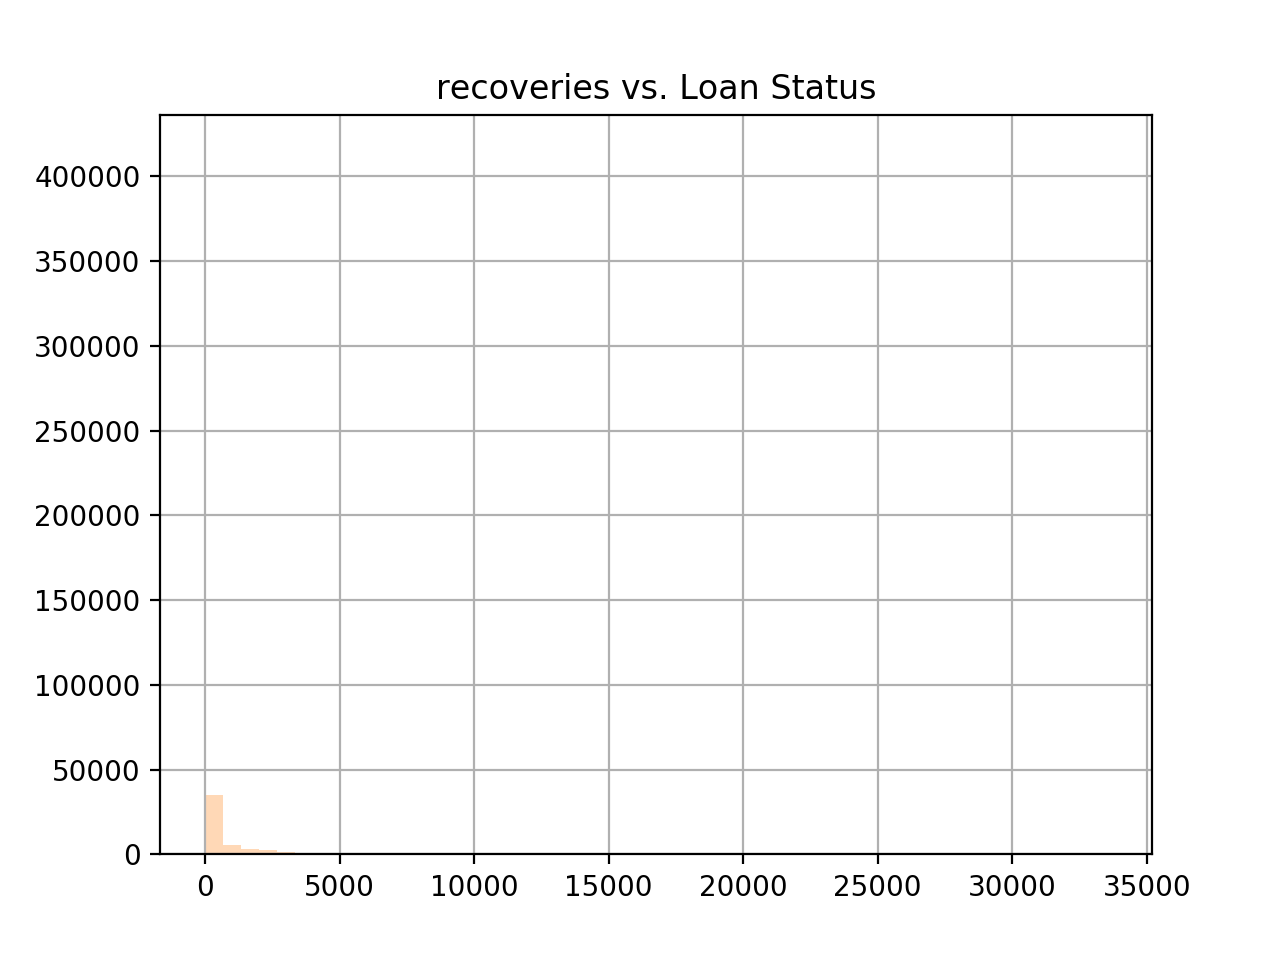

<IPython.core.display.Javascript object>


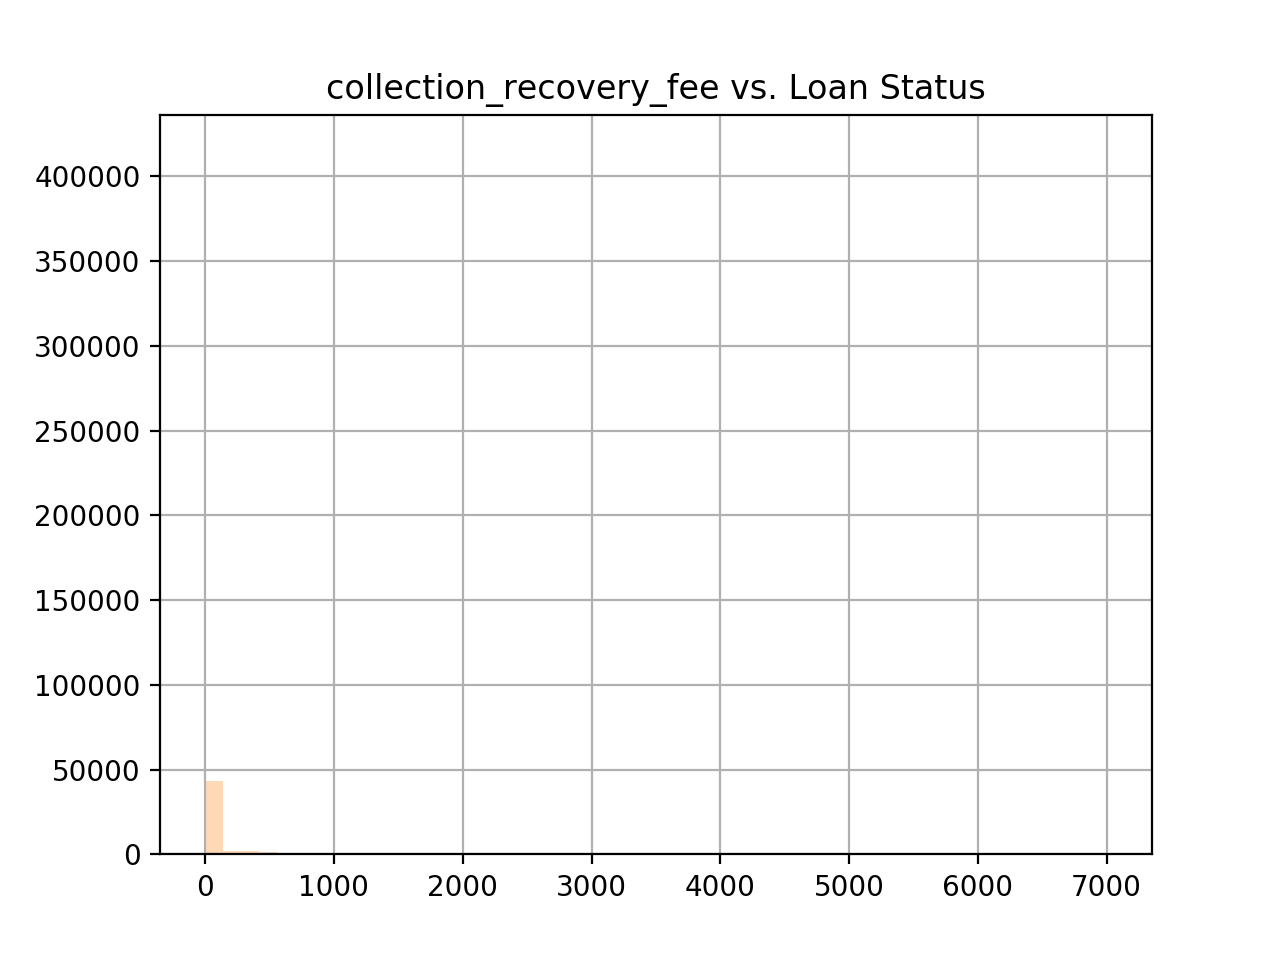

<IPython.core.display.Javascript object>


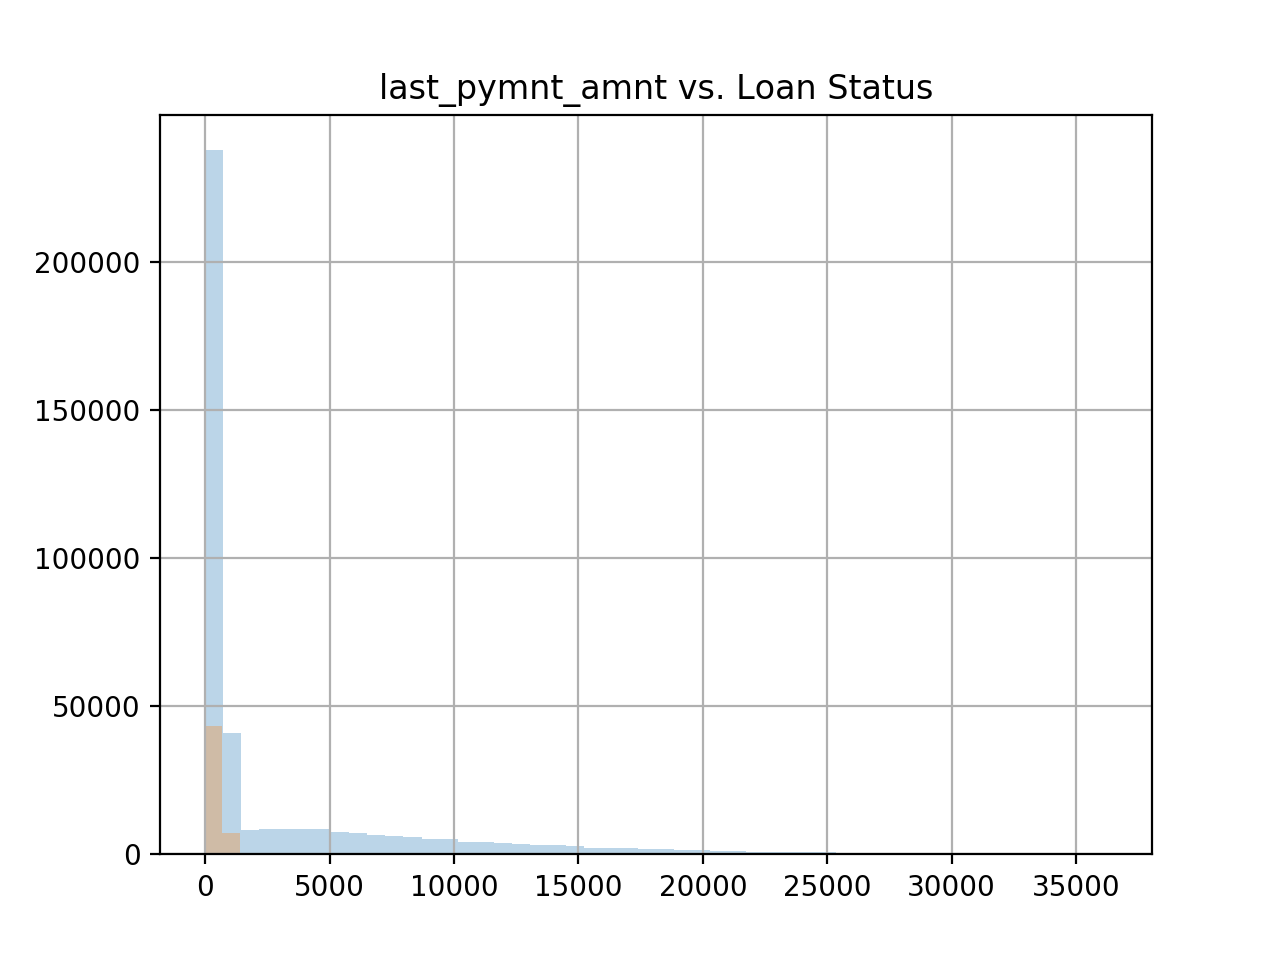

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


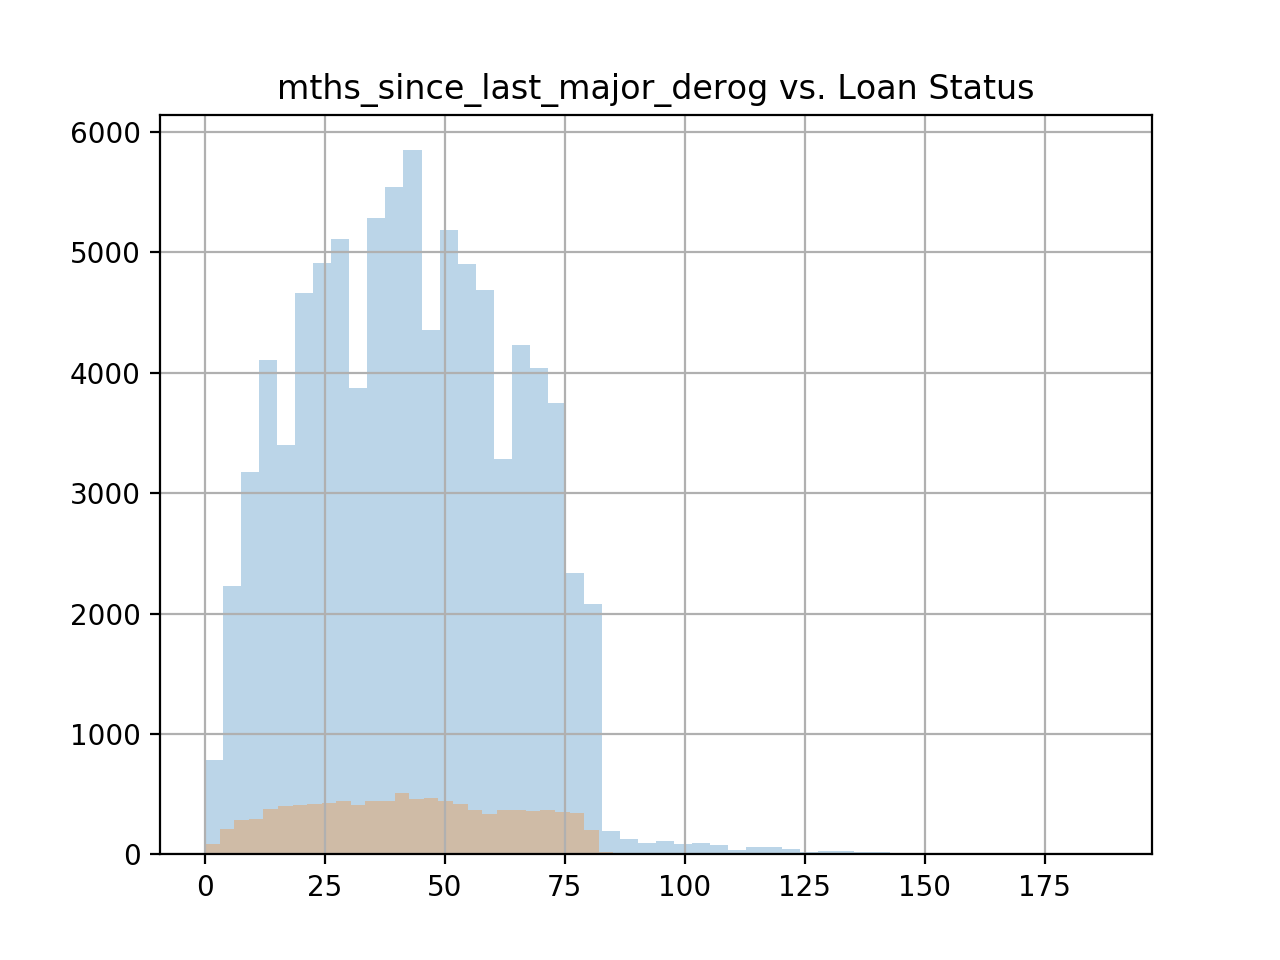

<IPython.core.display.Javascript object>


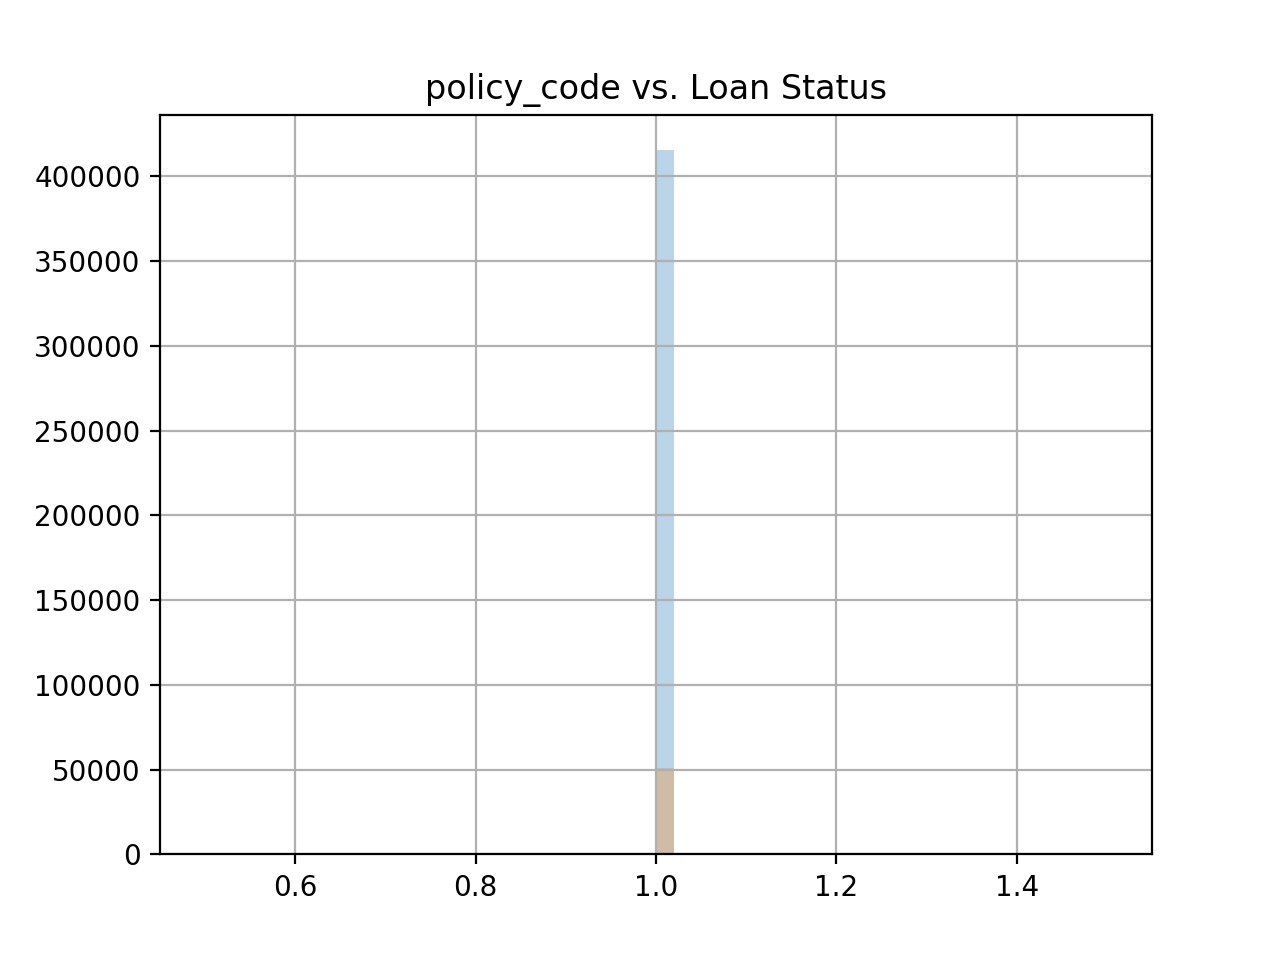

<IPython.core.display.Javascript object>


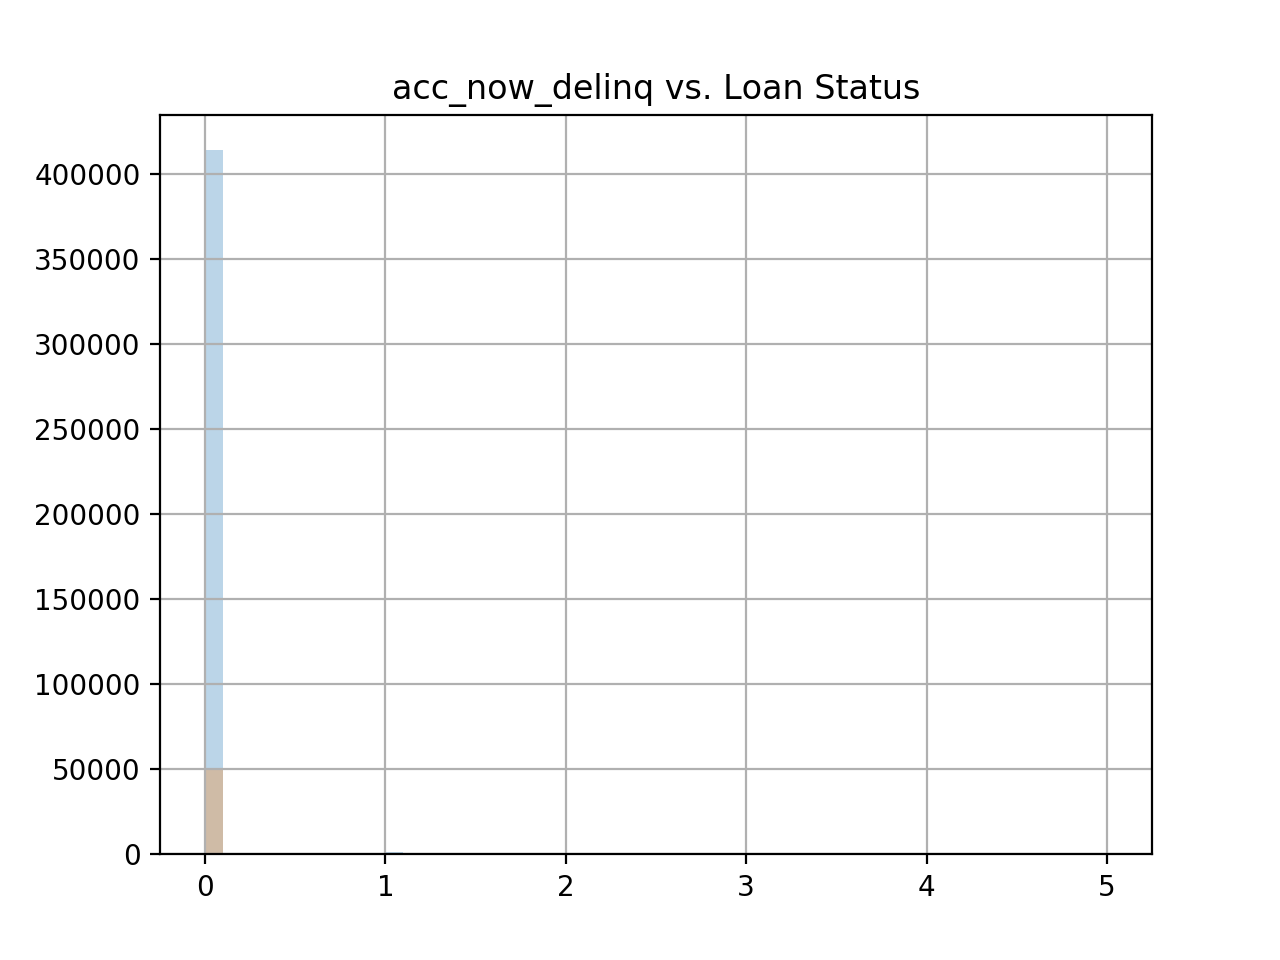

<IPython.core.display.Javascript object>


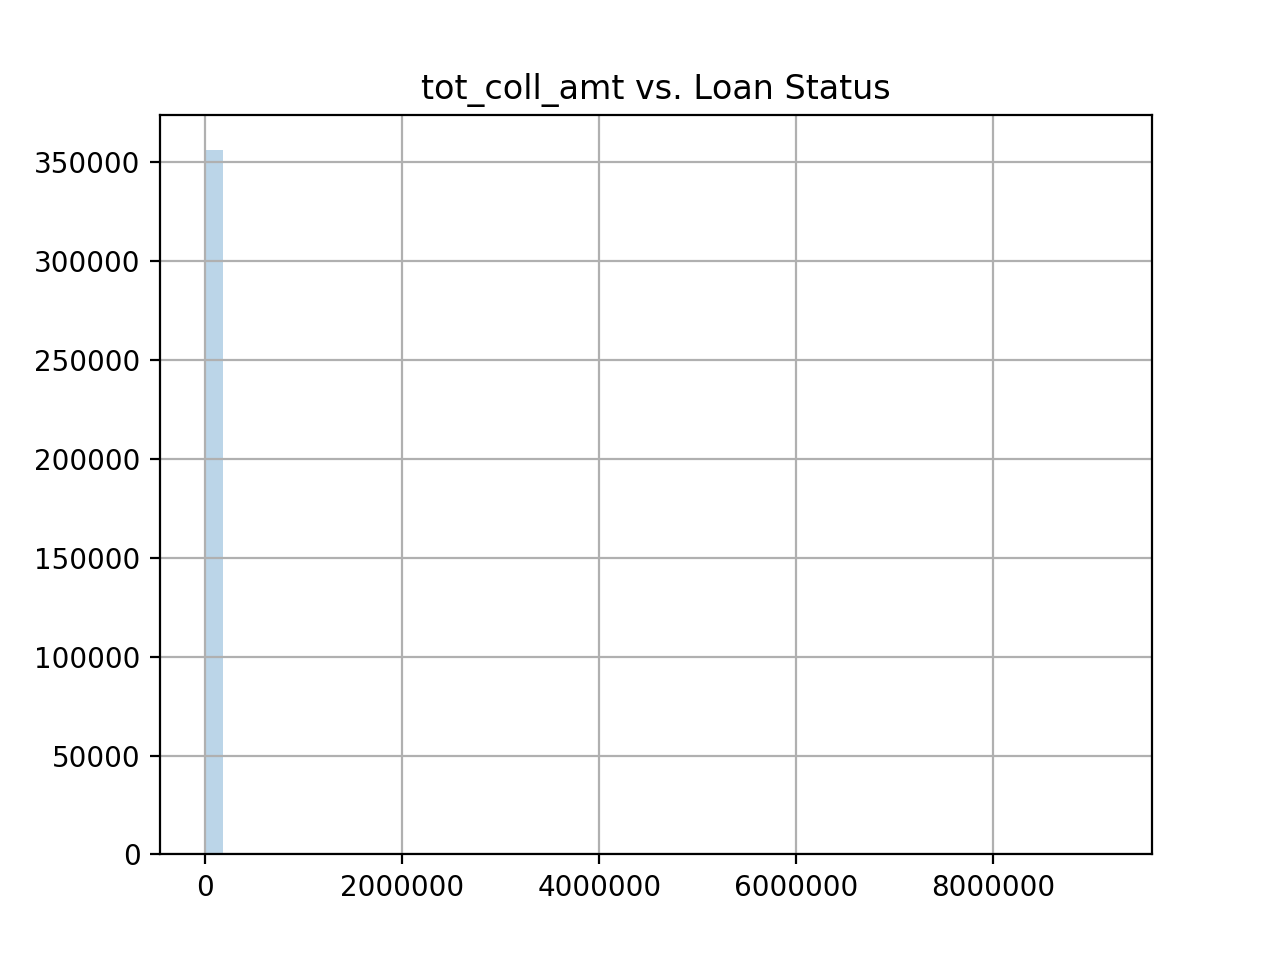

<IPython.core.display.Javascript object>


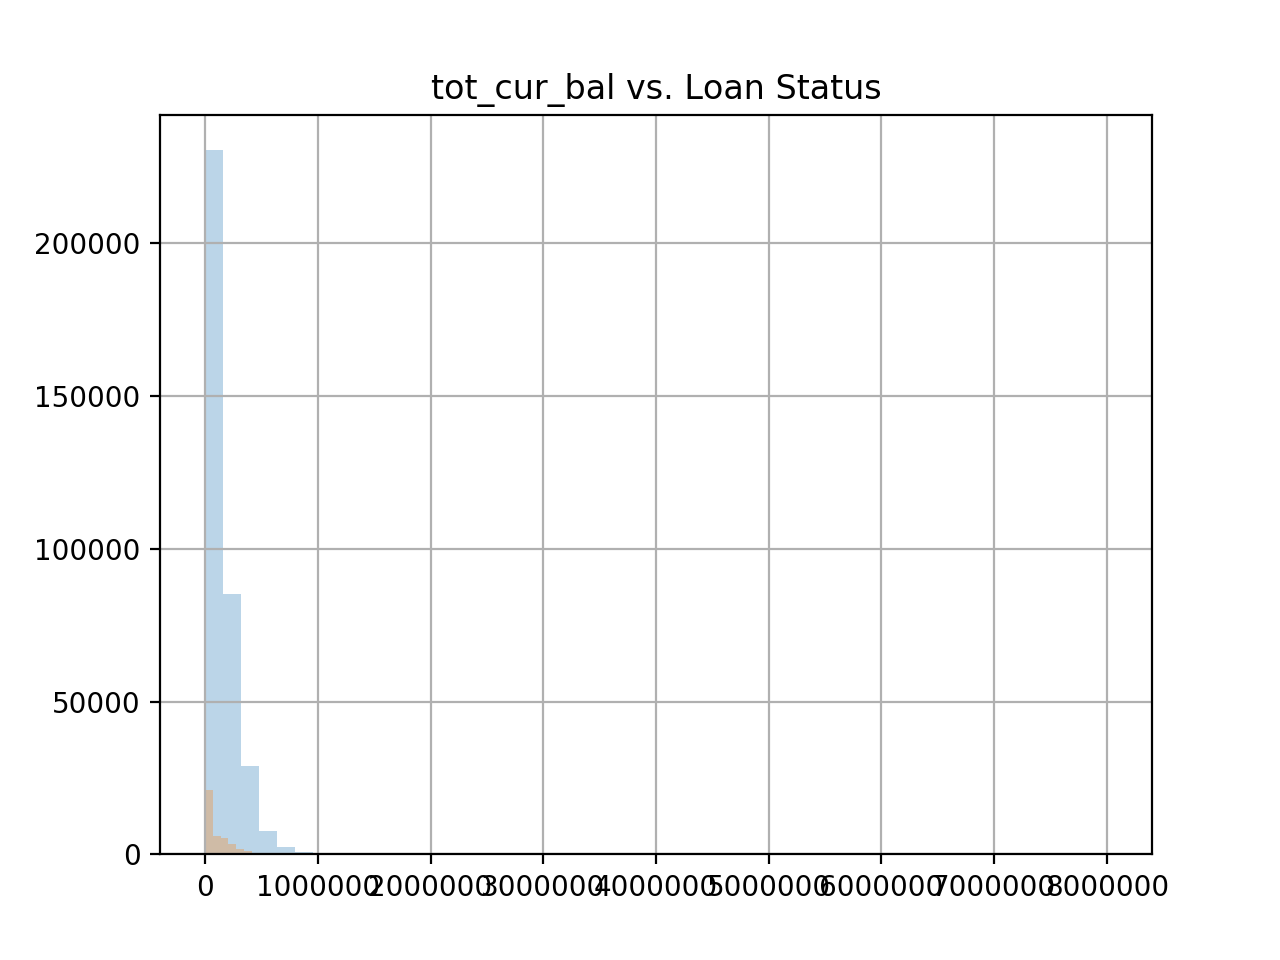

<IPython.core.display.Javascript object>


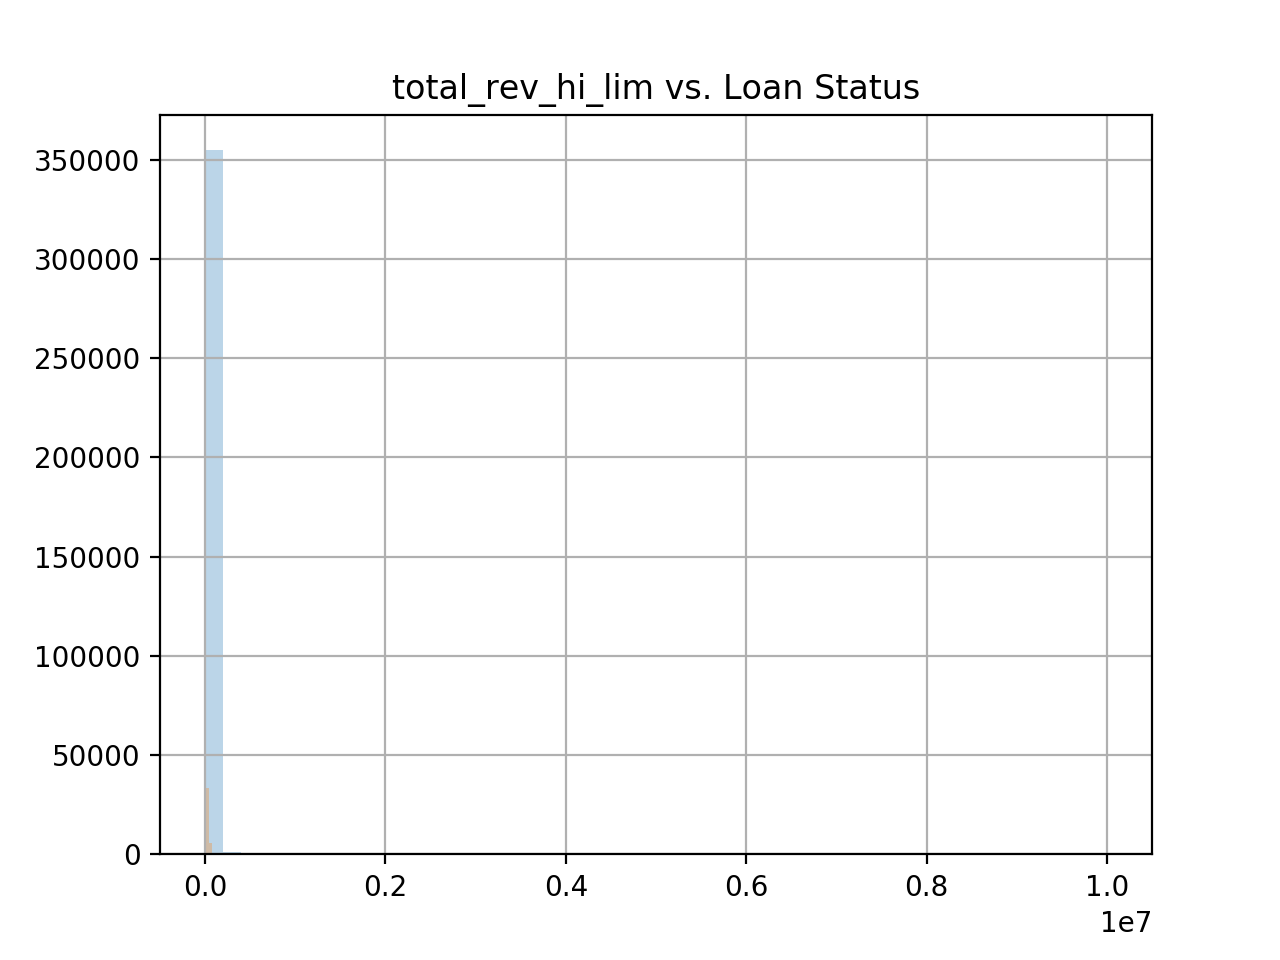

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


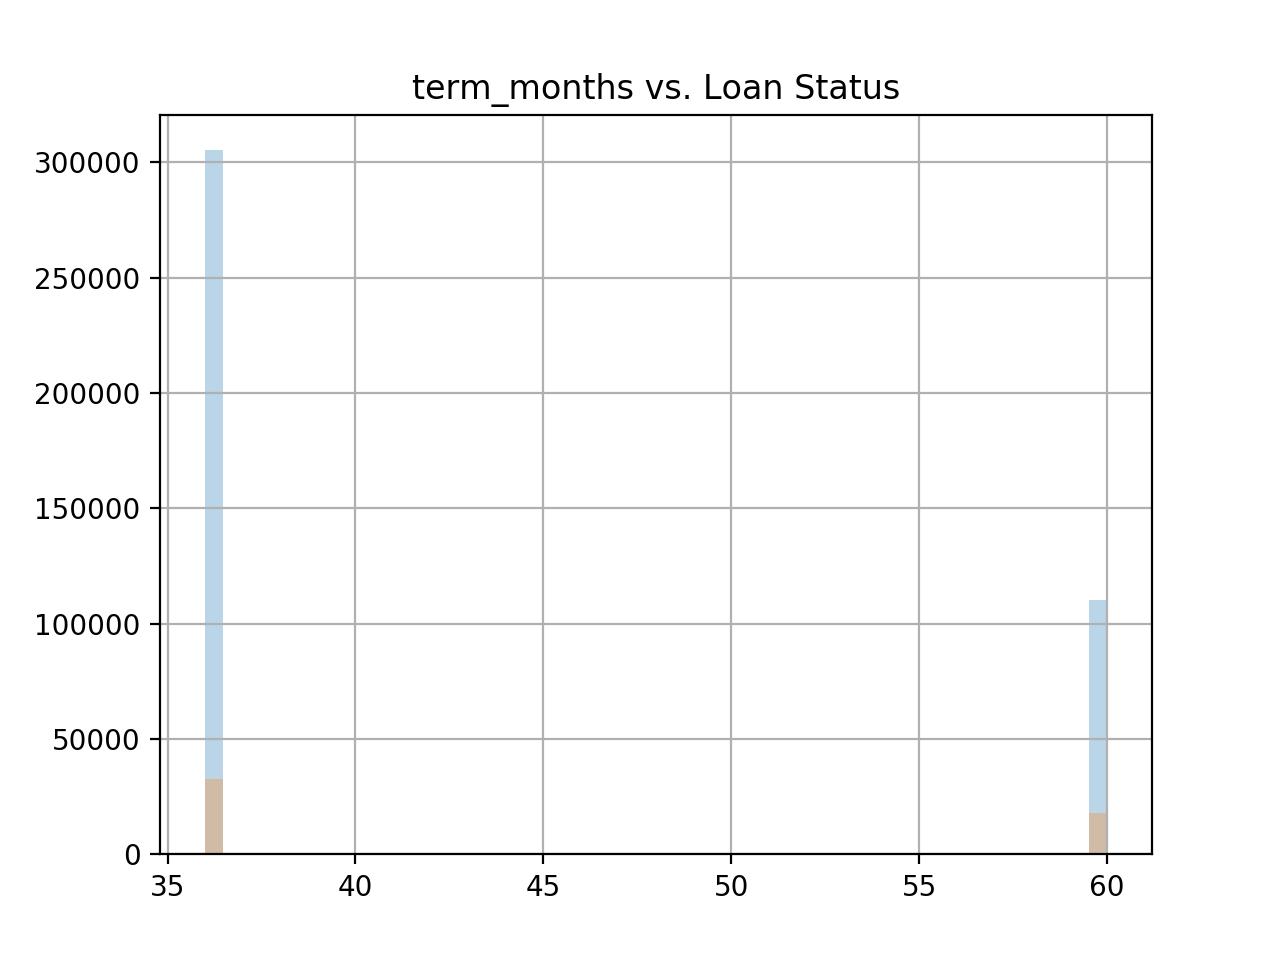

<IPython.core.display.Javascript object>


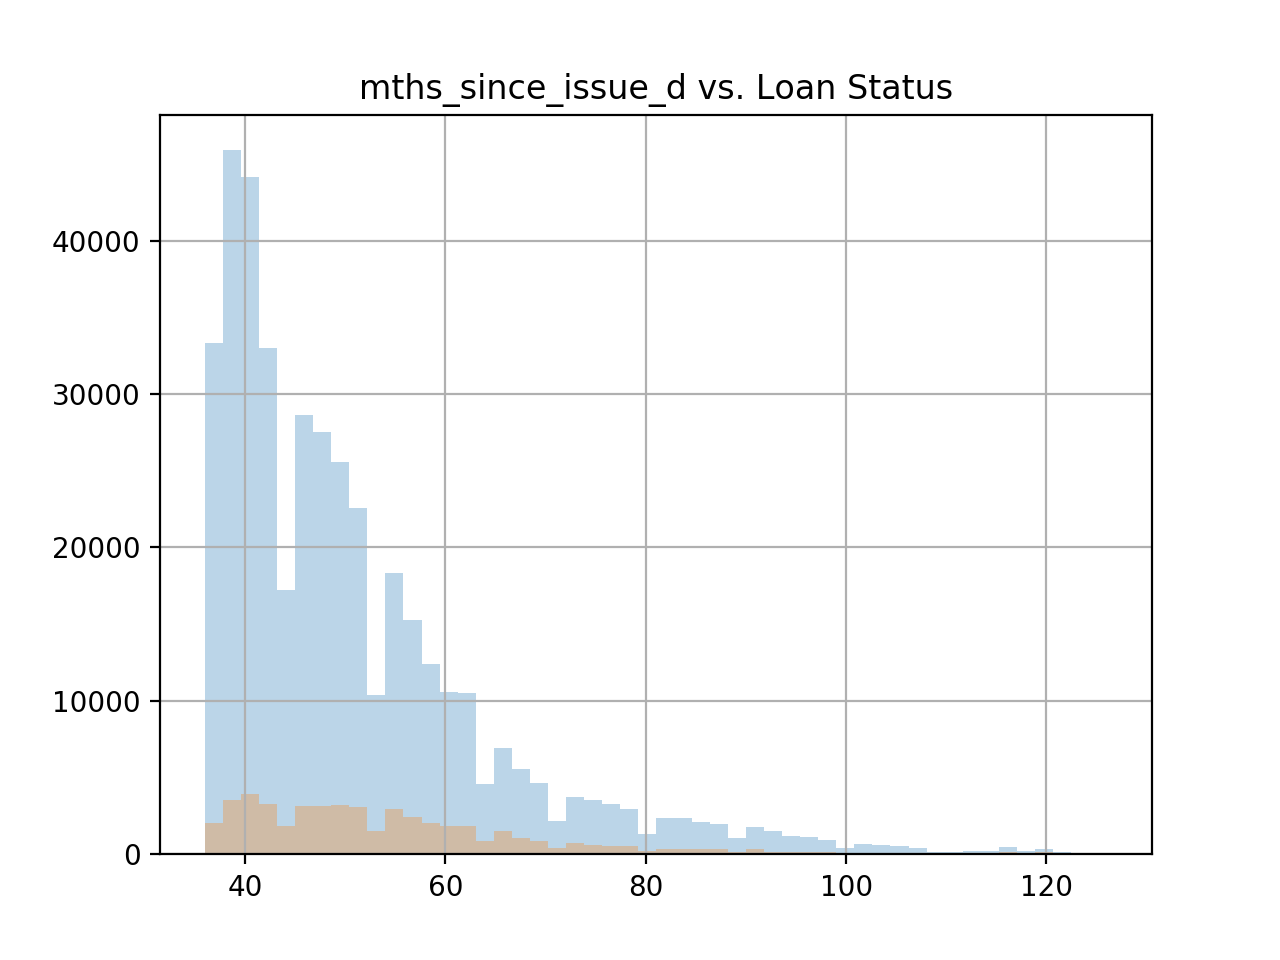

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


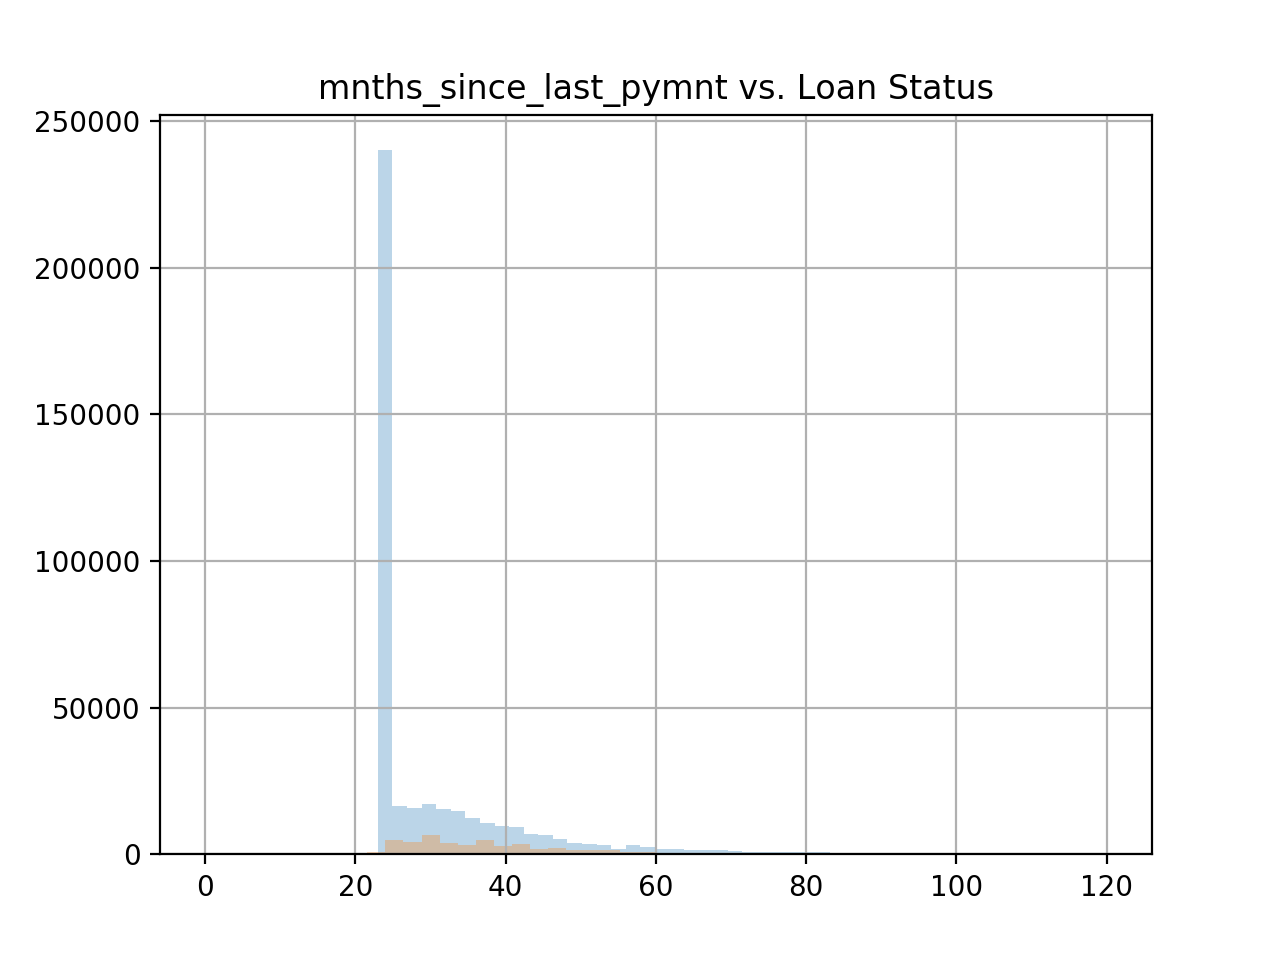

<IPython.core.display.Javascript object>


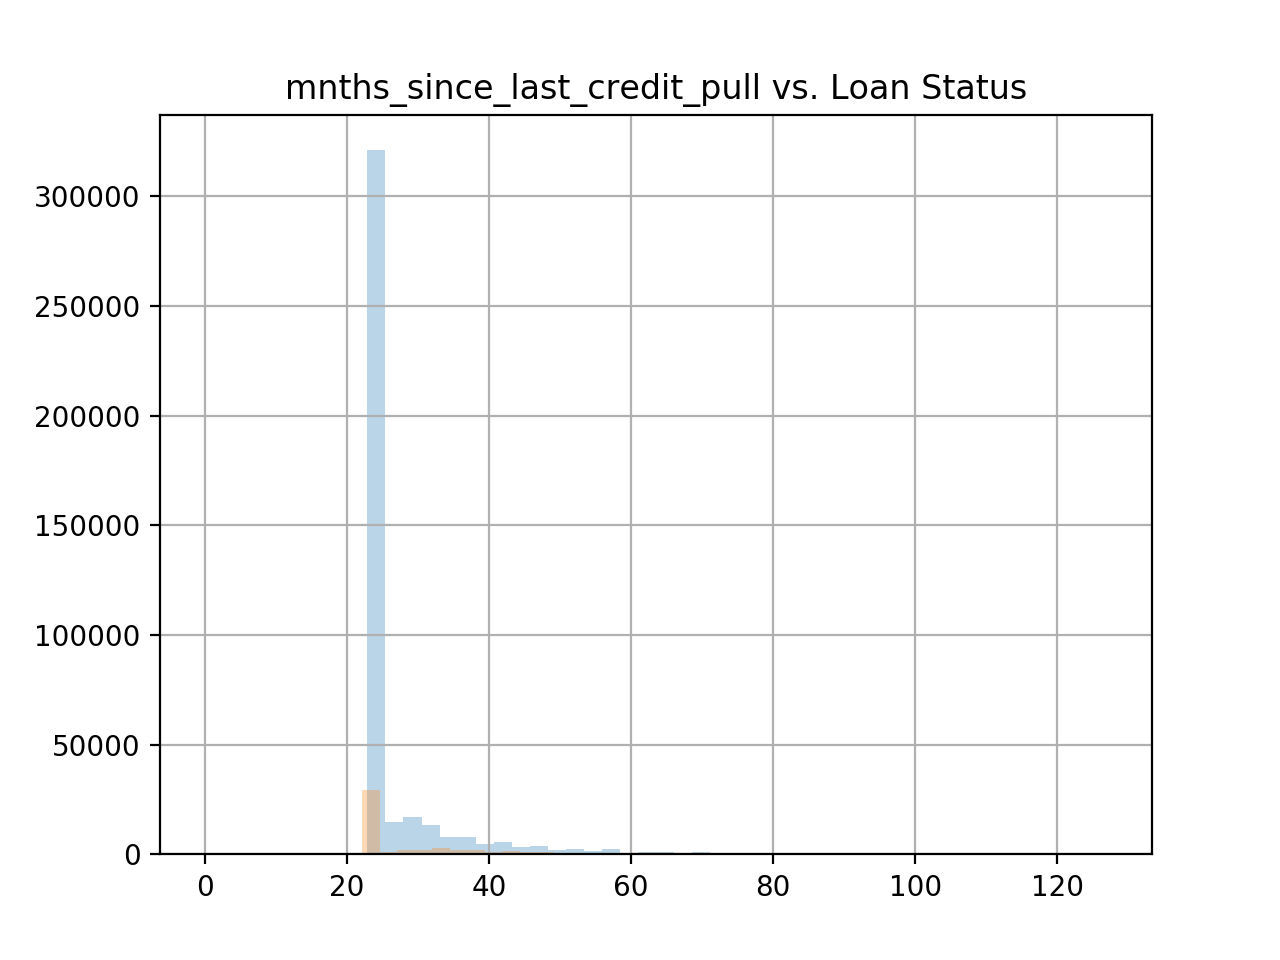

In [70]:
for col in non_str_cols:
    title = col + str(' vs. Loan Status')
    plot_cont_loan_status(loan_data, col, title)

In [71]:
loan_data.loc[loan_data.collection_recovery_fee.isna(), 'loan_status_int'].value_counts()

Series([], Name: loan_status_int, dtype: int64)

In [72]:
loan_data.collection_recovery_fee.describe()

count    466285.000000
mean          8.961534
std          85.491437
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        7002.190000
Name: collection_recovery_fee, dtype: float64

In [73]:
loan_data.policy_code.value_counts(dropna=False)

1    466285
Name: policy_code, dtype: int64

In [74]:
# interest rate and loan grade
fig, ax = plt.subplots()
loan_data.boxplot(column='int_rate', by='grade', ax=ax)
plt.show()

/Users/ankurmanikandan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>

In [75]:
loan_data.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_ba

/Users/ankurmanikandan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


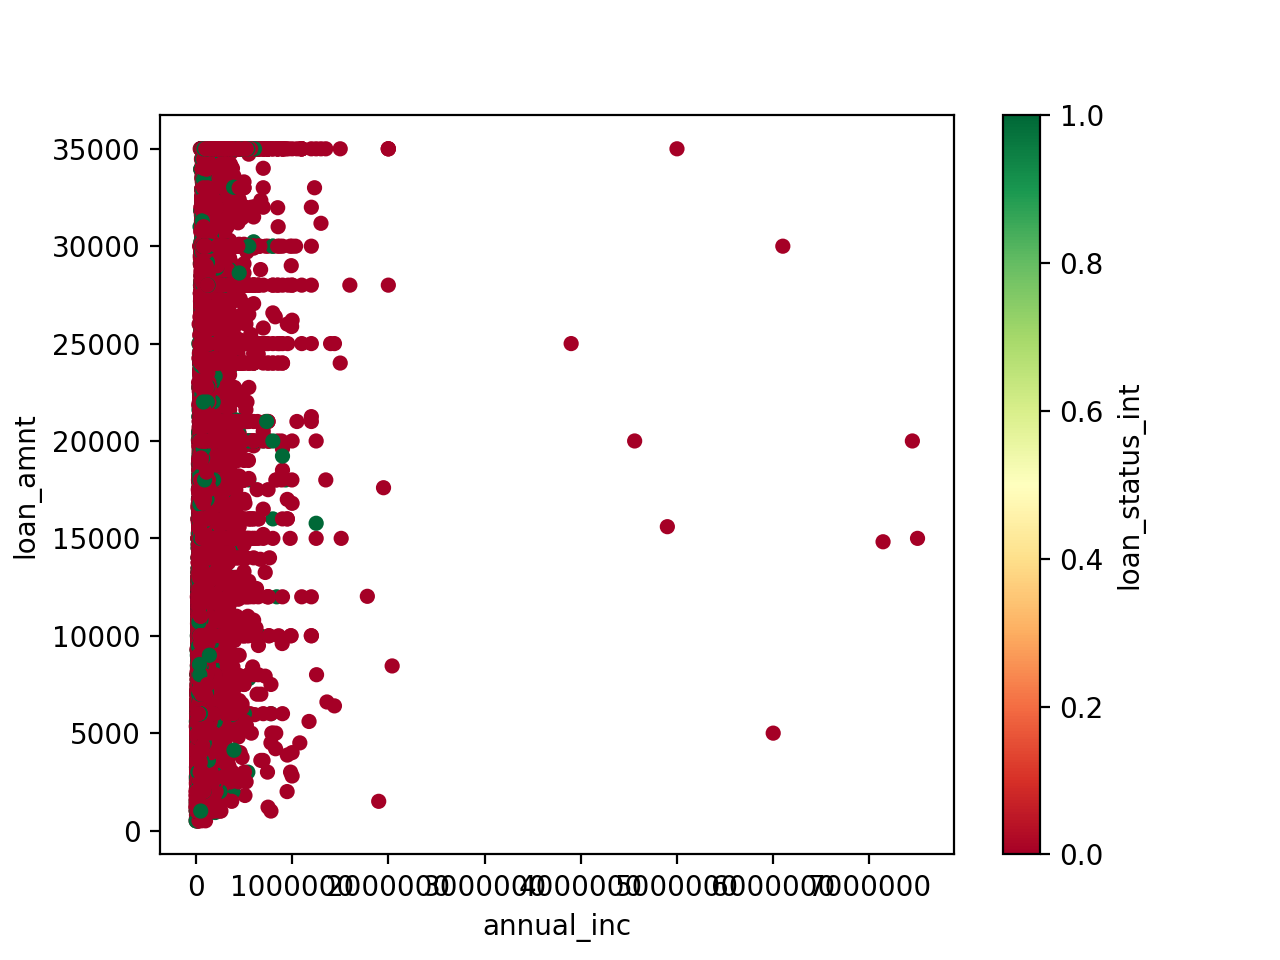

In [76]:
# Plot the annual income, loan amount and interest rate in a single plot
fig, ax = plt.subplots()
loan_data.plot.scatter(x='annual_inc', y='loan_amnt', c='loan_status_int', ax=ax, cmap='RdYlGn')
plt.show()

/Users/ankurmanikandan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


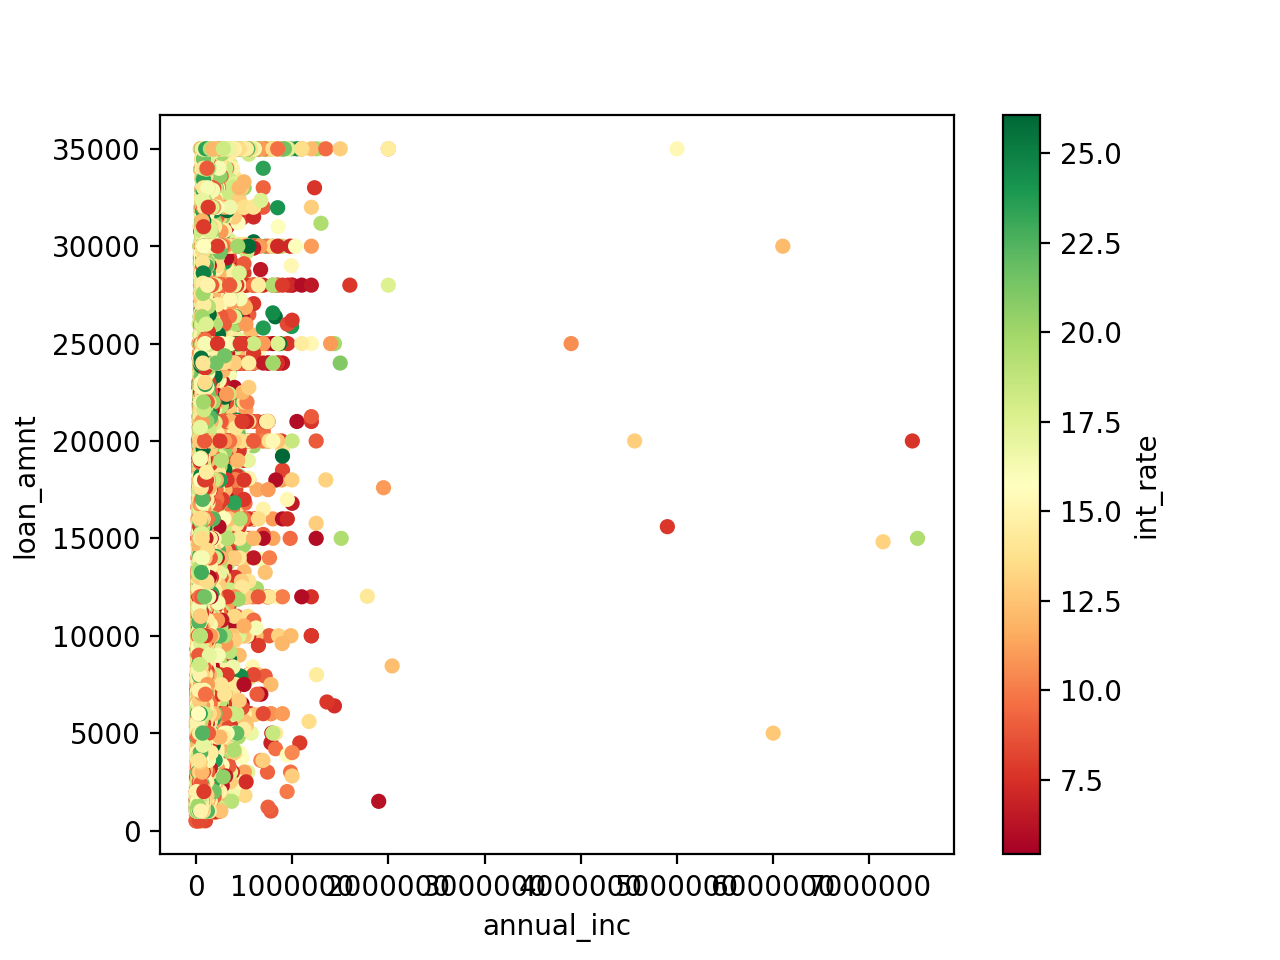

In [77]:
# Annual income, loan amount and interest rate
fig, ax = plt.subplots()
loan_data.plot.scatter(x='annual_inc', y='loan_amnt', c='int_rate', cmap='RdYlGn', ax=ax)
plt.show()

/Users/ankurmanikandan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


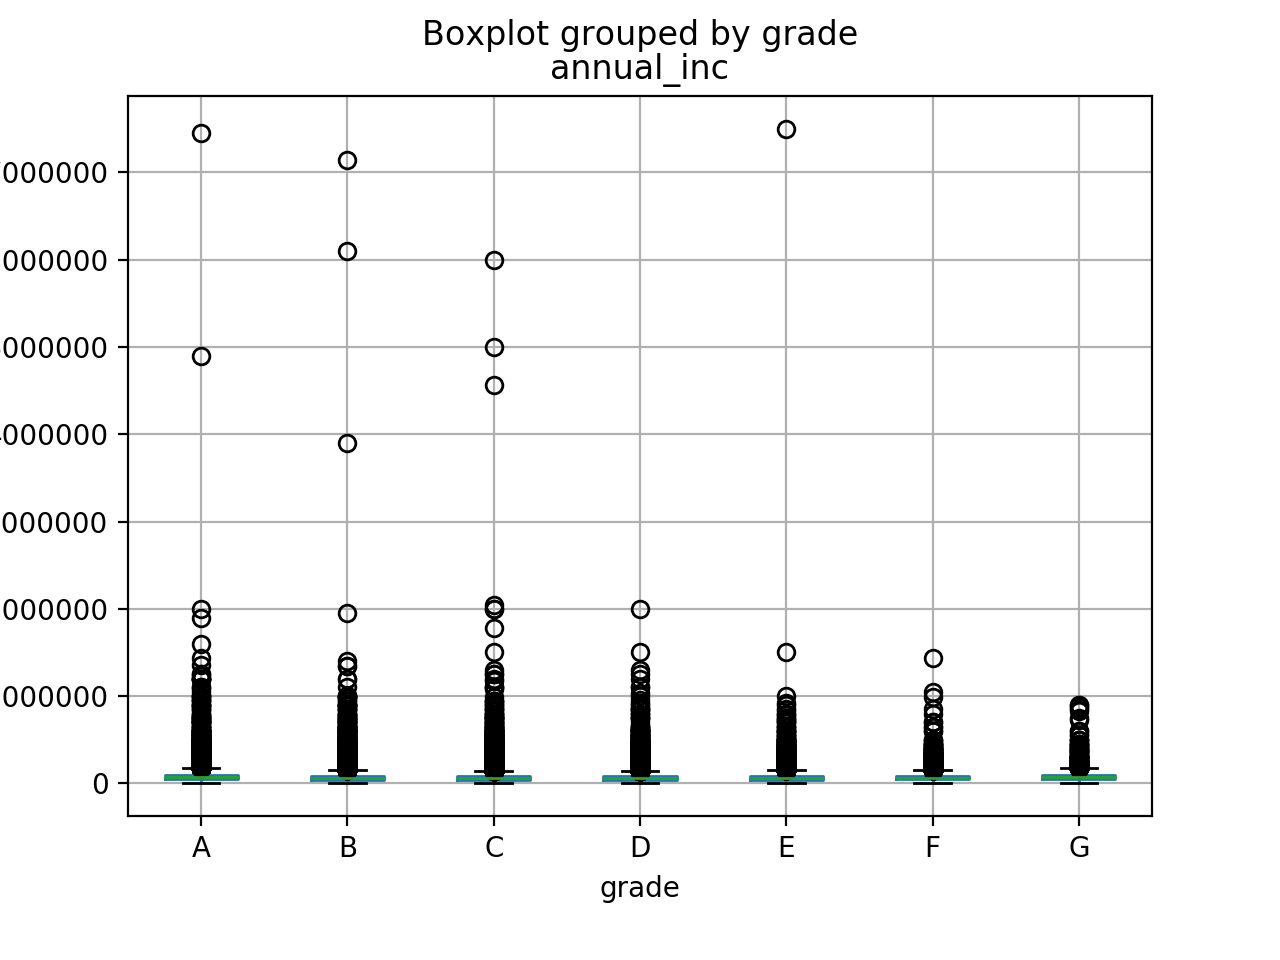

In [78]:
# Annual income and loan grade
fig, ax = plt.subplots()
loan_data.boxplot(column='annual_inc', by='grade', ax=ax)
plt.show()

In [222]:
loan_data.groupby(['grade', 'loan_status_int'])['annual_inc', 'loan_amnt'].describe()

/Users/ankurmanikandan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


annual_inc                                      \
                           count          mean           std     min   
grade loan_status_int                                                  
A     0                  71970.0  83264.163017  64239.768181  3300.0   
      1                   2897.0  67561.592054  38742.560220  6000.0   
B     0                 126170.0  73040.260447  54627.776744  4800.0   
      1                  10759.0  63675.745411  40094.764747  2000.0   
C     0                 110909.0  71253.523854  54445.833222  4000.0   
      1                  14384.0  63143.778140  41382.446338  4800.0   
D     0                  65040.0  70758.831467  47522.313842  4000.0   
      1                  11848.0  64179.295047  39377.550271  6000.0   
E     0                  28793.0  74328.597067  65651.981420  3000.0   
      1                   6964.0  69351.350902  42725.576972  7600.0   
F     0                  10037.0  76555.014924  51386.891646  7000.0   
      1                   3192.0  71360.196087  40453.322876  4800.0   
G     0                   2398.0  87832.935701  66458.668178  1896.0   
      1                    924.0  82080.278820  59549.024991  9936.0   

                                                                loan_amnt  \
                            25%      50%         75%        max     count   
grade loan_status_int                                                       
A     0                50845.53  72000.0  100000.000  7446395.0   71970.0   
      1                40800.00  59928.0   85000.000   450000.0    2897.0   
B     0                45000.00  63000.0   88000.000  7141778.0  126170.0   
      1                40000.00  55000.0   75204.500   800000.0   10759.0   
C     0                44353.00  60000.0   85000.000  6000000.0  110909.0   
      1                40000.00  55000.0   75000.000  1250000.0   14384.0   
D     0                43698.72  60000.0   85000.000  2000000.0   65040.0   
      1                40000.00  55000.0   76800.000   840000.0   11848.0   
E     0                45000.00  63892.0   90000.000  7500000.0   28793.0   
      1                45000.00  60000.0   81344.205   800000.0    6964.0   
F     0                48000.00  67000.0   90000.000  1440000.0   10037.0   
      1                47000.00  63650.0   85000.000   650000.0    3192.0   
G     0                53000.00  73536.0  100000.000   900000.0    2398.0   
      1                52000.00  70000.0   95000.000   900000.0     924.0   

                                                                            \
                               mean          std     min      25%      50%   
grade loan_status_int                                                        
A     0                13449.185772  7304.683068   500.0   7800.0  12000.0   
      1                12161.520538  7104.133807  1000.0   6575.0  10000.0   
B     0                13167.511294  7380.825503   500.0   7850.0  12000.0   
      1                12563.370202  7004.016998   500.0   7500.0  10850.0   
C     0                14263.867675  8412.618205   500.0   8000.0  12000.0   
      1                13686.239919  7858.591073   900.0   8000.0  12000.0   
D     0                15134.173201  9044.121667   500.0   8000.0  13500.0   
      1                14666.521776  8514.248591   700.0   8000.0  12950.0   
E     0                17499.257632  9575.348958   600.0  10000.0  16400.0   
      1                17679.200172  9235.908067   800.0  10150.0  16950.0   
F     0                18229.956660  9578.171825  1000.0  11000.0  18000.0   
      1                19072.932331  8990.443107  1000.0  12050.0  19075.0   
G     0                20654.045038  8792.652988   700.0  14025.0  20000.0   
      1                20498.538961  8740.294991   600.0  13475.0  20000.0   

                                          
                            75%      max  
grade loan_status_int                     
A     0                19200.00

/Users/ankurmanikandan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


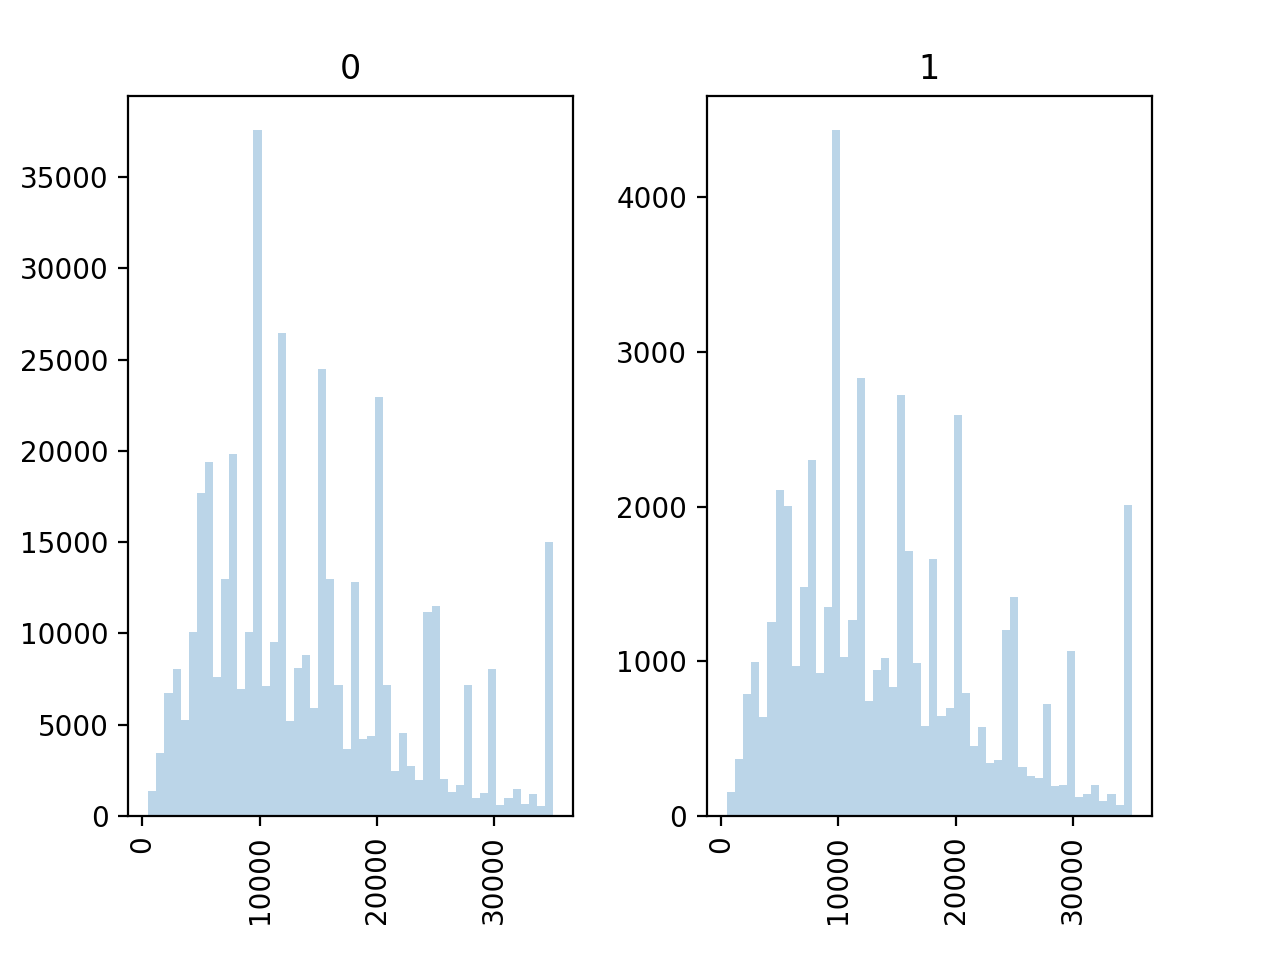

In [84]:
fig, ax = plt.subplots()
loan_data.hist(column='loan_amnt', by='loan_status_int', ax=ax, bins=50, alpha=0.3)
plt.show()

# Create a function to determine the Weight of Evidence (WoE)

In [121]:
def woe(col_name):
    
    woe_df = loan_data.groupby(col_name, as_index=False)['loan_status_int'].count()
    woe_df['n_default'] = loan_data.groupby(col_name, as_index=False)['loan_status_int'].sum()['loan_status_int'].values
    woe_df['n_nondefault'] = woe_df.loan_status_int - woe_df.n_default
    woe_df['prop_default'] = woe_df.n_default / woe_df.n_default.sum()
    woe_df['prop_nondefault'] = woe_df.n_nondefault / woe_df.n_nondefault.sum()
    woe_df['woe'] = np.log(woe_df.prop_nondefault / woe_df.prop_default)
    woe_df.sort_values(by='woe', inplace=True)
    
    display(woe_df)
    
    fig, ax = plt.subplots()
    woe_df.plot(x=col_name, y='woe', style='--o', ax=ax)
    plt.show()

In [116]:
woe_df = loan_data.groupby('grade', as_index=False)['loan_status_int'].count()
woe_df

grade  loan_status_int
0     A            74867
1     B           136929
2     C           125293
3     D            76888
4     E            35757
5     F            13229
6     G             3322

In [97]:
woe_df['n_default'] = loan_data.groupby('grade', as_index=False)['loan_status_int'].sum()['loan_status_int'].values
woe_df['n_nondefault'] = woe_df.loan_status_int - woe_df.n_default
woe_df

grade  loan_status_int  n_nondefault  n_default
0     A            74867         71970       2897
1     B           136929        126170      10759
2     C           125293        110909      14384
3     D            76888         65040      11848
4     E            35757         28793       6964
5     F            13229         10037       3192
6     G             3322          2398        924

In [98]:
woe_df['prop_default'] = woe_df.n_default / woe_df.n_default.sum()
woe_df['prop_nondefault'] = woe_df.n_nondefault / woe_df.n_nondefault.sum()
woe_df

grade  loan_status_int  n_nondefault  n_default  prop_default  \
0     A            74867         71970       2897      0.056840   
1     B           136929        126170      10759      0.211093   
2     C           125293        110909      14384      0.282216   
3     D            76888         65040      11848      0.232460   
4     E            35757         28793       6964      0.136635   
5     F            13229         10037       3192      0.062628   
6     G             3322          2398        924      0.018129   

   prop_nondefault  
0         0.173289  
1         0.303792  
2         0.267047  
3         0.156603  
4         0.069328  
5         0.024167  
6         0.005774

In [100]:
woe_df['woe'] = np.log(woe_df.prop_nondefault / woe_df.prop_default)
woe_df

grade  loan_status_int  n_nondefault  n_default  prop_default  \
0     A            74867         71970       2897      0.056840   
1     B           136929        126170      10759      0.211093   
2     C           125293        110909      14384      0.282216   
3     D            76888         65040      11848      0.232460   
4     E            35757         28793       6964      0.136635   
5     F            13229         10037       3192      0.062628   
6     G             3322          2398        924      0.018129   

   prop_nondefault       woe  
0         0.173289  1.114730  
1         0.303792  0.364043  
2         0.267047 -0.055251  
3         0.156603 -0.395001  
4         0.069328 -0.678466  
5         0.024167 -0.952214  
6         0.005774 -1.144166

In [101]:
woe_df.sort_values(by='woe', inplace=True)
woe_df

grade  loan_status_int  n_nondefault  n_default  prop_default  \
6     G             3322          2398        924      0.018129   
5     F            13229         10037       3192      0.062628   
4     E            35757         28793       6964      0.136635   
3     D            76888         65040      11848      0.232460   
2     C           125293        110909      14384      0.282216   
1     B           136929        126170      10759      0.211093   
0     A            74867         71970       2897      0.056840   

   prop_nondefault       woe  
6         0.005774 -1.144166  
5         0.024167 -0.952214  
4         0.069328 -0.678466  
3         0.156603 -0.395001  
2         0.267047 -0.055251  
1         0.303792  0.364043  
0         0.173289  1.114730

In [110]:
woe('grade')

grade  loan_status_int  n_default  n_nondefault  prop_default  \
6     G             3322        924          2398      0.018129   
5     F            13229       3192         10037      0.062628   
4     E            35757       6964         28793      0.136635   
3     D            76888      11848         65040      0.232460   
2     C           125293      14384        110909      0.282216   
1     B           136929      10759        126170      0.211093   
0     A            74867       2897         71970      0.056840   

   prop_nondefault       woe  
6         0.005774 -1.144166  
5         0.024167 -0.952214  
4         0.069328 -0.678466  
3         0.156603 -0.395001  
2         0.267047 -0.055251  
1         0.303792  0.364043  
0         0.173289  1.114730

## Create a function to plot the WoE

<IPython.core.display.Javascript object>


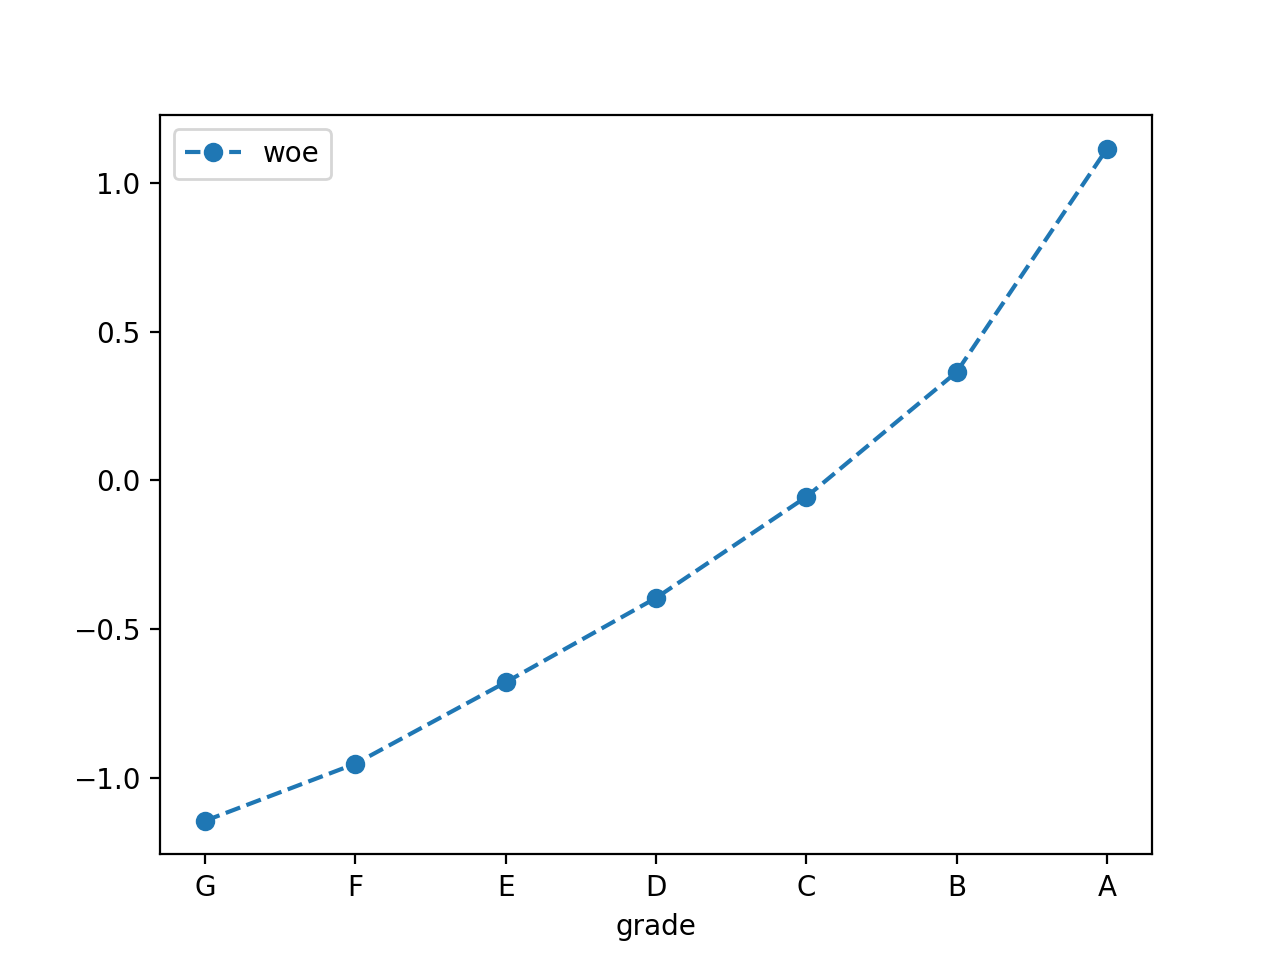

In [114]:
fig, ax = plt.subplots()
woe_df.plot(x='grade', y='woe', style='--o', ax=ax)
plt.show()

<IPython.core.display.Javascript object>


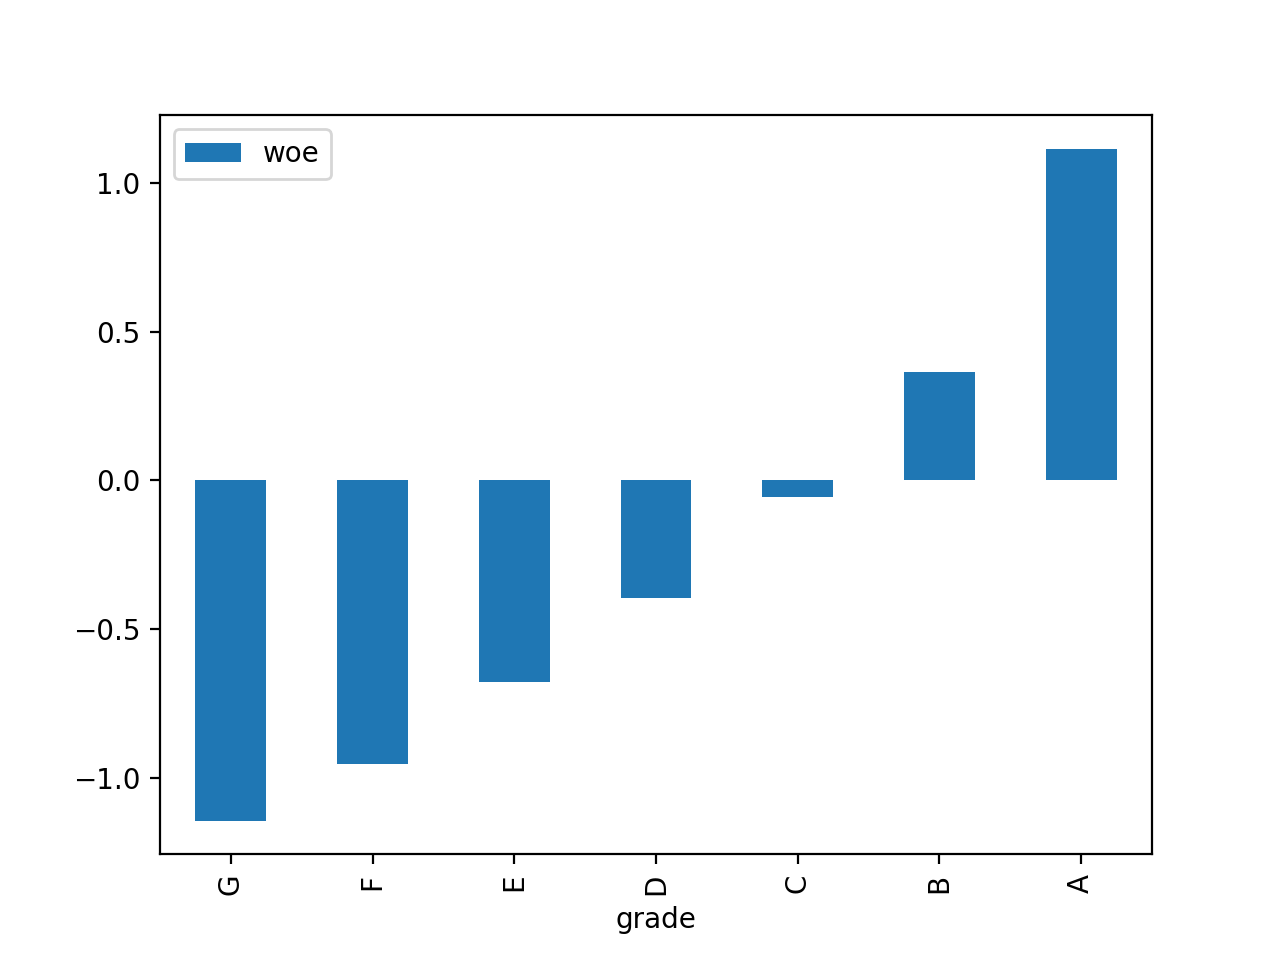

In [112]:
fig, ax = plt.subplots()
woe_df.plot.bar(x='grade', y='woe', ax=ax)
plt.show()

grade  loan_status_int  n_default  n_nondefault  prop_default  \
6     G             3322        924          2398      0.018129   
5     F            13229       3192         10037      0.062628   
4     E            35757       6964         28793      0.136635   
3     D            76888      11848         65040      0.232460   
2     C           125293      14384        110909      0.282216   
1     B           136929      10759        126170      0.211093   
0     A            74867       2897         71970      0.056840   

   prop_nondefault       woe  
6         0.005774 -1.144166  
5         0.024167 -0.952214  
4         0.069328 -0.678466  
3         0.156603 -0.395001  
2         0.267047 -0.055251  
1         0.303792  0.364043  
0         0.173289  1.114730

<IPython.core.display.Javascript object>


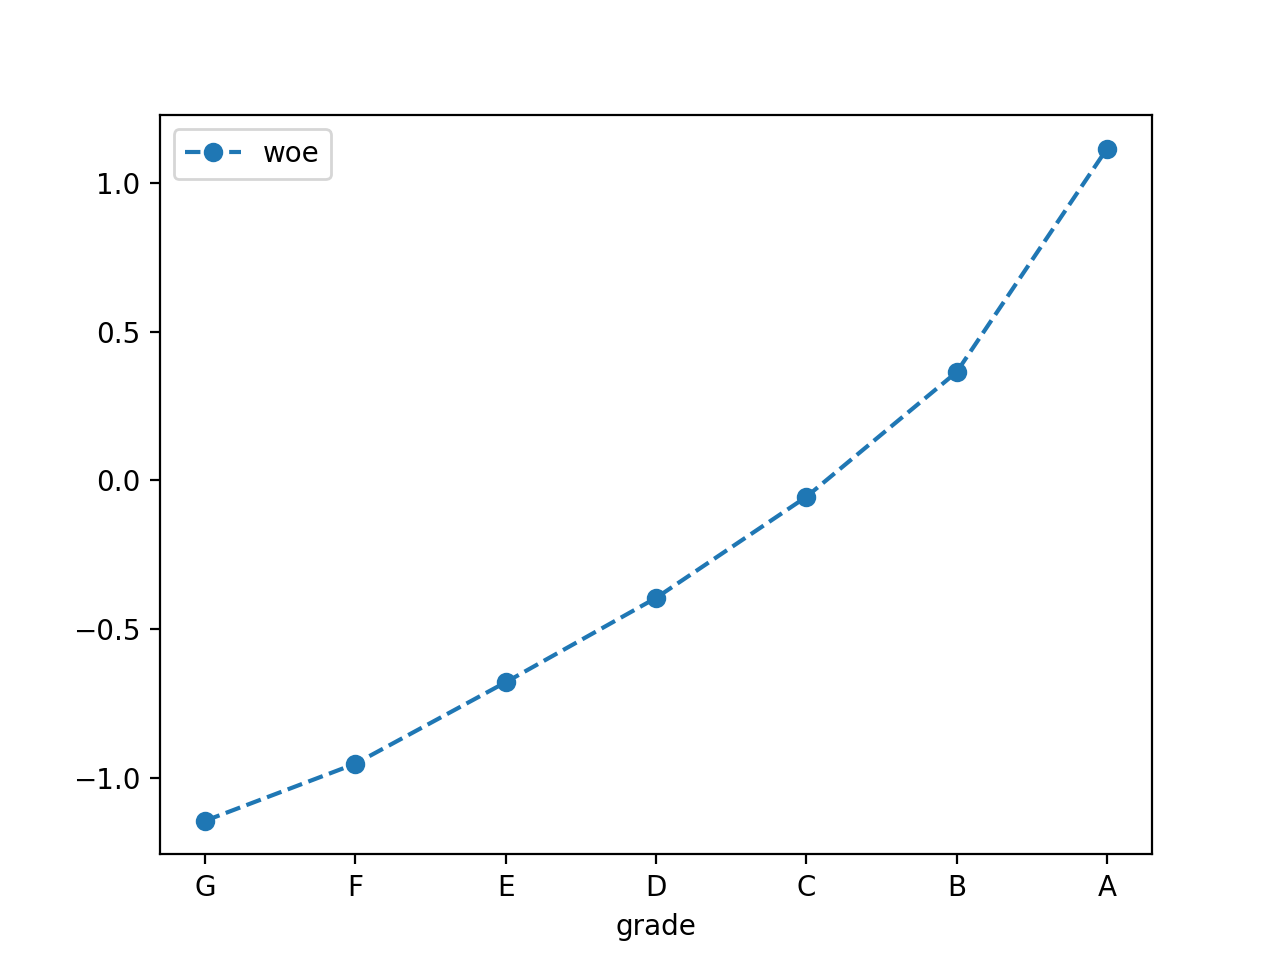

In [122]:
woe('grade')

# Create a dataframe with columns of type 'object'

In [124]:
# get the column names
col_nm_type_object = loan_data.select_dtypes(include='object').columns.values
col_nm_type_object

array(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'initial_list_status',
       'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d',
       'application_type'], dtype=object)

In [132]:
# Create a new dataframe with 'object' data types
loan_data_object = loan_data[col_nm_type_object].copy()
loan_data_object.head()

term grade sub_grade                 emp_title emp_length  \
0   36 months     B        B2                       NaN  10+ years   
1   60 months     C        C4                     Ryder   < 1 year   
2   36 months     C        C5                       NaN  10+ years   
3   36 months     C        C1       AIR RESOURCES BOARD  10+ years   
4   60 months     B        B5  University Medical Group     1 year   

  home_ownership verification_status issue_d  loan_status pymnt_plan  \
0           RENT            Verified  Dec-11   Fully Paid          n   
1           RENT     Source Verified  Dec-11  Charged Off          n   
2           RENT        Not Verified  Dec-11   Fully Paid          n   
3           RENT     Source Verified  Dec-11   Fully Paid          n   
4           RENT     Source Verified  Dec-11      Current          n   

                                                 url  \
0  https://www.lendingclub.com/browse/loanDetail....   
1  https://www.lendingclub.com/browse/loanDetail....   
2  https://www.lendingclub.com/browse/loanDetail....   
3  https://www.lendingclub.com/browse/loanDetail....   
4  https://www.lendingclub.com/browse/loanDetail....   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state earliest_cr_line  \
0              Computer    860xx         AZ           Jan-85   
1                  bike    309xx         GA           Apr-99   
2  real estate business    606xx         IL           Nov-01   
3              personel    917xx         CA           Feb-96   
4              Personal    972xx         OR           Jan-96   

  initial_list_status last_pymnt_d next_pymnt_d last_credit_pull_d  \
0                   f       Jan-15          NaN             Jan-16   
1                   f       Apr-13          NaN             Sep-13   
2                   f       Jun-14          NaN             Jan-16   
3                   f       Jan-15          NaN             Jan-15   
4                   f       Jan-16       Feb-16             Jan-16   

  application_type  
0       INDIVIDUAL  
1       INDIVIDUAL  
2       INDIVIDUAL  
3       INDIVIDUAL  
4       INDIVIDUAL

In [129]:
# Let us investigate each of these columns
for col in col_nm_type_object:
    print(col)
    print("\nDescribe:\n")
    print(loan_data_object[col].describe())
    print("\nUnique values:\n")
    print(loan_data_object[col].value_counts(dropna=False))
#     plot_cat_loan_status(loan_data, col)

term

Describe:

count         466285
unique             2
top        36 months
freq          337953
Name: term, dtype: object

Unique values:

 36 months    337953
 60 months    128332
Name: term, dtype: int64
grade

Describe:

count     466285
unique         7
top            B
freq      136929
Name: grade, dtype: object

Unique values:

B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: grade, dtype: int64
sub_grade

Describe:

count     466285
unique        35
top           B3
freq       31686
Name: sub_grade, dtype: object

Unique values:

B3    31686
B4    30505
C1    26953
C2    26740
B2    26610
C3    25317
B5    25252
C4    24105
B1    22876
C5    22178
A5    21757
D1    19261
A4    19045
D2    17046
D3    14916
D4    14099
A3    12568
D5    11566
A2    10956
A1    10541
E1     9033
E2     8669
E3     6976
E4     5992
E5     5087
F1     3940
F2     3001
F3     2708
F4     2067
F5     1513
G1     1109
G2      823
G3      583
G4      422
G5 

count                 466265
unique                 63099
top       Debt consolidation
freq                  164075
Name: title, dtype: object

Unique values:

Debt consolidation         164075
Credit card refinancing     62275
Debt Consolidation          15760
Home improvement            14849
Other                       12713
                            ...  
Payoff my Credit Cards          1
Clean up my bills               1
Defeat that debt                1
Holly Loan                      1
Bills / Vacation                1
Name: title, Length: 63100, dtype: int64
zip_code

Describe:

count     466285
unique       888
top        945xx
freq        5304
Name: zip_code, dtype: object

Unique values:

945xx    5304
112xx    5102
750xx    5013
606xx    4696
100xx    4391
         ... 
587xx       1
511xx       1
340xx       1
516xx       1
965xx       1
Name: zip_code, Length: 888, dtype: int64
addr_state

Describe:

count     466285
unique        50
top           CA
freq       71450
Na

In [133]:
obj_cols_remv = ['emp_title', 'pymnt_plan', 'url', 'desc', 'title', 'zip_code',
                'next_pymnt_d', 'application_type', 'loan_status']
loan_data_object.drop(columns=obj_cols_remv, inplace=True)
loan_data_object.head(10)

term grade sub_grade emp_length home_ownership verification_status  \
0   36 months     B        B2  10+ years           RENT            Verified   
1   60 months     C        C4   < 1 year           RENT     Source Verified   
2   36 months     C        C5  10+ years           RENT        Not Verified   
3   36 months     C        C1  10+ years           RENT     Source Verified   
4   60 months     B        B5     1 year           RENT     Source Verified   
5   36 months     A        A4    3 years           RENT     Source Verified   
6   60 months     C        C5    8 years           RENT        Not Verified   
7   36 months     E        E1    9 years           RENT     Source Verified   
8   60 months     F        F2    4 years            OWN     Source Verified   
9   60 months     B        B5   < 1 year           RENT            Verified   

  issue_d             purpose addr_state earliest_cr_line initial_list_status  \
0  Dec-11         credit_card         AZ           Jan-85                   f   
1  Dec-11                 car         GA           Apr-99                   f   
2  Dec-11      small_business         IL           Nov-01                   f   
3  Dec-11               other         CA           Feb-96                   f   
4  Dec-11               other         OR           Jan-96                   f   
5  Dec-11             wedding         AZ           Nov-04                   f   
6  Dec-11  debt_consolidation         NC           Jul-05                   f   
7  Dec-11                 car         CA           Jan-07                   f   
8  Dec-11      small_business         CA           Apr-04                   f   
9  Dec-11               other         TX           Sep-04                   f   

  last_pymnt_d last_credit_pull_d  
0       Jan-15             Jan-16  
1       Apr-13             Sep-13  
2       Jun-14             Jan-16  
3       Jan-15             Jan-15  
4       Jan-16             Jan-16  
5       Jan-15             Sep-15  
6       Jan-16             Jan-16  
7       Jan-15             Dec-14  
8       Apr-12             Aug-12  
9       Nov-12             Mar-13

In [134]:
loan_data_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   term                 466285 non-null  object
 1   grade                466285 non-null  object
 2   sub_grade            466285 non-null  object
 3   emp_length           445277 non-null  object
 4   home_ownership       466285 non-null  object
 5   verification_status  466285 non-null  object
 6   issue_d              466285 non-null  object
 7   purpose              466285 non-null  object
 8   addr_state           466285 non-null  object
 9   earliest_cr_line     466256 non-null  object
 10  initial_list_status  466285 non-null  object
 11  last_pymnt_d         465909 non-null  object
 12  last_credit_pull_d   466243 non-null  object
dtypes: object(13)
memory usage: 46.2+ MB


# Extract features from the 'object' type columns

In [138]:
# Employment length
loan_data_object.emp_length.value_counts(dropna=False)

10+ years    150049
2 years       41373
3 years       36596
< 1 year      36265
5 years       30774
1 year        29622
4 years       28023
7 years       26180
6 years       26112
8 years       22395
NaN           21008
9 years       17888
Name: emp_length, dtype: int64

In [139]:
loan_data[loan_data.emp_length.isna()]

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  \
168            168  1067644    1302032       2500         2500   
323            323  1058717    1290516      18000        18000   
394            394  1064582    1298394       4000         4000   
422            422  1064366    1298164       1000         1000   
439            439  1063912    1296491       8250         8250   
...            ...      ...        ...        ...          ...   
466254      466254  9856168   11708132       6000         6000   
466256      466256  9835883    9309502      15000        15000   
466262      466262  9825193   11677266      14000        14000   
466265      466265  9774870   11626983      32000        32000   
466273      466273  9199716   11061625       6000         6000   

        funded_amnt_inv        term  int_rate  installment grade sub_grade  \
168              2500.0   36 months      7.51        77.78     A        A3   
323             18000.0   60 months     17.58       452.98     D        D4   
394              4000.0   36 months     11.71       132.31     B        B3   
422              1000.0   36 months     14.65        34.50     C        C3   
439              8250.0   36 months      7.51       256.67     A        A3   
...                 ...         ...       ...          ...   ...       ...   
466254           6000.0   60 months     23.40       170.53     E        E5   
466256          15000.0   36 months     16.99       534.72     D        D1   
466262          14000.0   36 months     16.24       493.86     C        C5   
466265          31975.0   36 months      7.90      1001.29     A        A4   
466273           6000.0   36 months     10.99       196.41     B        B2   

       emp_title emp_length home_ownership  annual_inc verification_status  \
168          NaN        NaN            OWN     12000.0     Source Verified   
323          NaN        NaN       MORTGAGE     60000.0            Verified   
394          NaN        NaN           RENT     24000.0     Source Verified   
422          NaN        NaN           RENT     18408.0        Not Verified   
439          NaN        NaN       MORTGAGE     31500.0            Verified   
...          ...        ...            ...         ...                 ...   
466254       NaN        NaN       MORTGAGE     45600.0     Source Verified   
466256       NaN        NaN           RENT     50000.0     Source Verified   
466262       NaN        NaN       MORTGAGE     68000.0            Verified   
466265       NaN        NaN       MORTGAGE    128000.0     Source Verified   
466273       NaN        NaN       MORTGAGE     25000.0            Verified   

       issue_d  loan_status pymnt_plan  \
168     Dec-11  Charged Off          n   
323     Dec-11   Fully Paid          n   
394     Dec-11   Fully Paid          n   
422     Dec-11  Charged Off          n   
439     Dec-11   Fully Paid          n   
...        ...          ...        ...   
466254  Jan-14  Charged Off          n   
466256  Jan-14  Charged Off          n   
466262  Jan-14   Fully Paid          n   
466265  Jan-14   Fully Paid          n   
466273  Jan-14   Fully Paid          n   

                                                      url  \
168     https://www.lendingclub.com/browse/loanDetail....   
323     https://www.lendingclub.com/browse/loanDetail....   
394     https://www.lendingclub.com/browse/loanDetail....   
422     https://www.lendingclub.com/browse/loanDetail....   
439     https://www.lendingclub.com/browse/loanDetail....   
...                                                   ...   
466254  https://www.lendingclub.com/browse/loanDetail....   
466256  https://www.lendingclub.com/browse/loanDetail....   
466262  https://www.lendingclub.com/browse/loanDetail....   
466265  https://www.lendingclub.com/browse/loanDetail....   
466273  https://www.lendingclub.com/browse/loanDetail....   

                                                     desc             purpose  \
168       Borrower add

In [141]:
loan_data_object.emp_length.fillna('< 1 year', inplace=True)
loan_data_object.emp_length.value_counts(dropna=False)

10+ years    150049
< 1 year      57273
2 years       41373
3 years       36596
5 years       30774
1 year        29622
4 years       28023
7 years       26180
6 years       26112
8 years       22395
9 years       17888
Name: emp_length, dtype: int64

In [145]:
cols = ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose',
       'addr_state', 'initial_list_status']

In [142]:
# Create dummy values for the categorical variables
feat_obj = pd.get_dummies(loan_data_object[cols], columns=cols, prefix=cols, 
                          prefix_sep=':', drop_first=True)
feat_obj.head(10)

term: 60 months  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G  \
0                0        1        0        0        0        0        0   
1                1        0        1        0        0        0        0   
2                0        0        1        0        0        0        0   
3                0        0        1        0        0        0        0   
4                1        1        0        0        0        0        0   
5                0        0        0        0        0        0        0   
6                1        0        1        0        0        0        0   
7                0        0        0        0        1        0        0   
8                1        0        0        0        0        1        0   
9                1        1        0        0        0        0        0   

   sub_grade:A2  sub_grade:A3  sub_grade:A4  sub_grade:A5  sub_grade:B1  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   
5             0             0             1             0             0   
6             0             0             0             0             0   
7             0             0             0             0             0   
8             0             0             0             0             0   
9             0             0             0             0             0   

   sub_grade:B2  sub_grade:B3  sub_grade:B4  sub_grade:B5  sub_grade:C1  \
0             1             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             1   
4             0             0             0             1             0   
5             0             0             0             0             0   
6             0             0             0             0             0   
7             0             0             0             0             0   
8             0             0             0             0             0   
9             0             0             0             1             0   

   sub_grade:C2  sub_grade:C3  sub_grade:C4  sub_grade:C5  sub_grade:D1  \
0             0             0             0             0             0   
1             0             0             1             0             0   
2             0             0             0             1             0   
3             0             0             0             0             0   
4             0             0             0             0             0   
5             0             0             0             0             0   
6             0             0             0             1             0   
7             0             0             0             0             0   
8             0             0             0             0             0   
9             0             0             0             0             0   

   sub_grade:D2  sub_grade:D3  sub_grade:D4  sub_grade:D5  sub_grade:E1  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   
5             0             0             0             0             0   
6             0             0             0             0             0   
7             0             0             0             0             1   
8            

## Extract features from the remaining 'object' columns

In [146]:
# Get the list of columns
cols = loan_data_object.columns[~loan_data_object.columns.isin(cols)].values
cols

array(['issue_d', 'earliest_cr_line', 'last_pymnt_d',
       'last_credit_pull_d'], dtype=object)

In [147]:
loan_data_object.issue_d

0         Dec-11
1         Dec-11
2         Dec-11
3         Dec-11
4         Dec-11
           ...  
466280    Jan-14
466281    Jan-14
466282    Jan-14
466283    Jan-14
466284    Jan-14
Name: issue_d, Length: 466285, dtype: object

In [151]:
feat_obj['mnths_since_issue_d_int'] = round((pd.to_datetime('2017-12-01') \
                                             - pd.to_datetime(loan_data_object.issue_d, format='%b-%y'))\
                                            / np.timedelta64(1, 'M'))
print(feat_obj.mnths_since_issue_d_int.value_counts(dropna=False))
print("\nNumber of missing values: ", feat_obj.mnths_since_issue_d_int.isna().sum())
feat_obj

38.0     38782
41.0     29306
37.0     25054
43.0     19099
44.0     19071
         ...  
124.0       74
125.0       63
111.0       57
123.0       53
126.0       24
Name: mnths_since_issue_d_int, Length: 91, dtype: int64

Number of missing values:  0


term: 60 months  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G  \
0                     0        1        0        0        0        0        0   
1                     1        0        1        0        0        0        0   
2                     0        0        1        0        0        0        0   
3                     0        0        1        0        0        0        0   
4                     1        1        0        0        0        0        0   
...                 ...      ...      ...      ...      ...      ...      ...   
466280                1        0        1        0        0        0        0   
466281                1        0        0        1        0        0        0   
466282                1        0        0        1        0        0        0   
466283                0        0        0        0        0        0        0   
466284                0        0        0        1        0        0        0   

        sub_grade:A2  sub_grade:A3  sub_grade:A4  sub_grade:A5  sub_grade:B1  \
0                  0             0             0             0             0   
1                  0             0             0             0             0   
2                  0             0             0             0             0   
3                  0             0             0             0             0   
4                  0             0             0             0             0   
...              ...           ...           ...           ...           ...   
466280             0             0             0             0             0   
466281             0             0             0             0             0   
466282             0             0             0             0             0   
466283             0             0             1             0             0   
466284             0             0             0             0             0   

        sub_grade:B2  sub_grade:B3  sub_grade:B4  sub_grade:B5  sub_grade:C1  \
0                  1             0             0             0             0   
1                  0             0             0             0             0   
2                  0             0             0             0             0   
3                  0             0             0             0             1   
4                  0             0             0             1             0   
...              ...           ...           ...           ...           ...   
466280             0             0             0             0             0   
466281             0             0             0             0             0   
466282             0             0             0             0             0   
466283             0             0             0             0             0   
466284             0             0             0             0             0   

        sub_grade:C2  sub_grade:C3  sub_grade:C4  sub_grade:C5  sub_grade:D1  \
0                  0             0             0             0             0   
1                  0             0             1             0             0   
2                  0             0             0             1             0   
3                  0             0             0             0             0   
4                  0             0             0             0             0   
...              ...           ...           ...           ...           ...   
466280             1             0             0             0             0   
466281             0             0             0             0             0   
466282             0             0             0             0             1   
466283             0             0             0             0             0   
466284             0             0             0             0             0   

        sub_grade:D2  sub_grade:D3  sub_grade:D4  sub_grade:D5  sub_grade:E1  \
0                  0             0             0             0          

In [154]:
print(loan_data_object.earliest_cr_line)
print("\nMissing values: ", loan_data_object.earliest_cr_line.isna().sum())

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object

Missing values:  29


In [156]:
feat_obj['mnths_since_earliest_cr_line_int'] = round((pd.to_datetime('2017-12-01') \
                                             - pd.to_datetime(loan_data_object.earliest_cr_line, format='%b-%y'))\
                                            / np.timedelta64(1, 'M'))
print(feat_obj.mnths_since_earliest_cr_line_int.describe())
print("\nNumber of missing values: ", feat_obj.mnths_since_earliest_cr_line_int.isna().sum())
feat_obj

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mnths_since_earliest_cr_line_int, dtype: float64

Number of missing values:  29


term: 60 months  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G  \
0                     0        1        0        0        0        0        0   
1                     1        0        1        0        0        0        0   
2                     0        0        1        0        0        0        0   
3                     0        0        1        0        0        0        0   
4                     1        1        0        0        0        0        0   
...                 ...      ...      ...      ...      ...      ...      ...   
466280                1        0        1        0        0        0        0   
466281                1        0        0        1        0        0        0   
466282                1        0        0        1        0        0        0   
466283                0        0        0        0        0        0        0   
466284                0        0        0        1        0        0        0   

        sub_grade:A2  sub_grade:A3  sub_grade:A4  sub_grade:A5  sub_grade:B1  \
0                  0             0             0             0             0   
1                  0             0             0             0             0   
2                  0             0             0             0             0   
3                  0             0             0             0             0   
4                  0             0             0             0             0   
...              ...           ...           ...           ...           ...   
466280             0             0             0             0             0   
466281             0             0             0             0             0   
466282             0             0             0             0             0   
466283             0             0             1             0             0   
466284             0             0             0             0             0   

        sub_grade:B2  sub_grade:B3  sub_grade:B4  sub_grade:B5  sub_grade:C1  \
0                  1             0             0             0             0   
1                  0             0             0             0             0   
2                  0             0             0             0             0   
3                  0             0             0             0             1   
4                  0             0             0             1             0   
...              ...           ...           ...           ...           ...   
466280             0             0             0             0             0   
466281             0             0             0             0             0   
466282             0             0             0             0             0   
466283             0             0             0             0             0   
466284             0             0             0             0             0   

        sub_grade:C2  sub_grade:C3  sub_grade:C4  sub_grade:C5  sub_grade:D1  \
0                  0             0             0             0             0   
1                  0             0             1             0             0   
2                  0             0             0             1             0   
3                  0             0             0             0             0   
4                  0             0             0             0             0   
...              ...           ...           ...           ...           ...   
466280             1             0             0             0             0   
466281             0             0             0             0             0   
466282             0             0             0             0             1   
466283             0             0             0             0             0   
466284             0             0             0             0             0   

        sub_grade:D2  sub_grade:D3  sub_grade:D4  sub_grade:D5  sub_grade:E1  \
0                  0             0             0             0          

In [158]:
loan_data.loc[feat_obj.mnths_since_earliest_cr_line_int < 0, 'loan_status_int'].value_counts()

0    1021
1     148
Name: loan_status_int, dtype: int64

In [160]:
loan_data.loc[feat_obj.mnths_since_earliest_cr_line_int.isna(), 'loan_status_int'].value_counts()

0    26
1     3
Name: loan_status_int, dtype: int64

In [161]:
loan_data.annual_inc.describe()

count    4.662850e+05
mean     7.327713e+04
std      5.496340e+04
min      1.896000e+03
25%      4.500000e+04
50%      6.300000e+04
75%      8.895300e+04
max      7.500000e+06
Name: annual_inc, dtype: float64

In [164]:
bins = pd.interval_range(start=0, end=1e6, freq=1e5, closed='left')
a = pd.cut(loan_data.annual_inc, bins=bins)
a

0              [0.0, 100000.0)
1              [0.0, 100000.0)
2              [0.0, 100000.0)
3              [0.0, 100000.0)
4              [0.0, 100000.0)
                  ...         
466280    [100000.0, 200000.0)
466281         [0.0, 100000.0)
466282         [0.0, 100000.0)
466283         [0.0, 100000.0)
466284         [0.0, 100000.0)
Name: annual_inc, Length: 466285, dtype: category
Categories (10, interval[float64]): [[0.0, 100000.0) < [100000.0, 200000.0) < [200000.0, 300000.0) < [300000.0, 400000.0) ... [600000.0, 700000.0) < [700000.0, 800000.0) < [800000.0, 900000.0) < [900000.0, 1000000.0)]

In [165]:
a.isna().sum()

67

In [166]:
loan_data.loc[a.isna(), 'annual_inc']

7268      1782000.0
10650     1250000.0
21477     1200000.0
23618     1900000.0
24233     1200000.0
            ...    
411264    1100000.0
419286    1300000.0
444464    1400000.0
451987    7446395.0
461868    2000000.0
Name: annual_inc, Length: 67, dtype: float64

In [169]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 65 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    466285 non-null  int64  
 1   id                            466285 non-null  int64  
 2   member_id                     466285 non-null  int64  
 3   loan_amnt                     466285 non-null  int64  
 4   funded_amnt                   466285 non-null  int64  
 5   funded_amnt_inv               466285 non-null  float64
 6   term                          466285 non-null  object 
 7   int_rate                      466285 non-null  float64
 8   installment                   466285 non-null  float64
 9   grade                         466285 non-null  object 
 10  sub_grade                     466285 non-null  object 
 11  emp_title                     438697 non-null  object 
 12  emp_length                    445277 non-nul

# Train a Logistic Regression model

In [170]:
feat_obj.head(10)

term: 60 months  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G  \
0                0        1        0        0        0        0        0   
1                1        0        1        0        0        0        0   
2                0        0        1        0        0        0        0   
3                0        0        1        0        0        0        0   
4                1        1        0        0        0        0        0   
5                0        0        0        0        0        0        0   
6                1        0        1        0        0        0        0   
7                0        0        0        0        1        0        0   
8                1        0        0        0        0        1        0   
9                1        1        0        0        0        0        0   

   sub_grade:A2  sub_grade:A3  sub_grade:A4  sub_grade:A5  sub_grade:B1  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   
5             0             0             1             0             0   
6             0             0             0             0             0   
7             0             0             0             0             0   
8             0             0             0             0             0   
9             0             0             0             0             0   

   sub_grade:B2  sub_grade:B3  sub_grade:B4  sub_grade:B5  sub_grade:C1  \
0             1             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             1   
4             0             0             0             1             0   
5             0             0             0             0             0   
6             0             0             0             0             0   
7             0             0             0             0             0   
8             0             0             0             0             0   
9             0             0             0             1             0   

   sub_grade:C2  sub_grade:C3  sub_grade:C4  sub_grade:C5  sub_grade:D1  \
0             0             0             0             0             0   
1             0             0             1             0             0   
2             0             0             0             1             0   
3             0             0             0             0             0   
4             0             0             0             0             0   
5             0             0             0             0             0   
6             0             0             0             1             0   
7             0             0             0             0             0   
8             0             0             0             0             0   
9             0             0             0             0             0   

   sub_grade:D2  sub_grade:D3  sub_grade:D4  sub_grade:D5  sub_grade:E1  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   
5             0             0             0             0             0   
6             0             0             0             0             0   
7             0             0             0             0             1   
8            

In [171]:
feat_obj.loc[feat_obj.mnths_since_earliest_cr_line_int < 0, 'mnths_since_earliest_cr_line_int'] = \
    feat_obj.mnths_since_earliest_cr_line_int.max()
feat_obj.mnths_since_earliest_cr_line_int.describe()

count    466256.000000
mean        242.385374
std          86.460310
min          73.000000
25%         184.000000
50%         226.000000
75%         285.000000
max         587.000000
Name: mnths_since_earliest_cr_line_int, dtype: float64

In [174]:
# drop rows with missing values
feat_obj.dropna(inplace=True)
feat_obj.isna().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [175]:
feat_obj.head(10)

term: 60 months  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G  \
0                0        1        0        0        0        0        0   
1                1        0        1        0        0        0        0   
2                0        0        1        0        0        0        0   
3                0        0        1        0        0        0        0   
4                1        1        0        0        0        0        0   
5                0        0        0        0        0        0        0   
6                1        0        1        0        0        0        0   
7                0        0        0        0        1        0        0   
8                1        0        0        0        0        1        0   
9                1        1        0        0        0        0        0   

   sub_grade:A2  sub_grade:A3  sub_grade:A4  sub_grade:A5  sub_grade:B1  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   
5             0             0             1             0             0   
6             0             0             0             0             0   
7             0             0             0             0             0   
8             0             0             0             0             0   
9             0             0             0             0             0   

   sub_grade:B2  sub_grade:B3  sub_grade:B4  sub_grade:B5  sub_grade:C1  \
0             1             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             1   
4             0             0             0             1             0   
5             0             0             0             0             0   
6             0             0             0             0             0   
7             0             0             0             0             0   
8             0             0             0             0             0   
9             0             0             0             1             0   

   sub_grade:C2  sub_grade:C3  sub_grade:C4  sub_grade:C5  sub_grade:D1  \
0             0             0             0             0             0   
1             0             0             1             0             0   
2             0             0             0             1             0   
3             0             0             0             0             0   
4             0             0             0             0             0   
5             0             0             0             0             0   
6             0             0             0             1             0   
7             0             0             0             0             0   
8             0             0             0             0             0   
9             0             0             0             0             0   

   sub_grade:D2  sub_grade:D3  sub_grade:D4  sub_grade:D5  sub_grade:E1  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   
5             0             0             0             0             0   
6             0             0             0             0             0   
7             0             0             0             0             1   
8            

In [210]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, confusion_matrix, roc_auc_score

SEED = 42
np.random.seed(SEED)

In [185]:
x_train, x_test, y_train, y_test = train_test_split(feat_obj, 
                                                    loan_data.loc[~(loan_data.earliest_cr_line.isna()), 'loan_status_int'].values,
                                                    random_state=SEED, 
                                                    stratify=loan_data.loc[~(loan_data.earliest_cr_line.isna()), 'loan_status_int'].values,
                                                    test_size=0.2)

In [215]:
lr = LogisticRegression(n_jobs=-1, C=0.1, max_iter=200)
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
pred_probs = lr.predict_proba(x_test)

In [216]:
cfm = confusion_matrix(y_test, pred)
cfm

array([[83039,    20],
       [10185,     8]])

In [217]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([83059, 10193]))

In [218]:
fpr, tpr, thresholds = roc_curve(y_test, pred_probs[:, 1], drop_intermediate=False)

In [219]:
score = roc_auc_score(y_test, pred_probs[:, 1])

<IPython.core.display.Javascript object>


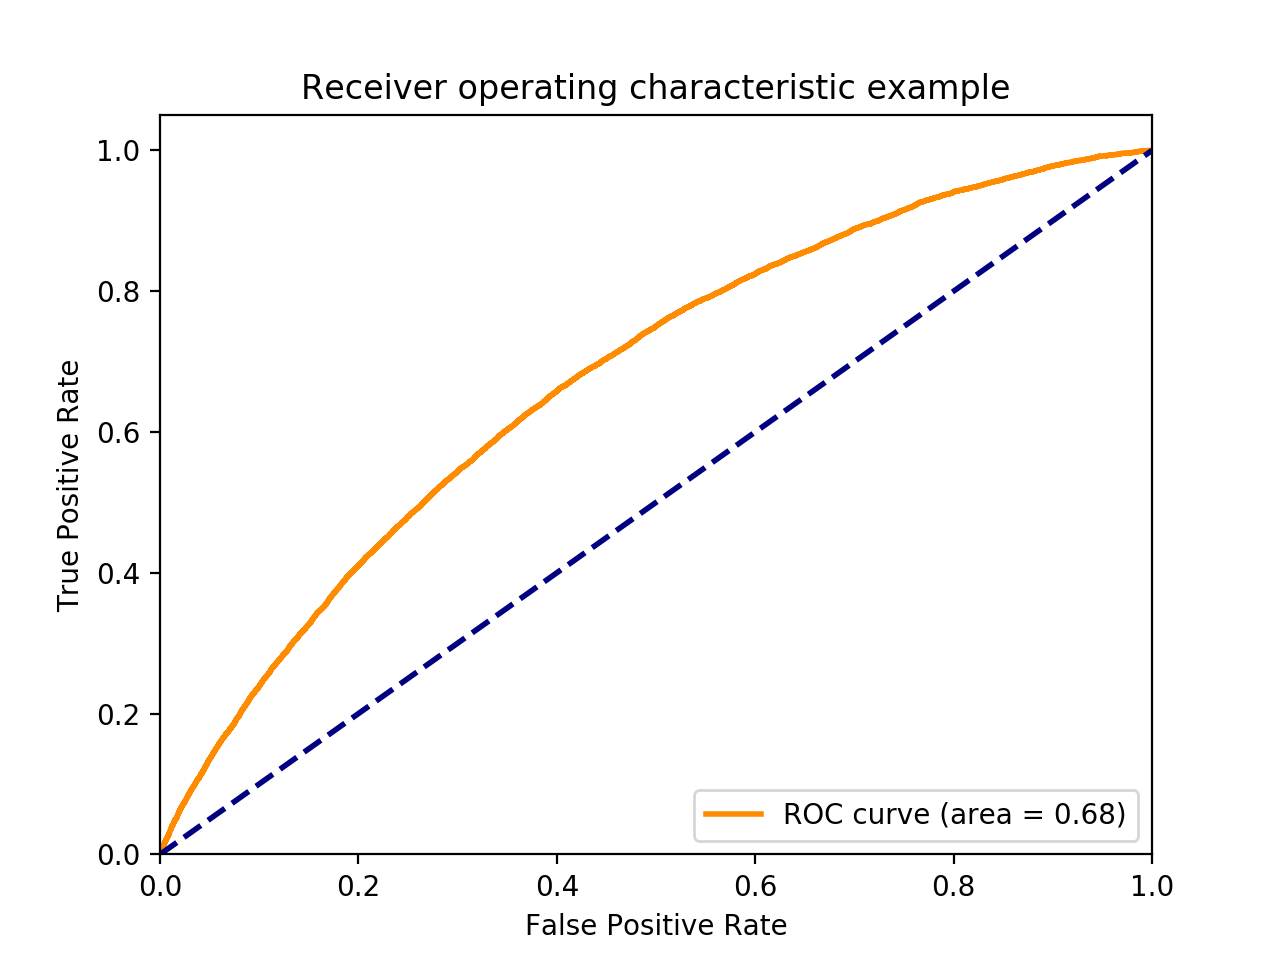

In [220]:
fig, ax = plt.subplots()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % score)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [221]:
roc_df = pd.DataFrame(fpr, columns=['fpr'])
roc_df['tpr'] = tpr
roc_df['thresholds'] = thresholds
roc_df

fpr       tpr  thresholds
0      0.000000  0.000000    1.710244
1      0.000000  0.000098    0.710244
2      0.000012  0.000098    0.645883
3      0.000024  0.000098    0.608391
4      0.000024  0.000196    0.596183
...         ...       ...         ...
93242  0.999952  1.000000    0.014345
93243  0.999964  1.000000    0.014194
93244  0.999976  1.000000    0.013950
93245  0.999988  1.000000    0.013791
93246  1.000000  1.000000    0.013712

[93247 rows x 3 columns]